# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor
import numpy as np

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x149473172320>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/pentamer_coup.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['default_assoc', 1.0]
['rxn_coupling', True]
True
['monomer_add_only', -1]
['P']
100.0
['Q']
100.0
['R']
100.0
['S']
100.0
['T']
100.0
Parsing rule...
SPLIT_01:  ['P(a)+Q(b)', 'P(a!1).Q(a!1)']
['P', 'Q', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['P(b)+R(a)', 'P(b!1).R(a!1)']
['P', 'R', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['P(c)+S(a)', 'P(c!1).S(a!1)']
['P', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['P(b)+T(b)', 'P(b!1).T(b!1)']
['P', 'T', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['Q(c)+R(b)', 'Q(c!1).R(b!1)']
['Q', 'R', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['Q(c)+S(b)', 'Q(c!1).S(b!1)']
['Q', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['Q(c)+T(b)', 'Q(c!1).T(b!1)']
['Q', 'T', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['R(c)+S(b)', 'R(c!1).S(b!1)']
['R', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['R(c)+T(b)', 'R(c!1).T(b!1)']
['R', 'T', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['S(c)+T(b)', 'S(c!1).T(b!1)']
['S', 'T', '']
GGGGGGGGGgg
Node-1 :  (0, 

[(24, {'struct': <networkx.classes.graph.Graph object at 0x1493de50f390>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('P', 'S'), ('P', 'T'), ('S', 'T')]
$$$$$$$
Node-1 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x1493de5cdf60>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x149471cd6a20>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'P', 'S'}
{'P', 'Q'}
{'S'}
Steric hindrance detected
Node-1 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x1493de5cdf60>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x1493de5cd518>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'P', 'S'}
{'P', 'R'}
{'S'}
Steric hindrance detected
Node-1 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x1493de5cdf60>, 'copies': tensor([0.],

Node-1 :  (16, {'struct': <networkx.classes.graph.Graph object at 0x1493de56eda0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (13, {'struct': <networkx.classes.graph.Graph object at 0x1493de581860>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'T', 'R'}
{'Q', 'P', 'S'}
{'T', 'R'}
False
Orig edges:  [('R', 'T')]
Nextn edges:  [('Q', 'P'), ('Q', 'S'), ('P', 'S')]
Item edges:  [('R', 'T'), ('Q', 'P'), ('Q', 'S'), ('P', 'S')]
Allowed edges: 
('P', 'Q')
[True, True]
True
Allowed edges: 
('P', 'R')
[True, True]
False
############################3
Allowed edges: 
('P', 'S')
[True, True]
True
Allowed edges: 
('P', 'T')
[True, True]
False
############################3
Allowed edges: 
('Q', 'R')
[True, True]
False
############################3
Allowed edges: 
('Q', 'S')
[True, True]
True
Allowed edges: 
('Q', 'T')
[True, True]
False
############################3
Allowed edges: 
('R', 'S')
[True, True]
False
############################3
Allowed 

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

{(0, 5): 0, (0, 6): 1, (0, 7): 2, (0, 8): 3, (0, 12): 58, (0, 13): 61, (0, 14): 64, (0, 17): 70, (0, 18): 72, (0, 21): 76, (0, 22): 77, (0, 24): 78, (0, 26): 83, (0, 28): 86, (0, 30): 89, (1, 5): 0, (1, 9): 4, (1, 10): 5, (1, 11): 6, (1, 12): 7, (1, 13): 8, (1, 14): 9, (1, 19): 71, (1, 20): 73, (1, 21): 74, (1, 22): 75, (1, 25): 79, (1, 26): 81, (1, 29): 87, (1, 30): 88, (2, 6): 1, (2, 9): 4, (2, 15): 10, (2, 16): 11, (2, 12): 12, (2, 17): 13, (2, 18): 14, (2, 19): 15, (2, 20): 16, (2, 21): 17, (2, 22): 18, (2, 27): 80, (2, 28): 82, (2, 29): 84, (2, 30): 85, (3, 7): 2, (3, 10): 5, (3, 15): 10, (3, 23): 19, (3, 13): 20, (3, 17): 21, (3, 24): 22, (3, 19): 23, (3, 25): 24, (3, 21): 25, (3, 26): 26, (3, 27): 27, (3, 28): 28, (3, 29): 29, (3, 30): 30, (4, 8): 3, (4, 11): 6, (4, 16): 11, (4, 23): 19, (4, 14): 31, (4, 18): 32, (4, 24): 33, (4, 20): 34, (4, 25): 35, (4, 22): 36, (4, 26): 37, (4, 27): 38, (4, 28): 39, (4, 29): 40, (4, 30): 41, (5, 12): 12, (5, 13): 20, (5, 14): 31, (5, 21): 42,

In [5]:
print(vec_rn.rxn_class)

{(1, 1): [0, 1, 2, 3, 4, 5, 6, 10, 11, 19], (2, 1): [7, 8, 9, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 27, 31, 32, 33, 34, 35, 38, 58, 61, 64, 70, 71, 72, 73, 78, 79, 80], (3, 1): [17, 18, 25, 26, 28, 29, 36, 37, 39, 40, 74, 75, 76, 77, 81, 82, 83, 84, 86, 87], (4, 1): [30, 41, 85, 88, 89], (2, 2): [42, 43, 44, 46, 47, 48, 50, 51, 52, 54, 55, 56, 59, 62, 65], (3, 2): [45, 49, 53, 57, 60, 63, 66, 67, 68, 69]}


In [6]:
#Do modifications here
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
new_kon = new_kon + Tensor([1.]*np.array(1e-1))
new_kon[0]=1
new_kon[1]=1
new_kon[2]=1
new_kon[3]=1
# new_kon[3]=2
# new_kon[3]=2
# new_kon[3]=1
# new_kon = new_kon + Tensor([42.0247, 41.7901, 41.0026, 39.9100,  0.9985,  1.0029,  0.9985, 70.4319,
#         70.4319, 70.4319,  0.9986,  0.9980, 70.4319, 70.4319, 70.4319, 70.4319,
#         70.4319, 12.7740, 12.7740,  0.9983, 70.4319, 70.4319, 70.4319, 70.4319,
#         70.4319, 12.7740, 12.7740, 70.4319, 12.7740, 12.7740,  1.0001, 70.4319,
#         70.4319, 70.4319, 70.4319, 70.4319, 12.7740, 12.7740, 70.4319, 12.7740,
#         12.7740,  1.0001,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
#          1.0001,  1.0000,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
#          1.0001,  1.0000, 70.4319,  1.0001,  1.0000, 70.4319,  1.0001,  1.0000,
#         70.4319,  1.0001,  1.0000,  1.0000,  1.0000,  1.0000, 70.4319, 70.4319,
#         70.4319, 70.4319, 12.7740, 12.7740, 12.7740, 12.7740, 70.4319, 70.4319,
#         70.4319, 12.7740, 12.7740, 12.7740, 12.7740,  1.0001, 12.7740, 12.7740,
#          1.0001,  1.0001])
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))

optim_rates=[0,1,2,3]

vec_rn = VectorizedRxnNet(rn, dev='cpu',optim_rates=optim_rates)
print(vec_rn.kon)

#Changing initial concentrations

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 58}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 61}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 64}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 70}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 72}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 76}
{'k_

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [7]:
# vec_rn.update_reaction_net(rn)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# print(solution)
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [8]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         if len(edges)==0:
#             return(False)
#         kon_max = -1
#         next_node = -1
        
#         kon_sum = 0
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']
#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
# #             #Calculate k_off also
# #             std_c = Tensor([1.])
# #             l_kon = torch.log(temp_kon)
# #             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]

# print(pathway)
# print(kon_sumarray)
# #print(total_con_rate)

In [9]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [10]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)

## Using the optimizer with a 1 second simulation runtime ##

In [11]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=1000,
                  learning_rate=1e-1,
                  device='cpu',method="RMSprop")
optim.rn.update_reaction_net(rn)
optim.optimize(conc_scale=1,conc_thresh=1,max_thresh=10,mod_bool=True)

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1., 1., 1., 1.], dtype=torch.float64, requires_grad=True)]
Optimizer State: <bound method Optimizer.state_dict of RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.1
    momentum: 0
    weight_decay: 0
)>
Using CPU
Start of simulation: memory Used:  5.4
SLow rates:  tensor([[1.0000, 1.0000, 1.0000, 1.0000, 0.1000, 0.1000, 0.1000, 1.0000, 1.0000,
         1.0000, 0.1000, 0.1000, 1.0000, 1.0000, 1.0000, 0.1000, 0.1000, 1.0000,
         1.0000, 0.1000, 1.0000, 1.0000, 1.0000, 0.1000, 0.1000, 1.0000, 1.0000,
         0.1000, 1.0000, 0.1000, 1.0000, 1.0000, 1.0000, 1.0000, 0.1000, 0.1000,
         1.0000, 1.0000, 0.1000, 1.0000, 0.1000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.1000, 1.0000, 1.0000, 0.1000,
         1.0000, 1.0000, 0.1000, 1.0000, 1.0

Next time:  tensor(1.1865, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 7 was 87.8%
current params: tensor([4.8018, 4.8964, 4.8860, 4.9910], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  5.5
SLow rates:  tensor([[5.1451, 5.2457, 5.2290, 5.3373, 0.1000, 0.1000, 0.1000, 5.1451, 5.1451,
         5.1451, 0.1000, 0.1000, 5.2457, 5.2457, 5.2457, 0.1000, 0.1000, 5.2457,
         5.2457, 0.1000, 5.2290, 5.2290, 5.2290, 0.1000, 0.1000, 5.2290, 5.2290,
         0.1000, 5.2290, 0.1000, 5.2290, 5.3373, 5.3373, 5.3373, 0.1000, 0.1000,
         5.3373, 5.3373, 0.1000, 5.3373, 0.1000, 5.3373, 5.2457, 5.3373, 5.3373,
         5.3373, 5.2290, 5.3373, 5.3373, 5.3373, 5.2457, 5.3373, 5.3373, 5.3373,
         5.2457, 5.2290, 5.2457, 5.2457, 5.2457, 0.1000, 5.2457, 5.2290, 0.1000,
         5.2290, 5.3373, 0.1000, 5.3373, 5.3373, 5.3373, 5.2457, 5.2457, 0.1000,
         5.3373, 0.1000, 5.1451, 5.1451, 5.2457, 5.3373, 5.3373, 0.1000, 0.1000,
         5.1451, 5.2457,

Next time:  tensor(1.0504, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 15 was 91.2%
current params: tensor([7.1704, 7.2889, 7.2497, 7.3659], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  5.7
SLow rates:  tensor([[7.4229, 7.5424, 7.5015, 7.6178, 0.1000, 0.1000, 0.1000, 7.4229, 7.4229,
         7.4229, 0.1000, 0.1000, 7.5424, 7.5424, 7.5424, 0.1000, 0.1000, 7.5424,
         7.5424, 0.1000, 7.5015, 7.5015, 7.5015, 0.1000, 0.1000, 7.5015, 7.5015,
         0.1000, 7.5015, 0.1000, 7.5015, 7.6178, 7.6178, 7.6178, 0.1000, 0.1000,
         7.6178, 7.6178, 0.1000, 7.6178, 0.1000, 7.6178, 7.5424, 7.6178, 7.6178,
         7.6178, 7.5015, 7.6178, 7.6178, 7.6178, 7.5424, 7.6178, 7.6178, 7.6178,
         7.5424, 7.5015, 7.5424, 7.5424, 7.5424, 0.1000, 7.5424, 7.5015, 0.1000,
         7.5015, 7.6178, 0.1000, 7.6178, 7.6178, 7.6178, 7.5424, 7.5424, 0.1000,
         7.6178, 0.1000, 7.4229, 7.4229, 7.5424, 7.6178, 7.6178, 0.1000, 0.1000,
         7.4229, 7.5424

Next time:  tensor(1.0142, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 23 was 92.7%
current params: tensor([9.0320, 9.1547, 9.1060, 9.2209], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  5.8
SLow rates:  tensor([[9.2438, 9.3667, 9.3173, 9.4319, 0.1000, 0.1000, 0.1000, 9.2438, 9.2438,
         9.2438, 0.1000, 0.1000, 9.3667, 9.3667, 9.3667, 0.1000, 0.1000, 9.3667,
         9.3667, 0.1000, 9.3173, 9.3173, 9.3173, 0.1000, 0.1000, 9.3173, 9.3173,
         0.1000, 9.3173, 0.1000, 9.3173, 9.4319, 9.4319, 9.4319, 0.1000, 0.1000,
         9.4319, 9.4319, 0.1000, 9.4319, 0.1000, 9.4319, 9.3667, 9.4319, 9.4319,
         9.4319, 9.3173, 9.4319, 9.4319, 9.4319, 9.3667, 9.4319, 9.4319, 9.4319,
         9.3667, 9.3173, 9.3667, 9.3667, 9.3667, 0.1000, 9.3667, 9.3173, 0.1000,
         9.3173, 9.4319, 0.1000, 9.4319, 9.4319, 9.4319, 9.3667, 9.3667, 0.1000,
         9.4319, 0.1000, 9.2438, 9.2438, 9.3667, 9.4319, 9.4319, 0.1000, 0.1000,
         9.2438, 9.3667

Next time:  tensor(1.0163, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 30 was 93.6%
current params: tensor([10.4453, 10.5686, 10.5159, 10.6285], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  5.9
SLow rates:  tensor([[10.6355, 10.7589, 10.7057, 10.8180,  0.1000,  0.1000,  0.1000, 10.6355,
         10.6355, 10.6355,  0.1000,  0.1000, 10.7589, 10.7589, 10.7589,  0.1000,
          0.1000, 10.7589, 10.7589,  0.1000, 10.7057, 10.7057, 10.7057,  0.1000,
          0.1000, 10.7057, 10.7057,  0.1000, 10.7057,  0.1000, 10.7057, 10.8180,
         10.8180, 10.8180,  0.1000,  0.1000, 10.8180, 10.8180,  0.1000, 10.8180,
          0.1000, 10.8180, 10.7589, 10.8180, 10.8180, 10.8180, 10.7057, 10.8180,
         10.8180, 10.8180, 10.7589, 10.8180, 10.8180, 10.8180, 10.7589, 10.7057,
         10.7589, 10.7589, 10.7589,  0.1000, 10.7589, 10.7057,  0.1000, 10.7057,
         10.8180,  0.1000, 10.8180, 10.8180, 10.8180, 10.7589, 10.7589,  0.1000,
         10.8180,  

Next time:  tensor(1.1031, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 37 was 94.2%
current params: tensor([11.7293, 11.8521, 11.7971, 11.9070], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.1
SLow rates:  tensor([[11.9045, 12.0272, 11.9719, 12.0815,  0.1000,  0.1000,  0.1000, 11.9045,
         11.9045, 11.9045,  0.1000,  0.1000, 12.0272, 12.0272, 12.0272,  0.1000,
          0.1000, 12.0272, 12.0272,  0.1000, 11.9719, 11.9719, 11.9719,  0.1000,
          0.1000, 11.9719, 11.9719,  0.1000, 11.9719,  0.1000, 11.9719, 12.0815,
         12.0815, 12.0815,  0.1000,  0.1000, 12.0815, 12.0815,  0.1000, 12.0815,
          0.1000, 12.0815, 12.0272, 12.0815, 12.0815, 12.0815, 11.9719, 12.0815,
         12.0815, 12.0815, 12.0272, 12.0815, 12.0815, 12.0815, 12.0272, 11.9719,
         12.0272, 12.0272, 12.0272,  0.1000, 12.0272, 11.9719,  0.1000, 11.9719,
         12.0815,  0.1000, 12.0815, 12.0815, 12.0815, 12.0272, 12.0272,  0.1000,
         12.0815,  

Next time:  tensor(1.0809, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 44 was 94.7%
current params: tensor([12.9204, 13.0421, 12.9856, 13.0931], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.2
SLow rates:  tensor([[13.0844, 13.2060, 13.1493, 13.2564,  0.1000,  0.1000,  0.1000, 13.0844,
         13.0844, 13.0844,  0.1000,  0.1000, 13.2060, 13.2060, 13.2060,  0.1000,
          0.1000, 13.2060, 13.2060,  0.1000, 13.1493, 13.1493, 13.1493,  0.1000,
          0.1000, 13.1493, 13.1493,  0.1000, 13.1493,  0.1000, 13.1493, 13.2564,
         13.2564, 13.2564,  0.1000,  0.1000, 13.2564, 13.2564,  0.1000, 13.2564,
          0.1000, 13.2564, 13.2060, 13.2564, 13.2564, 13.2564, 13.1493, 13.2564,
         13.2564, 13.2564, 13.2060, 13.2564, 13.2564, 13.2564, 13.2060, 13.1493,
         13.2060, 13.2060, 13.2060,  0.1000, 13.2060, 13.1493,  0.1000, 13.1493,
         13.2564,  0.1000, 13.2564, 13.2564, 13.2564, 13.2060, 13.2060,  0.1000,
         13.2564,  

Next time:  tensor(1.1860, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 51 was 95.1%
current params: tensor([14.0410, 14.1616, 14.1042, 14.2092], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.3
SLow rates:  tensor([[14.1962, 14.3167, 14.2592, 14.3639,  0.1000,  0.1000,  0.1000, 14.1962,
         14.1962, 14.1962,  0.1000,  0.1000, 14.3167, 14.3167, 14.3167,  0.1000,
          0.1000, 14.3167, 14.3167,  0.1000, 14.2592, 14.2592, 14.2592,  0.1000,
          0.1000, 14.2592, 14.2592,  0.1000, 14.2592,  0.1000, 14.2592, 14.3639,
         14.3639, 14.3639,  0.1000,  0.1000, 14.3639, 14.3639,  0.1000, 14.3639,
          0.1000, 14.3639, 14.3167, 14.3639, 14.3639, 14.3639, 14.2592, 14.3639,
         14.3639, 14.3639, 14.3167, 14.3639, 14.3639, 14.3639, 14.3167, 14.2592,
         14.3167, 14.3167, 14.3167,  0.1000, 14.3167, 14.2592,  0.1000, 14.2592,
         14.3639,  0.1000, 14.3639, 14.3639, 14.3639, 14.3167, 14.3167,  0.1000,
         14.3639,  

Next time:  tensor(1.1179, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 58 was 95.4%
current params: tensor([15.1062, 15.2253, 15.1674, 15.2703], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.5
SLow rates:  tensor([[15.2545, 15.3735, 15.3155, 15.4181,  0.1000,  0.1000,  0.1000, 15.2545,
         15.2545, 15.2545,  0.1000,  0.1000, 15.3735, 15.3735, 15.3735,  0.1000,
          0.1000, 15.3735, 15.3735,  0.1000, 15.3155, 15.3155, 15.3155,  0.1000,
          0.1000, 15.3155, 15.3155,  0.1000, 15.3155,  0.1000, 15.3155, 15.4181,
         15.4181, 15.4181,  0.1000,  0.1000, 15.4181, 15.4181,  0.1000, 15.4181,
          0.1000, 15.4181, 15.3735, 15.4181, 15.4181, 15.4181, 15.3155, 15.4181,
         15.4181, 15.4181, 15.3735, 15.4181, 15.4181, 15.4181, 15.3735, 15.3155,
         15.3735, 15.3735, 15.3735,  0.1000, 15.3735, 15.3155,  0.1000, 15.3155,
         15.4181,  0.1000, 15.4181, 15.4181, 15.4181, 15.3735, 15.3735,  0.1000,
         15.4181,  

Next time:  tensor(1.0153, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 65 was 95.6%
current params: tensor([16.1264, 16.2443, 16.1860, 16.2869], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.6
SLow rates:  tensor([[16.2689, 16.3867, 16.3284, 16.4289,  0.1000,  0.1000,  0.1000, 16.2689,
         16.2689, 16.2689,  0.1000,  0.1000, 16.3867, 16.3867, 16.3867,  0.1000,
          0.1000, 16.3867, 16.3867,  0.1000, 16.3284, 16.3284, 16.3284,  0.1000,
          0.1000, 16.3284, 16.3284,  0.1000, 16.3284,  0.1000, 16.3284, 16.4289,
         16.4289, 16.4289,  0.1000,  0.1000, 16.4289, 16.4289,  0.1000, 16.4289,
          0.1000, 16.4289, 16.3867, 16.4289, 16.4289, 16.4289, 16.3284, 16.4289,
         16.4289, 16.4289, 16.3867, 16.4289, 16.4289, 16.4289, 16.3867, 16.3284,
         16.3867, 16.3867, 16.3867,  0.1000, 16.3867, 16.3284,  0.1000, 16.3284,
         16.4289,  0.1000, 16.4289, 16.4289, 16.4289, 16.3867, 16.3867,  0.1000,
         16.4289,  

Next time:  tensor(1.0243, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 72 was 95.9%
current params: tensor([17.1095, 17.2262, 17.1678, 17.2667], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.7
SLow rates:  tensor([[17.2473, 17.3639, 17.3054, 17.4041,  0.1000,  0.1000,  0.1000, 17.2473,
         17.2473, 17.2473,  0.1000,  0.1000, 17.3639, 17.3639, 17.3639,  0.1000,
          0.1000, 17.3639, 17.3639,  0.1000, 17.3054, 17.3054, 17.3054,  0.1000,
          0.1000, 17.3054, 17.3054,  0.1000, 17.3054,  0.1000, 17.3054, 17.4041,
         17.4041, 17.4041,  0.1000,  0.1000, 17.4041, 17.4041,  0.1000, 17.4041,
          0.1000, 17.4041, 17.3639, 17.4041, 17.4041, 17.4041, 17.3054, 17.4041,
         17.4041, 17.4041, 17.3639, 17.4041, 17.4041, 17.4041, 17.3639, 17.3054,
         17.3639, 17.3639, 17.3639,  0.1000, 17.3639, 17.3054,  0.1000, 17.3054,
         17.4041,  0.1000, 17.4041, 17.4041, 17.4041, 17.3639, 17.3639,  0.1000,
         17.4041,  

Next time:  tensor(1.0076, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 79 was 96.1%
current params: tensor([18.0615, 18.1771, 18.1185, 18.2157], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  6.9
SLow rates:  tensor([[18.1953, 18.3107, 18.2521, 18.3491,  0.1000,  0.1000,  0.1000, 18.1953,
         18.1953, 18.1953,  0.1000,  0.1000, 18.3107, 18.3107, 18.3107,  0.1000,
          0.1000, 18.3107, 18.3107,  0.1000, 18.2521, 18.2521, 18.2521,  0.1000,
          0.1000, 18.2521, 18.2521,  0.1000, 18.2521,  0.1000, 18.2521, 18.3491,
         18.3491, 18.3491,  0.1000,  0.1000, 18.3491, 18.3491,  0.1000, 18.3491,
          0.1000, 18.3491, 18.3107, 18.3491, 18.3491, 18.3491, 18.2521, 18.3491,
         18.3491, 18.3491, 18.3107, 18.3491, 18.3491, 18.3491, 18.3107, 18.2521,
         18.3107, 18.3107, 18.3107,  0.1000, 18.3107, 18.2521,  0.1000, 18.2521,
         18.3491,  0.1000, 18.3491, 18.3491, 18.3491, 18.3107, 18.3107,  0.1000,
         18.3491,  

Next time:  tensor(1.0303, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 86 was 96.2%
current params: tensor([18.9871, 19.1016, 19.0430, 19.1385], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.0
SLow rates:  tensor([[19.1174, 19.2317, 19.1731, 19.2685,  0.1000,  0.1000,  0.1000, 19.1174,
         19.1174, 19.1174,  0.1000,  0.1000, 19.2317, 19.2317, 19.2317,  0.1000,
          0.1000, 19.2317, 19.2317,  0.1000, 19.1731, 19.1731, 19.1731,  0.1000,
          0.1000, 19.1731, 19.1731,  0.1000, 19.1731,  0.1000, 19.1731, 19.2685,
         19.2685, 19.2685,  0.1000,  0.1000, 19.2685, 19.2685,  0.1000, 19.2685,
          0.1000, 19.2685, 19.2317, 19.2685, 19.2685, 19.2685, 19.1731, 19.2685,
         19.2685, 19.2685, 19.2317, 19.2685, 19.2685, 19.2685, 19.2317, 19.1731,
         19.2317, 19.2317, 19.2317,  0.1000, 19.2317, 19.1731,  0.1000, 19.1731,
         19.2685,  0.1000, 19.2685, 19.2685, 19.2685, 19.2317, 19.2317,  0.1000,
         19.2685,  

Next time:  tensor(1.1302, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 93 was 96.4%
current params: tensor([19.8899, 20.0033, 19.9447, 20.0388], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.2
SLow rates:  tensor([[20.0172, 20.1305, 20.0719, 20.1658,  0.1000,  0.1000,  0.1000, 20.0172,
         20.0172, 20.0172,  0.1000,  0.1000, 20.1305, 20.1305, 20.1305,  0.1000,
          0.1000, 20.1305, 20.1305,  0.1000, 20.0719, 20.0719, 20.0719,  0.1000,
          0.1000, 20.0719, 20.0719,  0.1000, 20.0719,  0.1000, 20.0719, 20.1658,
         20.1658, 20.1658,  0.1000,  0.1000, 20.1658, 20.1658,  0.1000, 20.1658,
          0.1000, 20.1658, 20.1305, 20.1658, 20.1658, 20.1658, 20.0719, 20.1658,
         20.1658, 20.1658, 20.1305, 20.1658, 20.1658, 20.1658, 20.1305, 20.0719,
         20.1305, 20.1305, 20.1305,  0.1000, 20.1305, 20.0719,  0.1000, 20.0719,
         20.1658,  0.1000, 20.1658, 20.1658, 20.1658, 20.1305, 20.1305,  0.1000,
         20.1658,  

Next time:  tensor(1.1068, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 100 was 96.5%
current params: tensor([20.7729, 20.8853, 20.8268, 20.9195], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.3
SLow rates:  tensor([[20.8976, 21.0099, 20.9514, 21.0439,  0.1000,  0.1000,  0.1000, 20.8976,
         20.8976, 20.8976,  0.1000,  0.1000, 21.0099, 21.0099, 21.0099,  0.1000,
          0.1000, 21.0099, 21.0099,  0.1000, 20.9514, 20.9514, 20.9514,  0.1000,
          0.1000, 20.9514, 20.9514,  0.1000, 20.9514,  0.1000, 20.9514, 21.0439,
         21.0439, 21.0439,  0.1000,  0.1000, 21.0439, 21.0439,  0.1000, 21.0439,
          0.1000, 21.0439, 21.0099, 21.0439, 21.0439, 21.0439, 20.9514, 21.0439,
         21.0439, 21.0439, 21.0099, 21.0439, 21.0439, 21.0439, 21.0099, 20.9514,
         21.0099, 21.0099, 21.0099,  0.1000, 21.0099, 20.9514,  0.1000, 20.9514,
         21.0439,  0.1000, 21.0439, 21.0439, 21.0439, 21.0099, 21.0099,  0.1000,
         21.0439, 

Next time:  tensor(1.0965, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 107 was 96.7%
current params: tensor([21.6387, 21.7501, 21.6917, 21.7831], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.5
SLow rates:  tensor([[21.7611, 21.8724, 21.8140, 21.9052,  0.1000,  0.1000,  0.1000, 21.7611,
         21.7611, 21.7611,  0.1000,  0.1000, 21.8724, 21.8724, 21.8724,  0.1000,
          0.1000, 21.8724, 21.8724,  0.1000, 21.8140, 21.8140, 21.8140,  0.1000,
          0.1000, 21.8140, 21.8140,  0.1000, 21.8140,  0.1000, 21.8140, 21.9052,
         21.9052, 21.9052,  0.1000,  0.1000, 21.9052, 21.9052,  0.1000, 21.9052,
          0.1000, 21.9052, 21.8724, 21.9052, 21.9052, 21.9052, 21.8140, 21.9052,
         21.9052, 21.9052, 21.8724, 21.9052, 21.9052, 21.9052, 21.8724, 21.8140,
         21.8724, 21.8724, 21.8724,  0.1000, 21.8724, 21.8140,  0.1000, 21.8140,
         21.9052,  0.1000, 21.9052, 21.9052, 21.9052, 21.8724, 21.8724,  0.1000,
         21.9052, 

Next time:  tensor(1.0928, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 114 was 96.8%
current params: tensor([22.4892, 22.5998, 22.5414, 22.6316], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.6
SLow rates:  tensor([[22.6095, 22.7200, 22.6617, 22.7517,  0.1000,  0.1000,  0.1000, 22.6095,
         22.6095, 22.6095,  0.1000,  0.1000, 22.7200, 22.7200, 22.7200,  0.1000,
          0.1000, 22.7200, 22.7200,  0.1000, 22.6617, 22.6617, 22.6617,  0.1000,
          0.1000, 22.6617, 22.6617,  0.1000, 22.6617,  0.1000, 22.6617, 22.7517,
         22.7517, 22.7517,  0.1000,  0.1000, 22.7517, 22.7517,  0.1000, 22.7517,
          0.1000, 22.7517, 22.7200, 22.7517, 22.7517, 22.7517, 22.6617, 22.7517,
         22.7517, 22.7517, 22.7200, 22.7517, 22.7517, 22.7517, 22.7200, 22.6617,
         22.7200, 22.7200, 22.7200,  0.1000, 22.7200, 22.6617,  0.1000, 22.6617,
         22.7517,  0.1000, 22.7517, 22.7517, 22.7517, 22.7200, 22.7200,  0.1000,
         22.7517, 

Next time:  tensor(1.0950, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 121 was 96.9%
current params: tensor([23.3262, 23.4359, 23.3777, 23.4668], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.8
SLow rates:  tensor([[23.4448, 23.5544, 23.4962, 23.5851,  0.1000,  0.1000,  0.1000, 23.4448,
         23.4448, 23.4448,  0.1000,  0.1000, 23.5544, 23.5544, 23.5544,  0.1000,
          0.1000, 23.5544, 23.5544,  0.1000, 23.4962, 23.4962, 23.4962,  0.1000,
          0.1000, 23.4962, 23.4962,  0.1000, 23.4962,  0.1000, 23.4962, 23.5851,
         23.5851, 23.5851,  0.1000,  0.1000, 23.5851, 23.5851,  0.1000, 23.5851,
          0.1000, 23.5851, 23.5544, 23.5851, 23.5851, 23.5851, 23.4962, 23.5851,
         23.5851, 23.5851, 23.5544, 23.5851, 23.5851, 23.5851, 23.5544, 23.4962,
         23.5544, 23.5544, 23.5544,  0.1000, 23.5544, 23.4962,  0.1000, 23.4962,
         23.5851,  0.1000, 23.5851, 23.5851, 23.5851, 23.5544, 23.5544,  0.1000,
         23.5851, 

Next time:  tensor(1.0178, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 128 was 97.0%
current params: tensor([24.1512, 24.2601, 24.2020, 24.2901], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  7.9
SLow rates:  tensor([[24.2682, 24.3770, 24.3189, 24.4069,  0.1000,  0.1000,  0.1000, 24.2682,
         24.2682, 24.2682,  0.1000,  0.1000, 24.3770, 24.3770, 24.3770,  0.1000,
          0.1000, 24.3770, 24.3770,  0.1000, 24.3189, 24.3189, 24.3189,  0.1000,
          0.1000, 24.3189, 24.3189,  0.1000, 24.3189,  0.1000, 24.3189, 24.4069,
         24.4069, 24.4069,  0.1000,  0.1000, 24.4069, 24.4069,  0.1000, 24.4069,
          0.1000, 24.4069, 24.3770, 24.4069, 24.4069, 24.4069, 24.3189, 24.4069,
         24.4069, 24.4069, 24.3770, 24.4069, 24.4069, 24.4069, 24.3770, 24.3189,
         24.3770, 24.3770, 24.3770,  0.1000, 24.3770, 24.3189,  0.1000, 24.3189,
         24.4069,  0.1000, 24.4069, 24.4069, 24.4069, 24.3770, 24.3770,  0.1000,
         24.4069, 

Next time:  tensor(1.0328, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 135 was 97.1%
current params: tensor([24.9656, 25.0737, 25.0156, 25.1029], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.1
SLow rates:  tensor([[25.0811, 25.1891, 25.1310, 25.2182,  0.1000,  0.1000,  0.1000, 25.0811,
         25.0811, 25.0811,  0.1000,  0.1000, 25.1891, 25.1891, 25.1891,  0.1000,
          0.1000, 25.1891, 25.1891,  0.1000, 25.1310, 25.1310, 25.1310,  0.1000,
          0.1000, 25.1310, 25.1310,  0.1000, 25.1310,  0.1000, 25.1310, 25.2182,
         25.2182, 25.2182,  0.1000,  0.1000, 25.2182, 25.2182,  0.1000, 25.2182,
          0.1000, 25.2182, 25.1891, 25.2182, 25.2182, 25.2182, 25.1310, 25.2182,
         25.2182, 25.2182, 25.1891, 25.2182, 25.2182, 25.2182, 25.1891, 25.1310,
         25.1891, 25.1891, 25.1891,  0.1000, 25.1891, 25.1310,  0.1000, 25.1310,
         25.2182,  0.1000, 25.2182, 25.2182, 25.2182, 25.1891, 25.1891,  0.1000,
         25.2182, 

Next time:  tensor(1.0186, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 142 was 97.2%
current params: tensor([25.7702, 25.8776, 25.8196, 25.9060], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.2
SLow rates:  tensor([[25.8845, 25.9917, 25.9338, 26.0200,  0.1000,  0.1000,  0.1000, 25.8845,
         25.8845, 25.8845,  0.1000,  0.1000, 25.9917, 25.9917, 25.9917,  0.1000,
          0.1000, 25.9917, 25.9917,  0.1000, 25.9338, 25.9338, 25.9338,  0.1000,
          0.1000, 25.9338, 25.9338,  0.1000, 25.9338,  0.1000, 25.9338, 26.0200,
         26.0200, 26.0200,  0.1000,  0.1000, 26.0200, 26.0200,  0.1000, 26.0200,
          0.1000, 26.0200, 25.9917, 26.0200, 26.0200, 26.0200, 25.9338, 26.0200,
         26.0200, 26.0200, 25.9917, 26.0200, 26.0200, 26.0200, 25.9917, 25.9338,
         25.9917, 25.9917, 25.9917,  0.1000, 25.9917, 25.9338,  0.1000, 25.9338,
         26.0200,  0.1000, 26.0200, 26.0200, 26.0200, 25.9917, 25.9917,  0.1000,
         26.0200, 

Next time:  tensor(1.0112, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 149 was 97.2%
current params: tensor([26.5662, 26.6729, 26.6151, 26.7006], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.3
SLow rates:  tensor([[26.6793, 26.7859, 26.7281, 26.8135,  0.1000,  0.1000,  0.1000, 26.6793,
         26.6793, 26.6793,  0.1000,  0.1000, 26.7859, 26.7859, 26.7859,  0.1000,
          0.1000, 26.7859, 26.7859,  0.1000, 26.7281, 26.7281, 26.7281,  0.1000,
          0.1000, 26.7281, 26.7281,  0.1000, 26.7281,  0.1000, 26.7281, 26.8135,
         26.8135, 26.8135,  0.1000,  0.1000, 26.8135, 26.8135,  0.1000, 26.8135,
          0.1000, 26.8135, 26.7859, 26.8135, 26.8135, 26.8135, 26.7281, 26.8135,
         26.8135, 26.8135, 26.7859, 26.8135, 26.8135, 26.8135, 26.7859, 26.7281,
         26.7859, 26.7859, 26.7859,  0.1000, 26.7859, 26.7281,  0.1000, 26.7281,
         26.8135,  0.1000, 26.8135, 26.8135, 26.8135, 26.7859, 26.7859,  0.1000,
         26.8135, 

Next time:  tensor(1.0055, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 156 was 97.3%
current params: tensor([27.3543, 27.4604, 27.4027, 27.4875], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.5
SLow rates:  tensor([[27.4663, 27.5723, 27.5147, 27.5993,  0.1000,  0.1000,  0.1000, 27.4663,
         27.4663, 27.4663,  0.1000,  0.1000, 27.5723, 27.5723, 27.5723,  0.1000,
          0.1000, 27.5723, 27.5723,  0.1000, 27.5147, 27.5147, 27.5147,  0.1000,
          0.1000, 27.5147, 27.5147,  0.1000, 27.5147,  0.1000, 27.5147, 27.5993,
         27.5993, 27.5993,  0.1000,  0.1000, 27.5993, 27.5993,  0.1000, 27.5993,
          0.1000, 27.5993, 27.5723, 27.5993, 27.5993, 27.5993, 27.5147, 27.5993,
         27.5993, 27.5993, 27.5723, 27.5993, 27.5993, 27.5993, 27.5723, 27.5147,
         27.5723, 27.5723, 27.5723,  0.1000, 27.5723, 27.5147,  0.1000, 27.5147,
         27.5993,  0.1000, 27.5993, 27.5993, 27.5993, 27.5723, 27.5723,  0.1000,
         27.5993, 

Next time:  tensor(1.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 163 was 97.4%
current params: tensor([28.1354, 28.2409, 28.1833, 28.2673], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.6
SLow rates:  tensor([[28.2464, 28.3518, 28.2943, 28.3782,  0.1000,  0.1000,  0.1000, 28.2464,
         28.2464, 28.2464,  0.1000,  0.1000, 28.3518, 28.3518, 28.3518,  0.1000,
          0.1000, 28.3518, 28.3518,  0.1000, 28.2943, 28.2943, 28.2943,  0.1000,
          0.1000, 28.2943, 28.2943,  0.1000, 28.2943,  0.1000, 28.2943, 28.3782,
         28.3782, 28.3782,  0.1000,  0.1000, 28.3782, 28.3782,  0.1000, 28.3782,
          0.1000, 28.3782, 28.3518, 28.3782, 28.3782, 28.3782, 28.2943, 28.3782,
         28.3782, 28.3782, 28.3518, 28.3782, 28.3782, 28.3782, 28.3518, 28.2943,
         28.3518, 28.3518, 28.3518,  0.1000, 28.3518, 28.2943,  0.1000, 28.2943,
         28.3782,  0.1000, 28.3782, 28.3782, 28.3782, 28.3518, 28.3518,  0.1000,
         28.3782, 

Next time:  tensor(1.0369, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 170 was 97.4%
current params: tensor([28.9100, 29.0149, 28.9575, 29.0407], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.8
SLow rates:  tensor([[29.0201, 29.1250, 29.0676, 29.1508,  0.1000,  0.1000,  0.1000, 29.0201,
         29.0201, 29.0201,  0.1000,  0.1000, 29.1250, 29.1250, 29.1250,  0.1000,
          0.1000, 29.1250, 29.1250,  0.1000, 29.0676, 29.0676, 29.0676,  0.1000,
          0.1000, 29.0676, 29.0676,  0.1000, 29.0676,  0.1000, 29.0676, 29.1508,
         29.1508, 29.1508,  0.1000,  0.1000, 29.1508, 29.1508,  0.1000, 29.1508,
          0.1000, 29.1508, 29.1250, 29.1508, 29.1508, 29.1508, 29.0676, 29.1508,
         29.1508, 29.1508, 29.1250, 29.1508, 29.1508, 29.1508, 29.1250, 29.0676,
         29.1250, 29.1250, 29.1250,  0.1000, 29.1250, 29.0676,  0.1000, 29.0676,
         29.1508,  0.1000, 29.1508, 29.1508, 29.1508, 29.1250, 29.1250,  0.1000,
         29.1508, 

Next time:  tensor(1.0337, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 177 was 97.5%
current params: tensor([29.6787, 29.7831, 29.7258, 29.8084], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  8.9
SLow rates:  tensor([[29.7881, 29.8924, 29.8352, 29.9176,  0.1000,  0.1000,  0.1000, 29.7881,
         29.7881, 29.7881,  0.1000,  0.1000, 29.8924, 29.8924, 29.8924,  0.1000,
          0.1000, 29.8924, 29.8924,  0.1000, 29.8352, 29.8352, 29.8352,  0.1000,
          0.1000, 29.8352, 29.8352,  0.1000, 29.8352,  0.1000, 29.8352, 29.9176,
         29.9176, 29.9176,  0.1000,  0.1000, 29.9176, 29.9176,  0.1000, 29.9176,
          0.1000, 29.9176, 29.8924, 29.9176, 29.9176, 29.9176, 29.8352, 29.9176,
         29.9176, 29.9176, 29.8924, 29.9176, 29.9176, 29.9176, 29.8924, 29.8352,
         29.8924, 29.8924, 29.8924,  0.1000, 29.8924, 29.8352,  0.1000, 29.8352,
         29.9176,  0.1000, 29.9176, 29.9176, 29.9176, 29.8924, 29.8924,  0.1000,
         29.9176, 

Next time:  tensor(1.0325, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 184 was 97.6%
current params: tensor([30.4421, 30.5460, 30.4889, 30.5708], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.0
SLow rates:  tensor([[30.5507, 30.6545, 30.5975, 30.6793,  0.1000,  0.1000,  0.1000, 30.5507,
         30.5507, 30.5507,  0.1000,  0.1000, 30.6545, 30.6545, 30.6545,  0.1000,
          0.1000, 30.6545, 30.6545,  0.1000, 30.5975, 30.5975, 30.5975,  0.1000,
          0.1000, 30.5975, 30.5975,  0.1000, 30.5975,  0.1000, 30.5975, 30.6793,
         30.6793, 30.6793,  0.1000,  0.1000, 30.6793, 30.6793,  0.1000, 30.6793,
          0.1000, 30.6793, 30.6545, 30.6793, 30.6793, 30.6793, 30.5975, 30.6793,
         30.6793, 30.6793, 30.6545, 30.6793, 30.6793, 30.6793, 30.6545, 30.5975,
         30.6545, 30.6545, 30.6545,  0.1000, 30.6545, 30.5975,  0.1000, 30.5975,
         30.6793,  0.1000, 30.6793, 30.6793, 30.6793, 30.6545, 30.6545,  0.1000,
         30.6793, 

Next time:  tensor(1.1418, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 191 was 97.6%
current params: tensor([31.2006, 31.3040, 31.2470, 31.3284], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.2
SLow rates:  tensor([[31.3086, 31.4119, 31.3550, 31.4362,  0.1000,  0.1000,  0.1000, 31.3086,
         31.3086, 31.3086,  0.1000,  0.1000, 31.4119, 31.4119, 31.4119,  0.1000,
          0.1000, 31.4119, 31.4119,  0.1000, 31.3550, 31.3550, 31.3550,  0.1000,
          0.1000, 31.3550, 31.3550,  0.1000, 31.3550,  0.1000, 31.3550, 31.4362,
         31.4362, 31.4362,  0.1000,  0.1000, 31.4362, 31.4362,  0.1000, 31.4362,
          0.1000, 31.4362, 31.4119, 31.4362, 31.4362, 31.4362, 31.3550, 31.4362,
         31.4362, 31.4362, 31.4119, 31.4362, 31.4362, 31.4362, 31.4119, 31.3550,
         31.4119, 31.4119, 31.4119,  0.1000, 31.4119, 31.3550,  0.1000, 31.3550,
         31.4362,  0.1000, 31.4362, 31.4362, 31.4362, 31.4119, 31.4119,  0.1000,
         31.4362, 

Next time:  tensor(1.0591, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 198 was 97.7%
current params: tensor([31.9546, 32.0576, 32.0008, 32.0815], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.3
SLow rates:  tensor([[32.0620, 32.1649, 32.1081, 32.1888,  0.1000,  0.1000,  0.1000, 32.0620,
         32.0620, 32.0620,  0.1000,  0.1000, 32.1649, 32.1649, 32.1649,  0.1000,
          0.1000, 32.1649, 32.1649,  0.1000, 32.1081, 32.1081, 32.1081,  0.1000,
          0.1000, 32.1081, 32.1081,  0.1000, 32.1081,  0.1000, 32.1081, 32.1888,
         32.1888, 32.1888,  0.1000,  0.1000, 32.1888, 32.1888,  0.1000, 32.1888,
          0.1000, 32.1888, 32.1649, 32.1888, 32.1888, 32.1888, 32.1081, 32.1888,
         32.1888, 32.1888, 32.1649, 32.1888, 32.1888, 32.1888, 32.1649, 32.1081,
         32.1649, 32.1649, 32.1649,  0.1000, 32.1649, 32.1081,  0.1000, 32.1081,
         32.1888,  0.1000, 32.1888, 32.1888, 32.1888, 32.1649, 32.1649,  0.1000,
         32.1888, 

Next time:  tensor(1.0038, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 205 was 97.7%
current params: tensor([32.7046, 32.8071, 32.7504, 32.8307], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.4
SLow rates:  tensor([[32.8114, 32.9138, 32.8572, 32.9374,  0.1000,  0.1000,  0.1000, 32.8114,
         32.8114, 32.8114,  0.1000,  0.1000, 32.9138, 32.9138, 32.9138,  0.1000,
          0.1000, 32.9138, 32.9138,  0.1000, 32.8572, 32.8572, 32.8572,  0.1000,
          0.1000, 32.8572, 32.8572,  0.1000, 32.8572,  0.1000, 32.8572, 32.9374,
         32.9374, 32.9374,  0.1000,  0.1000, 32.9374, 32.9374,  0.1000, 32.9374,
          0.1000, 32.9374, 32.9138, 32.9374, 32.9374, 32.9374, 32.8572, 32.9374,
         32.9374, 32.9374, 32.9138, 32.9374, 32.9374, 32.9374, 32.9138, 32.8572,
         32.9138, 32.9138, 32.9138,  0.1000, 32.9138, 32.8572,  0.1000, 32.8572,
         32.9374,  0.1000, 32.9374, 32.9374, 32.9374, 32.9138, 32.9138,  0.1000,
         32.9374, 

Next time:  tensor(1.0294, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 212 was 97.8%
current params: tensor([33.4508, 33.5529, 33.4963, 33.5761], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.6
SLow rates:  tensor([[33.5571, 33.6591, 33.6026, 33.6823,  0.1000,  0.1000,  0.1000, 33.5571,
         33.5571, 33.5571,  0.1000,  0.1000, 33.6591, 33.6591, 33.6591,  0.1000,
          0.1000, 33.6591, 33.6591,  0.1000, 33.6026, 33.6026, 33.6026,  0.1000,
          0.1000, 33.6026, 33.6026,  0.1000, 33.6026,  0.1000, 33.6026, 33.6823,
         33.6823, 33.6823,  0.1000,  0.1000, 33.6823, 33.6823,  0.1000, 33.6823,
          0.1000, 33.6823, 33.6591, 33.6823, 33.6823, 33.6823, 33.6026, 33.6823,
         33.6823, 33.6823, 33.6591, 33.6823, 33.6823, 33.6823, 33.6591, 33.6026,
         33.6591, 33.6591, 33.6591,  0.1000, 33.6591, 33.6026,  0.1000, 33.6026,
         33.6823,  0.1000, 33.6823, 33.6823, 33.6823, 33.6591, 33.6591,  0.1000,
         33.6823, 

Next time:  tensor(1.0172, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 219 was 97.8%
current params: tensor([34.1936, 34.2952, 34.2388, 34.3181], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.7
SLow rates:  tensor([[34.2994, 34.4010, 34.3446, 34.4238,  0.1000,  0.1000,  0.1000, 34.2994,
         34.2994, 34.2994,  0.1000,  0.1000, 34.4010, 34.4010, 34.4010,  0.1000,
          0.1000, 34.4010, 34.4010,  0.1000, 34.3446, 34.3446, 34.3446,  0.1000,
          0.1000, 34.3446, 34.3446,  0.1000, 34.3446,  0.1000, 34.3446, 34.4238,
         34.4238, 34.4238,  0.1000,  0.1000, 34.4238, 34.4238,  0.1000, 34.4238,
          0.1000, 34.4238, 34.4010, 34.4238, 34.4238, 34.4238, 34.3446, 34.4238,
         34.4238, 34.4238, 34.4010, 34.4238, 34.4238, 34.4238, 34.4010, 34.3446,
         34.4010, 34.4010, 34.4010,  0.1000, 34.4010, 34.3446,  0.1000, 34.3446,
         34.4238,  0.1000, 34.4238, 34.4238, 34.4238, 34.4010, 34.4010,  0.1000,
         34.4238, 

Next time:  tensor(1.0102, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 226 was 97.9%
current params: tensor([34.9331, 35.0344, 34.9781, 35.0570], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  9.8
SLow rates:  tensor([[35.0386, 35.1398, 35.0835, 35.1623,  0.1000,  0.1000,  0.1000, 35.0386,
         35.0386, 35.0386,  0.1000,  0.1000, 35.1398, 35.1398, 35.1398,  0.1000,
          0.1000, 35.1398, 35.1398,  0.1000, 35.0835, 35.0835, 35.0835,  0.1000,
          0.1000, 35.0835, 35.0835,  0.1000, 35.0835,  0.1000, 35.0835, 35.1623,
         35.1623, 35.1623,  0.1000,  0.1000, 35.1623, 35.1623,  0.1000, 35.1623,
          0.1000, 35.1623, 35.1398, 35.1623, 35.1623, 35.1623, 35.0835, 35.1623,
         35.1623, 35.1623, 35.1398, 35.1623, 35.1623, 35.1623, 35.1398, 35.0835,
         35.1398, 35.1398, 35.1398,  0.1000, 35.1398, 35.0835,  0.1000, 35.0835,
         35.1623,  0.1000, 35.1623, 35.1623, 35.1623, 35.1398, 35.1398,  0.1000,
         35.1623, 

Next time:  tensor(1.0048, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 233 was 97.9%
current params: tensor([35.6698, 35.7708, 35.7146, 35.7930], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.0
SLow rates:  tensor([[35.7748, 35.8757, 35.8195, 35.8979,  0.1000,  0.1000,  0.1000, 35.7748,
         35.7748, 35.7748,  0.1000,  0.1000, 35.8757, 35.8757, 35.8757,  0.1000,
          0.1000, 35.8757, 35.8757,  0.1000, 35.8195, 35.8195, 35.8195,  0.1000,
          0.1000, 35.8195, 35.8195,  0.1000, 35.8195,  0.1000, 35.8195, 35.8979,
         35.8979, 35.8979,  0.1000,  0.1000, 35.8979, 35.8979,  0.1000, 35.8979,
          0.1000, 35.8979, 35.8757, 35.8979, 35.8979, 35.8979, 35.8195, 35.8979,
         35.8979, 35.8979, 35.8757, 35.8979, 35.8979, 35.8979, 35.8757, 35.8195,
         35.8757, 35.8757, 35.8757,  0.1000, 35.8757, 35.8195,  0.1000, 35.8195,
         35.8979,  0.1000, 35.8979, 35.8979, 35.8979, 35.8757, 35.8757,  0.1000,
         35.8979,

Next time:  tensor(1.0401, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 240 was 97.9%
current params: tensor([36.4038, 36.5044, 36.4483, 36.5263], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.1
SLow rates:  tensor([[36.5085, 36.6090, 36.5529, 36.6309,  0.1000,  0.1000,  0.1000, 36.5085,
         36.5085, 36.5085,  0.1000,  0.1000, 36.6090, 36.6090, 36.6090,  0.1000,
          0.1000, 36.6090, 36.6090,  0.1000, 36.5529, 36.5529, 36.5529,  0.1000,
          0.1000, 36.5529, 36.5529,  0.1000, 36.5529,  0.1000, 36.5529, 36.6309,
         36.6309, 36.6309,  0.1000,  0.1000, 36.6309, 36.6309,  0.1000, 36.6309,
          0.1000, 36.6309, 36.6090, 36.6309, 36.6309, 36.6309, 36.5529, 36.6309,
         36.6309, 36.6309, 36.6090, 36.6309, 36.6309, 36.6309, 36.6090, 36.5529,
         36.6090, 36.6090, 36.6090,  0.1000, 36.6090, 36.5529,  0.1000, 36.5529,
         36.6309,  0.1000, 36.6309, 36.6309, 36.6309, 36.6090, 36.6090,  0.1000,
         36.6309,

Next time:  tensor(1.0351, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 247 was 98.0%
current params: tensor([37.1353, 37.2356, 37.1796, 37.2573], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.2
SLow rates:  tensor([[37.2396, 37.3399, 37.2839, 37.3615,  0.1000,  0.1000,  0.1000, 37.2396,
         37.2396, 37.2396,  0.1000,  0.1000, 37.3399, 37.3399, 37.3399,  0.1000,
          0.1000, 37.3399, 37.3399,  0.1000, 37.2839, 37.2839, 37.2839,  0.1000,
          0.1000, 37.2839, 37.2839,  0.1000, 37.2839,  0.1000, 37.2839, 37.3615,
         37.3615, 37.3615,  0.1000,  0.1000, 37.3615, 37.3615,  0.1000, 37.3615,
          0.1000, 37.3615, 37.3399, 37.3615, 37.3615, 37.3615, 37.2839, 37.3615,
         37.3615, 37.3615, 37.3399, 37.3615, 37.3615, 37.3615, 37.3399, 37.2839,
         37.3399, 37.3399, 37.3399,  0.1000, 37.3399, 37.2839,  0.1000, 37.2839,
         37.3615,  0.1000, 37.3615, 37.3615, 37.3615, 37.3399, 37.3399,  0.1000,
         37.3615,

Next time:  tensor(1.0304, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 254 was 98.0%
current params: tensor([37.8645, 37.9645, 37.9086, 37.9859], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.4
SLow rates:  tensor([[37.9685, 38.0685, 38.0126, 38.0898,  0.1000,  0.1000,  0.1000, 37.9685,
         37.9685, 37.9685,  0.1000,  0.1000, 38.0685, 38.0685, 38.0685,  0.1000,
          0.1000, 38.0685, 38.0685,  0.1000, 38.0126, 38.0126, 38.0126,  0.1000,
          0.1000, 38.0126, 38.0126,  0.1000, 38.0126,  0.1000, 38.0126, 38.0898,
         38.0898, 38.0898,  0.1000,  0.1000, 38.0898, 38.0898,  0.1000, 38.0898,
          0.1000, 38.0898, 38.0685, 38.0898, 38.0898, 38.0898, 38.0126, 38.0898,
         38.0898, 38.0898, 38.0685, 38.0898, 38.0898, 38.0898, 38.0685, 38.0126,
         38.0685, 38.0685, 38.0685,  0.1000, 38.0685, 38.0126,  0.1000, 38.0126,
         38.0898,  0.1000, 38.0898, 38.0898, 38.0898, 38.0685, 38.0685,  0.1000,
         38.0898,

Next time:  tensor(1.0260, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 261 was 98.0%
current params: tensor([38.5916, 38.6913, 38.6356, 38.7125], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.5
SLow rates:  tensor([[38.6954, 38.7950, 38.7392, 38.8161,  0.1000,  0.1000,  0.1000, 38.6954,
         38.6954, 38.6954,  0.1000,  0.1000, 38.7950, 38.7950, 38.7950,  0.1000,
          0.1000, 38.7950, 38.7950,  0.1000, 38.7392, 38.7392, 38.7392,  0.1000,
          0.1000, 38.7392, 38.7392,  0.1000, 38.7392,  0.1000, 38.7392, 38.8161,
         38.8161, 38.8161,  0.1000,  0.1000, 38.8161, 38.8161,  0.1000, 38.8161,
          0.1000, 38.8161, 38.7950, 38.8161, 38.8161, 38.8161, 38.7392, 38.8161,
         38.8161, 38.8161, 38.7950, 38.8161, 38.8161, 38.8161, 38.7950, 38.7392,
         38.7950, 38.7950, 38.7950,  0.1000, 38.7950, 38.7392,  0.1000, 38.7392,
         38.8161,  0.1000, 38.8161, 38.8161, 38.8161, 38.7950, 38.7950,  0.1000,
         38.8161,

Next time:  tensor(1.0219, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 268 was 98.1%
current params: tensor([39.3168, 39.4162, 39.3605, 39.4372], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.6
SLow rates:  tensor([[39.4203, 39.5196, 39.4640, 39.5405,  0.1000,  0.1000,  0.1000, 39.4203,
         39.4203, 39.4203,  0.1000,  0.1000, 39.5196, 39.5196, 39.5196,  0.1000,
          0.1000, 39.5196, 39.5196,  0.1000, 39.4640, 39.4640, 39.4640,  0.1000,
          0.1000, 39.4640, 39.4640,  0.1000, 39.4640,  0.1000, 39.4640, 39.5405,
         39.5405, 39.5405,  0.1000,  0.1000, 39.5405, 39.5405,  0.1000, 39.5405,
          0.1000, 39.5405, 39.5196, 39.5405, 39.5405, 39.5405, 39.4640, 39.5405,
         39.5405, 39.5405, 39.5196, 39.5405, 39.5405, 39.5405, 39.5196, 39.4640,
         39.5196, 39.5196, 39.5196,  0.1000, 39.5196, 39.4640,  0.1000, 39.4640,
         39.5405,  0.1000, 39.5405, 39.5405, 39.5405, 39.5196, 39.5196,  0.1000,
         39.5405,

Next time:  tensor(1.0182, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 275 was 98.1%
current params: tensor([40.0402, 40.1393, 40.0837, 40.1600], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.7
SLow rates:  tensor([[40.1434, 40.2425, 40.1869, 40.2632,  0.1000,  0.1000,  0.1000, 40.1434,
         40.1434, 40.1434,  0.1000,  0.1000, 40.2425, 40.2425, 40.2425,  0.1000,
          0.1000, 40.2425, 40.2425,  0.1000, 40.1869, 40.1869, 40.1869,  0.1000,
          0.1000, 40.1869, 40.1869,  0.1000, 40.1869,  0.1000, 40.1869, 40.2632,
         40.2632, 40.2632,  0.1000,  0.1000, 40.2632, 40.2632,  0.1000, 40.2632,
          0.1000, 40.2632, 40.2425, 40.2632, 40.2632, 40.2632, 40.1869, 40.2632,
         40.2632, 40.2632, 40.2425, 40.2632, 40.2632, 40.2632, 40.2425, 40.1869,
         40.2425, 40.2425, 40.2425,  0.1000, 40.2425, 40.1869,  0.1000, 40.1869,
         40.2632,  0.1000, 40.2632, 40.2632, 40.2632, 40.2425, 40.2425,  0.1000,
         40.2632,

Next time:  tensor(1.0147, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 282 was 98.1%
current params: tensor([40.7619, 40.8607, 40.8053, 40.8813], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  10.9
SLow rates:  tensor([[40.8648, 40.9637, 40.9082, 40.9842,  0.1000,  0.1000,  0.1000, 40.8648,
         40.8648, 40.8648,  0.1000,  0.1000, 40.9637, 40.9637, 40.9637,  0.1000,
          0.1000, 40.9637, 40.9637,  0.1000, 40.9082, 40.9082, 40.9082,  0.1000,
          0.1000, 40.9082, 40.9082,  0.1000, 40.9082,  0.1000, 40.9082, 40.9842,
         40.9842, 40.9842,  0.1000,  0.1000, 40.9842, 40.9842,  0.1000, 40.9842,
          0.1000, 40.9842, 40.9637, 40.9842, 40.9842, 40.9842, 40.9082, 40.9842,
         40.9842, 40.9842, 40.9637, 40.9842, 40.9842, 40.9842, 40.9637, 40.9082,
         40.9637, 40.9637, 40.9637,  0.1000, 40.9637, 40.9082,  0.1000, 40.9082,
         40.9842,  0.1000, 40.9842, 40.9842, 40.9842, 40.9637, 40.9637,  0.1000,
         40.9842,

Next time:  tensor(1.0115, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 289 was 98.2%
current params: tensor([41.4820, 41.5806, 41.5252, 41.6010], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.0
SLow rates:  tensor([[41.5848, 41.6834, 41.6280, 41.7037,  0.1000,  0.1000,  0.1000, 41.5848,
         41.5848, 41.5848,  0.1000,  0.1000, 41.6834, 41.6834, 41.6834,  0.1000,
          0.1000, 41.6834, 41.6834,  0.1000, 41.6280, 41.6280, 41.6280,  0.1000,
          0.1000, 41.6280, 41.6280,  0.1000, 41.6280,  0.1000, 41.6280, 41.7037,
         41.7037, 41.7037,  0.1000,  0.1000, 41.7037, 41.7037,  0.1000, 41.7037,
          0.1000, 41.7037, 41.6834, 41.7037, 41.7037, 41.7037, 41.6280, 41.7037,
         41.7037, 41.7037, 41.6834, 41.7037, 41.7037, 41.7037, 41.6834, 41.6280,
         41.6834, 41.6834, 41.6834,  0.1000, 41.6834, 41.6280,  0.1000, 41.6280,
         41.7037,  0.1000, 41.7037, 41.7037, 41.7037, 41.6834, 41.6834,  0.1000,
         41.7037,

Next time:  tensor(1.0085, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 296 was 98.2%
current params: tensor([42.2007, 42.2991, 42.2438, 42.3193], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.1
SLow rates:  tensor([[42.3033, 42.4016, 42.3464, 42.4218,  0.1000,  0.1000,  0.1000, 42.3033,
         42.3033, 42.3033,  0.1000,  0.1000, 42.4016, 42.4016, 42.4016,  0.1000,
          0.1000, 42.4016, 42.4016,  0.1000, 42.3464, 42.3464, 42.3464,  0.1000,
          0.1000, 42.3464, 42.3464,  0.1000, 42.3464,  0.1000, 42.3464, 42.4218,
         42.4218, 42.4218,  0.1000,  0.1000, 42.4218, 42.4218,  0.1000, 42.4218,
          0.1000, 42.4218, 42.4016, 42.4218, 42.4218, 42.4218, 42.3464, 42.4218,
         42.4218, 42.4218, 42.4016, 42.4218, 42.4218, 42.4218, 42.4016, 42.3464,
         42.4016, 42.4016, 42.4016,  0.1000, 42.4016, 42.3464,  0.1000, 42.3464,
         42.4218,  0.1000, 42.4218, 42.4218, 42.4218, 42.4016, 42.4016,  0.1000,
         42.4218,

Next time:  tensor(1.0057, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 303 was 98.2%
current params: tensor([42.9181, 43.0163, 42.9611, 43.0363], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.3
SLow rates:  tensor([[43.0205, 43.1186, 43.0634, 43.1386,  0.1000,  0.1000,  0.1000, 43.0205,
         43.0205, 43.0205,  0.1000,  0.1000, 43.1186, 43.1186, 43.1186,  0.1000,
          0.1000, 43.1186, 43.1186,  0.1000, 43.0634, 43.0634, 43.0634,  0.1000,
          0.1000, 43.0634, 43.0634,  0.1000, 43.0634,  0.1000, 43.0634, 43.1386,
         43.1386, 43.1386,  0.1000,  0.1000, 43.1386, 43.1386,  0.1000, 43.1386,
          0.1000, 43.1386, 43.1186, 43.1386, 43.1386, 43.1386, 43.0634, 43.1386,
         43.1386, 43.1386, 43.1186, 43.1386, 43.1386, 43.1386, 43.1186, 43.0634,
         43.1186, 43.1186, 43.1186,  0.1000, 43.1186, 43.0634,  0.1000, 43.0634,
         43.1386,  0.1000, 43.1386, 43.1386, 43.1386, 43.1186, 43.1186,  0.1000,
         43.1386,

Next time:  tensor(1.0031, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 310 was 98.3%
current params: tensor([43.6343, 43.7322, 43.6771, 43.7521], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.4
SLow rates:  tensor([[43.7365, 43.8344, 43.7793, 43.8542,  0.1000,  0.1000,  0.1000, 43.7365,
         43.7365, 43.7365,  0.1000,  0.1000, 43.8344, 43.8344, 43.8344,  0.1000,
          0.1000, 43.8344, 43.8344,  0.1000, 43.7793, 43.7793, 43.7793,  0.1000,
          0.1000, 43.7793, 43.7793,  0.1000, 43.7793,  0.1000, 43.7793, 43.8542,
         43.8542, 43.8542,  0.1000,  0.1000, 43.8542, 43.8542,  0.1000, 43.8542,
          0.1000, 43.8542, 43.8344, 43.8542, 43.8542, 43.8542, 43.7793, 43.8542,
         43.8542, 43.8542, 43.8344, 43.8542, 43.8542, 43.8542, 43.8344, 43.7793,
         43.8344, 43.8344, 43.8344,  0.1000, 43.8344, 43.7793,  0.1000, 43.7793,
         43.8542,  0.1000, 43.8542, 43.8542, 43.8542, 43.8344, 43.8344,  0.1000,
         43.8542,

Next time:  tensor(1.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 317 was 98.3%
current params: tensor([44.3493, 44.4471, 44.3920, 44.4667], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.5
SLow rates:  tensor([[44.4513, 44.5491, 44.4940, 44.5688,  0.1000,  0.1000,  0.1000, 44.4513,
         44.4513, 44.4513,  0.1000,  0.1000, 44.5491, 44.5491, 44.5491,  0.1000,
          0.1000, 44.5491, 44.5491,  0.1000, 44.4940, 44.4940, 44.4940,  0.1000,
          0.1000, 44.4940, 44.4940,  0.1000, 44.4940,  0.1000, 44.4940, 44.5688,
         44.5688, 44.5688,  0.1000,  0.1000, 44.5688, 44.5688,  0.1000, 44.5688,
          0.1000, 44.5688, 44.5491, 44.5688, 44.5688, 44.5688, 44.4940, 44.5688,
         44.5688, 44.5688, 44.5491, 44.5688, 44.5688, 44.5688, 44.5491, 44.4940,
         44.5491, 44.5491, 44.5491,  0.1000, 44.5491, 44.4940,  0.1000, 44.4940,
         44.5688,  0.1000, 44.5688, 44.5688, 44.5688, 44.5491, 44.5491,  0.1000,
         44.5688,

Next time:  tensor(1.1661, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 324 was 98.3%
current params: tensor([45.0632, 45.1608, 45.1058, 45.1804], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.7
SLow rates:  tensor([[45.1652, 45.2627, 45.2077, 45.2822,  0.1000,  0.1000,  0.1000, 45.1652,
         45.1652, 45.1652,  0.1000,  0.1000, 45.2627, 45.2627, 45.2627,  0.1000,
          0.1000, 45.2627, 45.2627,  0.1000, 45.2077, 45.2077, 45.2077,  0.1000,
          0.1000, 45.2077, 45.2077,  0.1000, 45.2077,  0.1000, 45.2077, 45.2822,
         45.2822, 45.2822,  0.1000,  0.1000, 45.2822, 45.2822,  0.1000, 45.2822,
          0.1000, 45.2822, 45.2627, 45.2822, 45.2822, 45.2822, 45.2077, 45.2822,
         45.2822, 45.2822, 45.2627, 45.2822, 45.2822, 45.2822, 45.2627, 45.2077,
         45.2627, 45.2627, 45.2627,  0.1000, 45.2627, 45.2077,  0.1000, 45.2077,
         45.2822,  0.1000, 45.2822, 45.2822, 45.2822, 45.2627, 45.2627,  0.1000,
         45.2822,

Next time:  tensor(1.1639, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 331 was 98.3%
current params: tensor([45.7762, 45.8736, 45.8187, 45.8930], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.8
SLow rates:  tensor([[45.8780, 45.9754, 45.9205, 45.9948,  0.1000,  0.1000,  0.1000, 45.8780,
         45.8780, 45.8780,  0.1000,  0.1000, 45.9754, 45.9754, 45.9754,  0.1000,
          0.1000, 45.9754, 45.9754,  0.1000, 45.9205, 45.9205, 45.9205,  0.1000,
          0.1000, 45.9205, 45.9205,  0.1000, 45.9205,  0.1000, 45.9205, 45.9948,
         45.9948, 45.9948,  0.1000,  0.1000, 45.9948, 45.9948,  0.1000, 45.9948,
          0.1000, 45.9948, 45.9754, 45.9948, 45.9948, 45.9948, 45.9205, 45.9948,
         45.9948, 45.9948, 45.9754, 45.9948, 45.9948, 45.9948, 45.9754, 45.9205,
         45.9754, 45.9754, 45.9754,  0.1000, 45.9754, 45.9205,  0.1000, 45.9205,
         45.9948,  0.1000, 45.9948, 45.9948, 45.9948, 45.9754, 45.9754,  0.1000,
         45.9948,

Next time:  tensor(1.1620, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 338 was 98.4%
current params: tensor([46.4883, 46.5855, 46.5307, 46.6048], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  11.9
SLow rates:  tensor([[46.5900, 46.6872, 46.6323, 46.7064,  0.1000,  0.1000,  0.1000, 46.5900,
         46.5900, 46.5900,  0.1000,  0.1000, 46.6872, 46.6872, 46.6872,  0.1000,
          0.1000, 46.6872, 46.6872,  0.1000, 46.6323, 46.6323, 46.6323,  0.1000,
          0.1000, 46.6323, 46.6323,  0.1000, 46.6323,  0.1000, 46.6323, 46.7064,
         46.7064, 46.7064,  0.1000,  0.1000, 46.7064, 46.7064,  0.1000, 46.7064,
          0.1000, 46.7064, 46.6872, 46.7064, 46.7064, 46.7064, 46.6323, 46.7064,
         46.7064, 46.7064, 46.6872, 46.7064, 46.7064, 46.7064, 46.6872, 46.6323,
         46.6872, 46.6872, 46.6872,  0.1000, 46.6872, 46.6323,  0.1000, 46.6323,
         46.7064,  0.1000, 46.7064, 46.7064, 46.7064, 46.6872, 46.6872,  0.1000,
         46.7064,

Next time:  tensor(1.1604, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 345 was 98.4%
current params: tensor([47.1995, 47.2966, 47.2418, 47.3158], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.1
SLow rates:  tensor([[47.3011, 47.3981, 47.3433, 47.4173,  0.1000,  0.1000,  0.1000, 47.3011,
         47.3011, 47.3011,  0.1000,  0.1000, 47.3981, 47.3981, 47.3981,  0.1000,
          0.1000, 47.3981, 47.3981,  0.1000, 47.3433, 47.3433, 47.3433,  0.1000,
          0.1000, 47.3433, 47.3433,  0.1000, 47.3433,  0.1000, 47.3433, 47.4173,
         47.4173, 47.4173,  0.1000,  0.1000, 47.4173, 47.4173,  0.1000, 47.4173,
          0.1000, 47.4173, 47.3981, 47.4173, 47.4173, 47.4173, 47.3433, 47.4173,
         47.4173, 47.4173, 47.3981, 47.4173, 47.4173, 47.4173, 47.3981, 47.3433,
         47.3981, 47.3981, 47.3981,  0.1000, 47.3981, 47.3433,  0.1000, 47.3433,
         47.4173,  0.1000, 47.4173, 47.4173, 47.4173, 47.3981, 47.3981,  0.1000,
         47.4173,

Next time:  tensor(1.1577, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 352 was 98.4%
current params: tensor([47.9100, 48.0069, 47.9521, 48.0259], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.2
SLow rates:  tensor([[48.0114, 48.1083, 48.0536, 48.1273,  0.1000,  0.1000,  0.1000, 48.0114,
         48.0114, 48.0114,  0.1000,  0.1000, 48.1083, 48.1083, 48.1083,  0.1000,
          0.1000, 48.1083, 48.1083,  0.1000, 48.0536, 48.0536, 48.0536,  0.1000,
          0.1000, 48.0536, 48.0536,  0.1000, 48.0536,  0.1000, 48.0536, 48.1273,
         48.1273, 48.1273,  0.1000,  0.1000, 48.1273, 48.1273,  0.1000, 48.1273,
          0.1000, 48.1273, 48.1083, 48.1273, 48.1273, 48.1273, 48.0536, 48.1273,
         48.1273, 48.1273, 48.1083, 48.1273, 48.1273, 48.1273, 48.1083, 48.0536,
         48.1083, 48.1083, 48.1083,  0.1000, 48.1083, 48.0536,  0.1000, 48.0536,
         48.1273,  0.1000, 48.1273, 48.1273, 48.1273, 48.1083, 48.1083,  0.1000,
         48.1273,

Next time:  tensor(1.1542, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 359 was 98.4%
current params: tensor([48.6197, 48.7164, 48.6618, 48.7354], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.3
SLow rates:  tensor([[48.7210, 48.8177, 48.7631, 48.8367,  0.1000,  0.1000,  0.1000, 48.7210,
         48.7210, 48.7210,  0.1000,  0.1000, 48.8177, 48.8177, 48.8177,  0.1000,
          0.1000, 48.8177, 48.8177,  0.1000, 48.7631, 48.7631, 48.7631,  0.1000,
          0.1000, 48.7631, 48.7631,  0.1000, 48.7631,  0.1000, 48.7631, 48.8367,
         48.8367, 48.8367,  0.1000,  0.1000, 48.8367, 48.8367,  0.1000, 48.8367,
          0.1000, 48.8367, 48.8177, 48.8367, 48.8367, 48.8367, 48.7631, 48.8367,
         48.8367, 48.8367, 48.8177, 48.8367, 48.8367, 48.8367, 48.8177, 48.7631,
         48.8177, 48.8177, 48.8177,  0.1000, 48.8177, 48.7631,  0.1000, 48.7631,
         48.8367,  0.1000, 48.8367, 48.8367, 48.8367, 48.8177, 48.8177,  0.1000,
         48.8367,

Next time:  tensor(1.1504, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 366 was 98.4%
current params: tensor([49.3287, 49.4253, 49.3707, 49.4442], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.5
SLow rates:  tensor([[49.4300, 49.5266, 49.4719, 49.5454,  0.1000,  0.1000,  0.1000, 49.4300,
         49.4300, 49.4300,  0.1000,  0.1000, 49.5266, 49.5266, 49.5266,  0.1000,
          0.1000, 49.5266, 49.5266,  0.1000, 49.4719, 49.4719, 49.4719,  0.1000,
          0.1000, 49.4719, 49.4719,  0.1000, 49.4719,  0.1000, 49.4719, 49.5454,
         49.5454, 49.5454,  0.1000,  0.1000, 49.5454, 49.5454,  0.1000, 49.5454,
          0.1000, 49.5454, 49.5266, 49.5454, 49.5454, 49.5454, 49.4719, 49.5454,
         49.5454, 49.5454, 49.5266, 49.5454, 49.5454, 49.5454, 49.5266, 49.4719,
         49.5266, 49.5266, 49.5266,  0.1000, 49.5266, 49.4719,  0.1000, 49.4719,
         49.5454,  0.1000, 49.5454, 49.5454, 49.5454, 49.5266, 49.5266,  0.1000,
         49.5454,

Next time:  tensor(1.1470, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 373 was 98.5%
current params: tensor([50.0371, 50.1336, 50.0790, 50.1524], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.6
SLow rates:  tensor([[50.1383, 50.2347, 50.1802, 50.2535,  0.1000,  0.1000,  0.1000, 50.1383,
         50.1383, 50.1383,  0.1000,  0.1000, 50.2347, 50.2347, 50.2347,  0.1000,
          0.1000, 50.2347, 50.2347,  0.1000, 50.1802, 50.1802, 50.1802,  0.1000,
          0.1000, 50.1802, 50.1802,  0.1000, 50.1802,  0.1000, 50.1802, 50.2535,
         50.2535, 50.2535,  0.1000,  0.1000, 50.2535, 50.2535,  0.1000, 50.2535,
          0.1000, 50.2535, 50.2347, 50.2535, 50.2535, 50.2535, 50.1802, 50.2535,
         50.2535, 50.2535, 50.2347, 50.2535, 50.2535, 50.2535, 50.2347, 50.1802,
         50.2347, 50.2347, 50.2347,  0.1000, 50.2347, 50.1802,  0.1000, 50.1802,
         50.2535,  0.1000, 50.2535, 50.2535, 50.2535, 50.2347, 50.2347,  0.1000,
         50.2535,

Next time:  tensor(1.1443, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 380 was 98.5%
current params: tensor([50.7450, 50.8413, 50.7868, 50.8600], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.7
SLow rates:  tensor([[50.8460, 50.9424, 50.8879, 50.9610,  0.1000,  0.1000,  0.1000, 50.8460,
         50.8460, 50.8460,  0.1000,  0.1000, 50.9424, 50.9424, 50.9424,  0.1000,
          0.1000, 50.9424, 50.9424,  0.1000, 50.8879, 50.8879, 50.8879,  0.1000,
          0.1000, 50.8879, 50.8879,  0.1000, 50.8879,  0.1000, 50.8879, 50.9610,
         50.9610, 50.9610,  0.1000,  0.1000, 50.9610, 50.9610,  0.1000, 50.9610,
          0.1000, 50.9610, 50.9424, 50.9610, 50.9610, 50.9610, 50.8879, 50.9610,
         50.9610, 50.9610, 50.9424, 50.9610, 50.9610, 50.9610, 50.9424, 50.8879,
         50.9424, 50.9424, 50.9424,  0.1000, 50.9424, 50.8879,  0.1000, 50.8879,
         50.9610,  0.1000, 50.9610, 50.9610, 50.9610, 50.9424, 50.9424,  0.1000,
         50.9610,

Next time:  tensor(1.1421, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 387 was 98.5%
current params: tensor([51.4522, 51.5485, 51.4940, 51.5670], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  12.9
SLow rates:  tensor([[51.5532, 51.6494, 51.5950, 51.6680,  0.1000,  0.1000,  0.1000, 51.5532,
         51.5532, 51.5532,  0.1000,  0.1000, 51.6494, 51.6494, 51.6494,  0.1000,
          0.1000, 51.6494, 51.6494,  0.1000, 51.5950, 51.5950, 51.5950,  0.1000,
          0.1000, 51.5950, 51.5950,  0.1000, 51.5950,  0.1000, 51.5950, 51.6680,
         51.6680, 51.6680,  0.1000,  0.1000, 51.6680, 51.6680,  0.1000, 51.6680,
          0.1000, 51.6680, 51.6494, 51.6680, 51.6680, 51.6680, 51.5950, 51.6680,
         51.6680, 51.6680, 51.6494, 51.6680, 51.6680, 51.6680, 51.6494, 51.5950,
         51.6494, 51.6494, 51.6494,  0.1000, 51.6494, 51.5950,  0.1000, 51.5950,
         51.6680,  0.1000, 51.6680, 51.6680, 51.6680, 51.6494, 51.6494,  0.1000,
         51.6680,

Next time:  tensor(1.1403, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 394 was 98.5%
current params: tensor([52.1590, 52.2551, 52.2007, 52.2736], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.0
SLow rates:  tensor([[52.2599, 52.3560, 52.3016, 52.3745,  0.1000,  0.1000,  0.1000, 52.2599,
         52.2599, 52.2599,  0.1000,  0.1000, 52.3560, 52.3560, 52.3560,  0.1000,
          0.1000, 52.3560, 52.3560,  0.1000, 52.3016, 52.3016, 52.3016,  0.1000,
          0.1000, 52.3016, 52.3016,  0.1000, 52.3016,  0.1000, 52.3016, 52.3745,
         52.3745, 52.3745,  0.1000,  0.1000, 52.3745, 52.3745,  0.1000, 52.3745,
          0.1000, 52.3745, 52.3560, 52.3745, 52.3745, 52.3745, 52.3016, 52.3745,
         52.3745, 52.3745, 52.3560, 52.3745, 52.3745, 52.3745, 52.3560, 52.3016,
         52.3560, 52.3560, 52.3560,  0.1000, 52.3560, 52.3016,  0.1000, 52.3016,
         52.3745,  0.1000, 52.3745, 52.3745, 52.3745, 52.3560, 52.3560,  0.1000,
         52.3745,

Next time:  tensor(1.1390, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 401 was 98.5%
current params: tensor([52.8653, 52.9613, 52.9069, 52.9797], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.1
SLow rates:  tensor([[52.9662, 53.0621, 53.0078, 53.0805,  0.1000,  0.1000,  0.1000, 52.9662,
         52.9662, 52.9662,  0.1000,  0.1000, 53.0621, 53.0621, 53.0621,  0.1000,
          0.1000, 53.0621, 53.0621,  0.1000, 53.0078, 53.0078, 53.0078,  0.1000,
          0.1000, 53.0078, 53.0078,  0.1000, 53.0078,  0.1000, 53.0078, 53.0805,
         53.0805, 53.0805,  0.1000,  0.1000, 53.0805, 53.0805,  0.1000, 53.0805,
          0.1000, 53.0805, 53.0621, 53.0805, 53.0805, 53.0805, 53.0078, 53.0805,
         53.0805, 53.0805, 53.0621, 53.0805, 53.0805, 53.0805, 53.0621, 53.0078,
         53.0621, 53.0621, 53.0621,  0.1000, 53.0621, 53.0078,  0.1000, 53.0078,
         53.0805,  0.1000, 53.0805, 53.0805, 53.0805, 53.0621, 53.0621,  0.1000,
         53.0805,

Next time:  tensor(1.1380, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 408 was 98.6%
current params: tensor([53.5712, 53.6671, 53.6127, 53.6854], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.3
SLow rates:  tensor([[53.6720, 53.7678, 53.7135, 53.7862,  0.1000,  0.1000,  0.1000, 53.6720,
         53.6720, 53.6720,  0.1000,  0.1000, 53.7678, 53.7678, 53.7678,  0.1000,
          0.1000, 53.7678, 53.7678,  0.1000, 53.7135, 53.7135, 53.7135,  0.1000,
          0.1000, 53.7135, 53.7135,  0.1000, 53.7135,  0.1000, 53.7135, 53.7862,
         53.7862, 53.7862,  0.1000,  0.1000, 53.7862, 53.7862,  0.1000, 53.7862,
          0.1000, 53.7862, 53.7678, 53.7862, 53.7862, 53.7862, 53.7135, 53.7862,
         53.7862, 53.7862, 53.7678, 53.7862, 53.7862, 53.7862, 53.7678, 53.7135,
         53.7678, 53.7678, 53.7678,  0.1000, 53.7678, 53.7135,  0.1000, 53.7135,
         53.7862,  0.1000, 53.7862, 53.7862, 53.7862, 53.7678, 53.7678,  0.1000,
         53.7862,

Next time:  tensor(1.1375, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 415 was 98.6%
current params: tensor([54.2767, 54.3724, 54.3181, 54.3907], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.4
SLow rates:  tensor([[54.3774, 54.4731, 54.4189, 54.4914,  0.1000,  0.1000,  0.1000, 54.3774,
         54.3774, 54.3774,  0.1000,  0.1000, 54.4731, 54.4731, 54.4731,  0.1000,
          0.1000, 54.4731, 54.4731,  0.1000, 54.4189, 54.4189, 54.4189,  0.1000,
          0.1000, 54.4189, 54.4189,  0.1000, 54.4189,  0.1000, 54.4189, 54.4914,
         54.4914, 54.4914,  0.1000,  0.1000, 54.4914, 54.4914,  0.1000, 54.4914,
          0.1000, 54.4914, 54.4731, 54.4914, 54.4914, 54.4914, 54.4189, 54.4914,
         54.4914, 54.4914, 54.4731, 54.4914, 54.4914, 54.4914, 54.4731, 54.4189,
         54.4731, 54.4731, 54.4731,  0.1000, 54.4731, 54.4189,  0.1000, 54.4189,
         54.4914,  0.1000, 54.4914, 54.4914, 54.4914, 54.4731, 54.4731,  0.1000,
         54.4914,

Next time:  tensor(1.1376, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 422 was 98.6%
current params: tensor([54.9817, 55.0774, 55.0232, 55.0956], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.5
SLow rates:  tensor([[55.0824, 55.1781, 55.1239, 55.1963,  0.1000,  0.1000,  0.1000, 55.0824,
         55.0824, 55.0824,  0.1000,  0.1000, 55.1781, 55.1781, 55.1781,  0.1000,
          0.1000, 55.1781, 55.1781,  0.1000, 55.1239, 55.1239, 55.1239,  0.1000,
          0.1000, 55.1239, 55.1239,  0.1000, 55.1239,  0.1000, 55.1239, 55.1963,
         55.1963, 55.1963,  0.1000,  0.1000, 55.1963, 55.1963,  0.1000, 55.1963,
          0.1000, 55.1963, 55.1781, 55.1963, 55.1963, 55.1963, 55.1239, 55.1963,
         55.1963, 55.1963, 55.1781, 55.1963, 55.1963, 55.1963, 55.1781, 55.1239,
         55.1781, 55.1781, 55.1781,  0.1000, 55.1781, 55.1239,  0.1000, 55.1239,
         55.1963,  0.1000, 55.1963, 55.1963, 55.1963, 55.1781, 55.1781,  0.1000,
         55.1963,

Next time:  tensor(1.1382, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 429 was 98.6%
current params: tensor([55.6865, 55.7820, 55.7279, 55.8002], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.7
SLow rates:  tensor([[55.7871, 55.8827, 55.8285, 55.9008,  0.1000,  0.1000,  0.1000, 55.7871,
         55.7871, 55.7871,  0.1000,  0.1000, 55.8827, 55.8827, 55.8827,  0.1000,
          0.1000, 55.8827, 55.8827,  0.1000, 55.8285, 55.8285, 55.8285,  0.1000,
          0.1000, 55.8285, 55.8285,  0.1000, 55.8285,  0.1000, 55.8285, 55.9008,
         55.9008, 55.9008,  0.1000,  0.1000, 55.9008, 55.9008,  0.1000, 55.9008,
          0.1000, 55.9008, 55.8827, 55.9008, 55.9008, 55.9008, 55.8285, 55.9008,
         55.9008, 55.9008, 55.8827, 55.9008, 55.9008, 55.9008, 55.8827, 55.8285,
         55.8827, 55.8827, 55.8827,  0.1000, 55.8827, 55.8285,  0.1000, 55.8285,
         55.9008,  0.1000, 55.9008, 55.9008, 55.9008, 55.8827, 55.8827,  0.1000,
         55.9008,

Next time:  tensor(1.1395, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 436 was 98.6%
current params: tensor([56.3909, 56.4863, 56.4322, 56.5044], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.8
SLow rates:  tensor([[56.4915, 56.5869, 56.5328, 56.6050,  0.1000,  0.1000,  0.1000, 56.4915,
         56.4915, 56.4915,  0.1000,  0.1000, 56.5869, 56.5869, 56.5869,  0.1000,
          0.1000, 56.5869, 56.5869,  0.1000, 56.5328, 56.5328, 56.5328,  0.1000,
          0.1000, 56.5328, 56.5328,  0.1000, 56.5328,  0.1000, 56.5328, 56.6050,
         56.6050, 56.6050,  0.1000,  0.1000, 56.6050, 56.6050,  0.1000, 56.6050,
          0.1000, 56.6050, 56.5869, 56.6050, 56.6050, 56.6050, 56.5328, 56.6050,
         56.6050, 56.6050, 56.5869, 56.6050, 56.6050, 56.6050, 56.5869, 56.5328,
         56.5869, 56.5869, 56.5869,  0.1000, 56.5869, 56.5328,  0.1000, 56.5328,
         56.6050,  0.1000, 56.6050, 56.6050, 56.6050, 56.5869, 56.5869,  0.1000,
         56.6050,

Next time:  tensor(1.1417, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 443 was 98.6%
current params: tensor([57.0950, 57.1904, 57.1363, 57.2084], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  13.9
SLow rates:  tensor([[57.1955, 57.2909, 57.2368, 57.3089,  0.1000,  0.1000,  0.1000, 57.1955,
         57.1955, 57.1955,  0.1000,  0.1000, 57.2909, 57.2909, 57.2909,  0.1000,
          0.1000, 57.2909, 57.2909,  0.1000, 57.2368, 57.2368, 57.2368,  0.1000,
          0.1000, 57.2368, 57.2368,  0.1000, 57.2368,  0.1000, 57.2368, 57.3089,
         57.3089, 57.3089,  0.1000,  0.1000, 57.3089, 57.3089,  0.1000, 57.3089,
          0.1000, 57.3089, 57.2909, 57.3089, 57.3089, 57.3089, 57.2368, 57.3089,
         57.3089, 57.3089, 57.2909, 57.3089, 57.3089, 57.3089, 57.2909, 57.2368,
         57.2909, 57.2909, 57.2909,  0.1000, 57.2909, 57.2368,  0.1000, 57.2368,
         57.3089,  0.1000, 57.3089, 57.3089, 57.3089, 57.2909, 57.2909,  0.1000,
         57.3089,

Next time:  tensor(1.1450, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 450 was 98.7%
current params: tensor([57.7988, 57.8941, 57.8400, 57.9120], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.1
SLow rates:  tensor([[57.8993, 57.9946, 57.9405, 58.0125,  0.1000,  0.1000,  0.1000, 57.8993,
         57.8993, 57.8993,  0.1000,  0.1000, 57.9946, 57.9946, 57.9946,  0.1000,
          0.1000, 57.9946, 57.9946,  0.1000, 57.9405, 57.9405, 57.9405,  0.1000,
          0.1000, 57.9405, 57.9405,  0.1000, 57.9405,  0.1000, 57.9405, 58.0125,
         58.0125, 58.0125,  0.1000,  0.1000, 58.0125, 58.0125,  0.1000, 58.0125,
          0.1000, 58.0125, 57.9946, 58.0125, 58.0125, 58.0125, 57.9405, 58.0125,
         58.0125, 58.0125, 57.9946, 58.0125, 58.0125, 58.0125, 57.9946, 57.9405,
         57.9946, 57.9946, 57.9946,  0.1000, 57.9946, 57.9405,  0.1000, 57.9405,
         58.0125,  0.1000, 58.0125, 58.0125, 58.0125, 57.9946, 57.9946,  0.1000,
         58.0125,

Next time:  tensor(1.1496, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 457 was 98.7%
current params: tensor([58.5024, 58.5976, 58.5435, 58.6155], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.2
SLow rates:  tensor([[58.6028, 58.6980, 58.6440, 58.7159,  0.1000,  0.1000,  0.1000, 58.6028,
         58.6028, 58.6028,  0.1000,  0.1000, 58.6980, 58.6980, 58.6980,  0.1000,
          0.1000, 58.6980, 58.6980,  0.1000, 58.6440, 58.6440, 58.6440,  0.1000,
          0.1000, 58.6440, 58.6440,  0.1000, 58.6440,  0.1000, 58.6440, 58.7159,
         58.7159, 58.7159,  0.1000,  0.1000, 58.7159, 58.7159,  0.1000, 58.7159,
          0.1000, 58.7159, 58.6980, 58.7159, 58.7159, 58.7159, 58.6440, 58.7159,
         58.7159, 58.7159, 58.6980, 58.7159, 58.7159, 58.7159, 58.6980, 58.6440,
         58.6980, 58.6980, 58.6980,  0.1000, 58.6980, 58.6440,  0.1000, 58.6440,
         58.7159,  0.1000, 58.7159, 58.7159, 58.7159, 58.6980, 58.6980,  0.1000,
         58.7159,

Next time:  tensor(1.1569, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 464 was 98.7%
current params: tensor([59.2057, 59.3008, 59.2468, 59.3186], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.3
SLow rates:  tensor([[59.3061, 59.4012, 59.3472, 59.4191,  0.1000,  0.1000,  0.1000, 59.3061,
         59.3061, 59.3061,  0.1000,  0.1000, 59.4012, 59.4012, 59.4012,  0.1000,
          0.1000, 59.4012, 59.4012,  0.1000, 59.3472, 59.3472, 59.3472,  0.1000,
          0.1000, 59.3472, 59.3472,  0.1000, 59.3472,  0.1000, 59.3472, 59.4191,
         59.4191, 59.4191,  0.1000,  0.1000, 59.4191, 59.4191,  0.1000, 59.4191,
          0.1000, 59.4191, 59.4012, 59.4191, 59.4191, 59.4191, 59.3472, 59.4191,
         59.4191, 59.4191, 59.4012, 59.4191, 59.4191, 59.4191, 59.4012, 59.3472,
         59.4012, 59.4012, 59.4012,  0.1000, 59.4012, 59.3472,  0.1000, 59.3472,
         59.4191,  0.1000, 59.4191, 59.4191, 59.4191, 59.4012, 59.4012,  0.1000,
         59.4191,

Next time:  tensor(1.0031, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 471 was 98.7%
current params: tensor([59.9087, 60.0038, 59.9498, 60.0216], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.5
SLow rates:  tensor([[60.0092, 60.1042, 60.0502, 60.1220,  0.1000,  0.1000,  0.1000, 60.0092,
         60.0092, 60.0092,  0.1000,  0.1000, 60.1042, 60.1042, 60.1042,  0.1000,
          0.1000, 60.1042, 60.1042,  0.1000, 60.0502, 60.0502, 60.0502,  0.1000,
          0.1000, 60.0502, 60.0502,  0.1000, 60.0502,  0.1000, 60.0502, 60.1220,
         60.1220, 60.1220,  0.1000,  0.1000, 60.1220, 60.1220,  0.1000, 60.1220,
          0.1000, 60.1220, 60.1042, 60.1220, 60.1220, 60.1220, 60.0502, 60.1220,
         60.1220, 60.1220, 60.1042, 60.1220, 60.1220, 60.1220, 60.1042, 60.0502,
         60.1042, 60.1042, 60.1042,  0.1000, 60.1042, 60.0502,  0.1000, 60.0502,
         60.1220,  0.1000, 60.1220, 60.1220, 60.1220, 60.1042, 60.1042,  0.1000,
         60.1220,

Next time:  tensor(1.0284, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 478 was 98.7%
current params: tensor([60.6116, 60.7066, 60.6527, 60.7244], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.6
SLow rates:  tensor([[60.7120, 60.8070, 60.7530, 60.8247,  0.1000,  0.1000,  0.1000, 60.7120,
         60.7120, 60.7120,  0.1000,  0.1000, 60.8070, 60.8070, 60.8070,  0.1000,
          0.1000, 60.8070, 60.8070,  0.1000, 60.7530, 60.7530, 60.7530,  0.1000,
          0.1000, 60.7530, 60.7530,  0.1000, 60.7530,  0.1000, 60.7530, 60.8247,
         60.8247, 60.8247,  0.1000,  0.1000, 60.8247, 60.8247,  0.1000, 60.8247,
          0.1000, 60.8247, 60.8070, 60.8247, 60.8247, 60.8247, 60.7530, 60.8247,
         60.8247, 60.8247, 60.8070, 60.8247, 60.8247, 60.8247, 60.8070, 60.7530,
         60.8070, 60.8070, 60.8070,  0.1000, 60.8070, 60.7530,  0.1000, 60.7530,
         60.8247,  0.1000, 60.8247, 60.8247, 60.8247, 60.8070, 60.8070,  0.1000,
         60.8247,

Next time:  tensor(1.0933, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 485 was 98.7%
current params: tensor([61.3143, 61.4092, 61.3553, 61.4269], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.7
SLow rates:  tensor([[61.4146, 61.5095, 61.4556, 61.5273,  0.1000,  0.1000,  0.1000, 61.4146,
         61.4146, 61.4146,  0.1000,  0.1000, 61.5095, 61.5095, 61.5095,  0.1000,
          0.1000, 61.5095, 61.5095,  0.1000, 61.4556, 61.4556, 61.4556,  0.1000,
          0.1000, 61.4556, 61.4556,  0.1000, 61.4556,  0.1000, 61.4556, 61.5273,
         61.5273, 61.5273,  0.1000,  0.1000, 61.5273, 61.5273,  0.1000, 61.5273,
          0.1000, 61.5273, 61.5095, 61.5273, 61.5273, 61.5273, 61.4556, 61.5273,
         61.5273, 61.5273, 61.5095, 61.5273, 61.5273, 61.5273, 61.5095, 61.4556,
         61.5095, 61.5095, 61.5095,  0.1000, 61.5095, 61.4556,  0.1000, 61.4556,
         61.5273,  0.1000, 61.5273, 61.5273, 61.5273, 61.5095, 61.5095,  0.1000,
         61.5273,

Next time:  tensor(1.0014, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 492 was 98.7%
current params: tensor([62.0168, 62.1116, 62.0577, 62.1293], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  14.9
SLow rates:  tensor([[62.1171, 62.2119, 62.1581, 62.2296,  0.1000,  0.1000,  0.1000, 62.1171,
         62.1171, 62.1171,  0.1000,  0.1000, 62.2119, 62.2119, 62.2119,  0.1000,
          0.1000, 62.2119, 62.2119,  0.1000, 62.1581, 62.1581, 62.1581,  0.1000,
          0.1000, 62.1581, 62.1581,  0.1000, 62.1581,  0.1000, 62.1581, 62.2296,
         62.2296, 62.2296,  0.1000,  0.1000, 62.2296, 62.2296,  0.1000, 62.2296,
          0.1000, 62.2296, 62.2119, 62.2296, 62.2296, 62.2296, 62.1581, 62.2296,
         62.2296, 62.2296, 62.2119, 62.2296, 62.2296, 62.2296, 62.2119, 62.1581,
         62.2119, 62.2119, 62.2119,  0.1000, 62.2119, 62.1581,  0.1000, 62.1581,
         62.2296,  0.1000, 62.2296, 62.2296, 62.2296, 62.2119, 62.2119,  0.1000,
         62.2296,

Next time:  tensor(1.0141, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 499 was 98.8%
current params: tensor([62.7191, 62.8139, 62.7600, 62.8315], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.0
SLow rates:  tensor([[62.8194, 62.9142, 62.8603, 62.9318,  0.1000,  0.1000,  0.1000, 62.8194,
         62.8194, 62.8194,  0.1000,  0.1000, 62.9142, 62.9142, 62.9142,  0.1000,
          0.1000, 62.9142, 62.9142,  0.1000, 62.8603, 62.8603, 62.8603,  0.1000,
          0.1000, 62.8603, 62.8603,  0.1000, 62.8603,  0.1000, 62.8603, 62.9318,
         62.9318, 62.9318,  0.1000,  0.1000, 62.9318, 62.9318,  0.1000, 62.9318,
          0.1000, 62.9318, 62.9142, 62.9318, 62.9318, 62.9318, 62.8603, 62.9318,
         62.9318, 62.9318, 62.9142, 62.9318, 62.9318, 62.9318, 62.9142, 62.8603,
         62.9142, 62.9142, 62.9142,  0.1000, 62.9142, 62.8603,  0.1000, 62.8603,
         62.9318,  0.1000, 62.9318, 62.9318, 62.9318, 62.9142, 62.9142,  0.1000,
         62.9318,

Next time:  tensor(1.0063, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 506 was 98.8%
current params: tensor([63.4212, 63.5159, 63.4621, 63.5335], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.1
SLow rates:  tensor([[63.5215, 63.6162, 63.5624, 63.6338,  0.1000,  0.1000,  0.1000, 63.5215,
         63.5215, 63.5215,  0.1000,  0.1000, 63.6162, 63.6162, 63.6162,  0.1000,
          0.1000, 63.6162, 63.6162,  0.1000, 63.5624, 63.5624, 63.5624,  0.1000,
          0.1000, 63.5624, 63.5624,  0.1000, 63.5624,  0.1000, 63.5624, 63.6338,
         63.6338, 63.6338,  0.1000,  0.1000, 63.6338, 63.6338,  0.1000, 63.6338,
          0.1000, 63.6338, 63.6162, 63.6338, 63.6338, 63.6338, 63.5624, 63.6338,
         63.6338, 63.6338, 63.6162, 63.6338, 63.6338, 63.6338, 63.6162, 63.5624,
         63.6162, 63.6162, 63.6162,  0.1000, 63.6162, 63.5624,  0.1000, 63.5624,
         63.6338,  0.1000, 63.6338, 63.6338, 63.6338, 63.6162, 63.6162,  0.1000,
         63.6338,

Next time:  tensor(1.0038, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 513 was 98.8%
current params: tensor([64.1232, 64.2179, 64.1641, 64.2355], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.2
SLow rates:  tensor([[64.2235, 64.3182, 64.2644, 64.3357,  0.1000,  0.1000,  0.1000, 64.2235,
         64.2235, 64.2235,  0.1000,  0.1000, 64.3182, 64.3182, 64.3182,  0.1000,
          0.1000, 64.3182, 64.3182,  0.1000, 64.2644, 64.2644, 64.2644,  0.1000,
          0.1000, 64.2644, 64.2644,  0.1000, 64.2644,  0.1000, 64.2644, 64.3357,
         64.3357, 64.3357,  0.1000,  0.1000, 64.3357, 64.3357,  0.1000, 64.3357,
          0.1000, 64.3357, 64.3182, 64.3357, 64.3357, 64.3357, 64.2644, 64.3357,
         64.3357, 64.3357, 64.3182, 64.3357, 64.3357, 64.3357, 64.3182, 64.2644,
         64.3182, 64.3182, 64.3182,  0.1000, 64.3182, 64.2644,  0.1000, 64.2644,
         64.3357,  0.1000, 64.3357, 64.3357, 64.3357, 64.3182, 64.3182,  0.1000,
         64.3357,

Next time:  tensor(1.0021, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 520 was 98.8%
current params: tensor([64.8251, 64.9197, 64.8659, 64.9372], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.4
SLow rates:  tensor([[64.9254, 65.0200, 64.9662, 65.0375,  0.1000,  0.1000,  0.1000, 64.9254,
         64.9254, 64.9254,  0.1000,  0.1000, 65.0200, 65.0200, 65.0200,  0.1000,
          0.1000, 65.0200, 65.0200,  0.1000, 64.9662, 64.9662, 64.9662,  0.1000,
          0.1000, 64.9662, 64.9662,  0.1000, 64.9662,  0.1000, 64.9662, 65.0375,
         65.0375, 65.0375,  0.1000,  0.1000, 65.0375, 65.0375,  0.1000, 65.0375,
          0.1000, 65.0375, 65.0200, 65.0375, 65.0375, 65.0375, 64.9662, 65.0375,
         65.0375, 65.0375, 65.0200, 65.0375, 65.0375, 65.0375, 65.0200, 64.9662,
         65.0200, 65.0200, 65.0200,  0.1000, 65.0200, 64.9662,  0.1000, 64.9662,
         65.0375,  0.1000, 65.0375, 65.0375, 65.0375, 65.0200, 65.0200,  0.1000,
         65.0375,

Next time:  tensor(1.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 527 was 98.8%
current params: tensor([65.5268, 65.6214, 65.5676, 65.6389], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.5
SLow rates:  tensor([[65.6271, 65.7216, 65.6679, 65.7391,  0.1000,  0.1000,  0.1000, 65.6271,
         65.6271, 65.6271,  0.1000,  0.1000, 65.7216, 65.7216, 65.7216,  0.1000,
          0.1000, 65.7216, 65.7216,  0.1000, 65.6679, 65.6679, 65.6679,  0.1000,
          0.1000, 65.6679, 65.6679,  0.1000, 65.6679,  0.1000, 65.6679, 65.7391,
         65.7391, 65.7391,  0.1000,  0.1000, 65.7391, 65.7391,  0.1000, 65.7391,
          0.1000, 65.7391, 65.7216, 65.7391, 65.7391, 65.7391, 65.6679, 65.7391,
         65.7391, 65.7391, 65.7216, 65.7391, 65.7391, 65.7391, 65.7216, 65.6679,
         65.7216, 65.7216, 65.7216,  0.1000, 65.7216, 65.6679,  0.1000, 65.6679,
         65.7391,  0.1000, 65.7391, 65.7391, 65.7391, 65.7216, 65.7216,  0.1000,
         65.7391,

Next time:  tensor(1.0271, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 534 was 98.8%
current params: tensor([66.2285, 66.3229, 66.2692, 66.3404], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.6
SLow rates:  tensor([[66.3287, 66.4232, 66.3694, 66.4406,  0.1000,  0.1000,  0.1000, 66.3287,
         66.3287, 66.3287,  0.1000,  0.1000, 66.4232, 66.4232, 66.4232,  0.1000,
          0.1000, 66.4232, 66.4232,  0.1000, 66.3694, 66.3694, 66.3694,  0.1000,
          0.1000, 66.3694, 66.3694,  0.1000, 66.3694,  0.1000, 66.3694, 66.4406,
         66.4406, 66.4406,  0.1000,  0.1000, 66.4406, 66.4406,  0.1000, 66.4406,
          0.1000, 66.4406, 66.4232, 66.4406, 66.4406, 66.4406, 66.3694, 66.4406,
         66.4406, 66.4406, 66.4232, 66.4406, 66.4406, 66.4406, 66.4232, 66.3694,
         66.4232, 66.4232, 66.4232,  0.1000, 66.4232, 66.3694,  0.1000, 66.3694,
         66.4406,  0.1000, 66.4406, 66.4406, 66.4406, 66.4232, 66.4232,  0.1000,
         66.4406,

Next time:  tensor(1.0257, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 541 was 98.8%
current params: tensor([66.9300, 67.0244, 66.9707, 67.0418], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.8
SLow rates:  tensor([[67.0302, 67.1246, 67.0709, 67.1420,  0.1000,  0.1000,  0.1000, 67.0302,
         67.0302, 67.0302,  0.1000,  0.1000, 67.1246, 67.1246, 67.1246,  0.1000,
          0.1000, 67.1246, 67.1246,  0.1000, 67.0709, 67.0709, 67.0709,  0.1000,
          0.1000, 67.0709, 67.0709,  0.1000, 67.0709,  0.1000, 67.0709, 67.1420,
         67.1420, 67.1420,  0.1000,  0.1000, 67.1420, 67.1420,  0.1000, 67.1420,
          0.1000, 67.1420, 67.1246, 67.1420, 67.1420, 67.1420, 67.0709, 67.1420,
         67.1420, 67.1420, 67.1246, 67.1420, 67.1420, 67.1420, 67.1246, 67.0709,
         67.1246, 67.1246, 67.1246,  0.1000, 67.1246, 67.0709,  0.1000, 67.0709,
         67.1420,  0.1000, 67.1420, 67.1420, 67.1420, 67.1246, 67.1246,  0.1000,
         67.1420,

Next time:  tensor(1.0244, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 548 was 98.8%
current params: tensor([67.6314, 67.7258, 67.6721, 67.7432], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  15.9
SLow rates:  tensor([[67.7315, 67.8259, 67.7723, 67.8433,  0.1000,  0.1000,  0.1000, 67.7315,
         67.7315, 67.7315,  0.1000,  0.1000, 67.8259, 67.8259, 67.8259,  0.1000,
          0.1000, 67.8259, 67.8259,  0.1000, 67.7723, 67.7723, 67.7723,  0.1000,
          0.1000, 67.7723, 67.7723,  0.1000, 67.7723,  0.1000, 67.7723, 67.8433,
         67.8433, 67.8433,  0.1000,  0.1000, 67.8433, 67.8433,  0.1000, 67.8433,
          0.1000, 67.8433, 67.8259, 67.8433, 67.8433, 67.8433, 67.7723, 67.8433,
         67.8433, 67.8433, 67.8259, 67.8433, 67.8433, 67.8433, 67.8259, 67.7723,
         67.8259, 67.8259, 67.8259,  0.1000, 67.8259, 67.7723,  0.1000, 67.7723,
         67.8433,  0.1000, 67.8433, 67.8433, 67.8433, 67.8259, 67.8259,  0.1000,
         67.8433,

Next time:  tensor(1.0230, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 555 was 98.9%
current params: tensor([68.3327, 68.4270, 68.3734, 68.4444], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.0
SLow rates:  tensor([[68.4328, 68.5272, 68.4735, 68.5446,  0.1000,  0.1000,  0.1000, 68.4328,
         68.4328, 68.4328,  0.1000,  0.1000, 68.5272, 68.5272, 68.5272,  0.1000,
          0.1000, 68.5272, 68.5272,  0.1000, 68.4735, 68.4735, 68.4735,  0.1000,
          0.1000, 68.4735, 68.4735,  0.1000, 68.4735,  0.1000, 68.4735, 68.5446,
         68.5446, 68.5446,  0.1000,  0.1000, 68.5446, 68.5446,  0.1000, 68.5446,
          0.1000, 68.5446, 68.5272, 68.5446, 68.5446, 68.5446, 68.4735, 68.5446,
         68.5446, 68.5446, 68.5272, 68.5446, 68.5446, 68.5446, 68.5272, 68.4735,
         68.5272, 68.5272, 68.5272,  0.1000, 68.5272, 68.4735,  0.1000, 68.4735,
         68.5446,  0.1000, 68.5446, 68.5446, 68.5446, 68.5272, 68.5272,  0.1000,
         68.5446,

Next time:  tensor(1.0216, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 562 was 98.9%
current params: tensor([69.0339, 69.1282, 69.0746, 69.1455], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.2
SLow rates:  tensor([[69.1340, 69.2283, 69.1747, 69.2457,  0.1000,  0.1000,  0.1000, 69.1340,
         69.1340, 69.1340,  0.1000,  0.1000, 69.2283, 69.2283, 69.2283,  0.1000,
          0.1000, 69.2283, 69.2283,  0.1000, 69.1747, 69.1747, 69.1747,  0.1000,
          0.1000, 69.1747, 69.1747,  0.1000, 69.1747,  0.1000, 69.1747, 69.2457,
         69.2457, 69.2457,  0.1000,  0.1000, 69.2457, 69.2457,  0.1000, 69.2457,
          0.1000, 69.2457, 69.2283, 69.2457, 69.2457, 69.2457, 69.1747, 69.2457,
         69.2457, 69.2457, 69.2283, 69.2457, 69.2457, 69.2457, 69.2283, 69.1747,
         69.2283, 69.2283, 69.2283,  0.1000, 69.2283, 69.1747,  0.1000, 69.1747,
         69.2457,  0.1000, 69.2457, 69.2457, 69.2457, 69.2283, 69.2283,  0.1000,
         69.2457,

Next time:  tensor(1.0201, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 569 was 98.9%
current params: tensor([69.7350, 69.8293, 69.7757, 69.8466], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.3
SLow rates:  tensor([[69.8352, 69.9294, 69.8758, 69.9467,  0.1000,  0.1000,  0.1000, 69.8352,
         69.8352, 69.8352,  0.1000,  0.1000, 69.9294, 69.9294, 69.9294,  0.1000,
          0.1000, 69.9294, 69.9294,  0.1000, 69.8758, 69.8758, 69.8758,  0.1000,
          0.1000, 69.8758, 69.8758,  0.1000, 69.8758,  0.1000, 69.8758, 69.9467,
         69.9467, 69.9467,  0.1000,  0.1000, 69.9467, 69.9467,  0.1000, 69.9467,
          0.1000, 69.9467, 69.9294, 69.9467, 69.9467, 69.9467, 69.8758, 69.9467,
         69.9467, 69.9467, 69.9294, 69.9467, 69.9467, 69.9467, 69.9294, 69.8758,
         69.9294, 69.9294, 69.9294,  0.1000, 69.9294, 69.8758,  0.1000, 69.8758,
         69.9467,  0.1000, 69.9467, 69.9467, 69.9467, 69.9294, 69.9294,  0.1000,
         69.9467,

Next time:  tensor(1.0187, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 576 was 98.9%
current params: tensor([70.4361, 70.5303, 70.4767, 70.5476], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.4
SLow rates:  tensor([[70.5362, 70.6304, 70.5768, 70.6477,  0.1000,  0.1000,  0.1000, 70.5362,
         70.5362, 70.5362,  0.1000,  0.1000, 70.6304, 70.6304, 70.6304,  0.1000,
          0.1000, 70.6304, 70.6304,  0.1000, 70.5768, 70.5768, 70.5768,  0.1000,
          0.1000, 70.5768, 70.5768,  0.1000, 70.5768,  0.1000, 70.5768, 70.6477,
         70.6477, 70.6477,  0.1000,  0.1000, 70.6477, 70.6477,  0.1000, 70.6477,
          0.1000, 70.6477, 70.6304, 70.6477, 70.6477, 70.6477, 70.5768, 70.6477,
         70.6477, 70.6477, 70.6304, 70.6477, 70.6477, 70.6477, 70.6304, 70.5768,
         70.6304, 70.6304, 70.6304,  0.1000, 70.6304, 70.5768,  0.1000, 70.5768,
         70.6477,  0.1000, 70.6477, 70.6477, 70.6477, 70.6304, 70.6304,  0.1000,
         70.6477,

Next time:  tensor(1.0172, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 583 was 98.9%
current params: tensor([71.1370, 71.2312, 71.1776, 71.2485], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.6
SLow rates:  tensor([[71.2372, 71.3313, 71.2778, 71.3486,  0.1000,  0.1000,  0.1000, 71.2372,
         71.2372, 71.2372,  0.1000,  0.1000, 71.3313, 71.3313, 71.3313,  0.1000,
          0.1000, 71.3313, 71.3313,  0.1000, 71.2778, 71.2778, 71.2778,  0.1000,
          0.1000, 71.2778, 71.2778,  0.1000, 71.2778,  0.1000, 71.2778, 71.3486,
         71.3486, 71.3486,  0.1000,  0.1000, 71.3486, 71.3486,  0.1000, 71.3486,
          0.1000, 71.3486, 71.3313, 71.3486, 71.3486, 71.3486, 71.2778, 71.3486,
         71.3486, 71.3486, 71.3313, 71.3486, 71.3486, 71.3486, 71.3313, 71.2778,
         71.3313, 71.3313, 71.3313,  0.1000, 71.3313, 71.2778,  0.1000, 71.2778,
         71.3486,  0.1000, 71.3486, 71.3486, 71.3486, 71.3313, 71.3313,  0.1000,
         71.3486,

Next time:  tensor(1.0157, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 590 was 98.9%
current params: tensor([71.8379, 71.9321, 71.8785, 71.9493], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.7
SLow rates:  tensor([[71.9381, 72.0322, 71.9787, 72.0495,  0.1000,  0.1000,  0.1000, 71.9381,
         71.9381, 71.9381,  0.1000,  0.1000, 72.0322, 72.0322, 72.0322,  0.1000,
          0.1000, 72.0322, 72.0322,  0.1000, 71.9787, 71.9787, 71.9787,  0.1000,
          0.1000, 71.9787, 71.9787,  0.1000, 71.9787,  0.1000, 71.9787, 72.0495,
         72.0495, 72.0495,  0.1000,  0.1000, 72.0495, 72.0495,  0.1000, 72.0495,
          0.1000, 72.0495, 72.0322, 72.0495, 72.0495, 72.0495, 71.9787, 72.0495,
         72.0495, 72.0495, 72.0322, 72.0495, 72.0495, 72.0495, 72.0322, 71.9787,
         72.0322, 72.0322, 72.0322,  0.1000, 72.0322, 71.9787,  0.1000, 71.9787,
         72.0495,  0.1000, 72.0495, 72.0495, 72.0495, 72.0322, 72.0322,  0.1000,
         72.0495,

Next time:  tensor(1.0141, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 597 was 98.9%
current params: tensor([72.5388, 72.6329, 72.5794, 72.6501], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  16.8
SLow rates:  tensor([[72.6389, 72.7330, 72.6795, 72.7502,  0.1000,  0.1000,  0.1000, 72.6389,
         72.6389, 72.6389,  0.1000,  0.1000, 72.7330, 72.7330, 72.7330,  0.1000,
          0.1000, 72.7330, 72.7330,  0.1000, 72.6795, 72.6795, 72.6795,  0.1000,
          0.1000, 72.6795, 72.6795,  0.1000, 72.6795,  0.1000, 72.6795, 72.7502,
         72.7502, 72.7502,  0.1000,  0.1000, 72.7502, 72.7502,  0.1000, 72.7502,
          0.1000, 72.7502, 72.7330, 72.7502, 72.7502, 72.7502, 72.6795, 72.7502,
         72.7502, 72.7502, 72.7330, 72.7502, 72.7502, 72.7502, 72.7330, 72.6795,
         72.7330, 72.7330, 72.7330,  0.1000, 72.7330, 72.6795,  0.1000, 72.6795,
         72.7502,  0.1000, 72.7502, 72.7502, 72.7502, 72.7330, 72.7330,  0.1000,
         72.7502,

Next time:  tensor(1.0126, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 604 was 98.9%
current params: tensor([73.2396, 73.3337, 73.2801, 73.3509], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.0
SLow rates:  tensor([[73.3397, 73.4338, 73.3802, 73.4510,  0.1000,  0.1000,  0.1000, 73.3397,
         73.3397, 73.3397,  0.1000,  0.1000, 73.4338, 73.4338, 73.4338,  0.1000,
          0.1000, 73.4338, 73.4338,  0.1000, 73.3802, 73.3802, 73.3802,  0.1000,
          0.1000, 73.3802, 73.3802,  0.1000, 73.3802,  0.1000, 73.3802, 73.4510,
         73.4510, 73.4510,  0.1000,  0.1000, 73.4510, 73.4510,  0.1000, 73.4510,
          0.1000, 73.4510, 73.4338, 73.4510, 73.4510, 73.4510, 73.3802, 73.4510,
         73.4510, 73.4510, 73.4338, 73.4510, 73.4510, 73.4510, 73.4338, 73.3802,
         73.4338, 73.4338, 73.4338,  0.1000, 73.4338, 73.3802,  0.1000, 73.3802,
         73.4510,  0.1000, 73.4510, 73.4510, 73.4510, 73.4338, 73.4338,  0.1000,
         73.4510,

Next time:  tensor(1.0110, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 611 was 98.9%
current params: tensor([73.9403, 74.0344, 73.9808, 74.0515], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.1
SLow rates:  tensor([[74.0404, 74.1344, 74.0809, 74.1516,  0.1000,  0.1000,  0.1000, 74.0404,
         74.0404, 74.0404,  0.1000,  0.1000, 74.1344, 74.1344, 74.1344,  0.1000,
          0.1000, 74.1344, 74.1344,  0.1000, 74.0809, 74.0809, 74.0809,  0.1000,
          0.1000, 74.0809, 74.0809,  0.1000, 74.0809,  0.1000, 74.0809, 74.1516,
         74.1516, 74.1516,  0.1000,  0.1000, 74.1516, 74.1516,  0.1000, 74.1516,
          0.1000, 74.1516, 74.1344, 74.1516, 74.1516, 74.1516, 74.0809, 74.1516,
         74.1516, 74.1516, 74.1344, 74.1516, 74.1516, 74.1516, 74.1344, 74.0809,
         74.1344, 74.1344, 74.1344,  0.1000, 74.1344, 74.0809,  0.1000, 74.0809,
         74.1516,  0.1000, 74.1516, 74.1516, 74.1516, 74.1344, 74.1344,  0.1000,
         74.1516,

Next time:  tensor(1.0095, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 618 was 98.9%
current params: tensor([74.6410, 74.7350, 74.6815, 74.7522], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.2
SLow rates:  tensor([[74.7411, 74.8351, 74.7816, 74.8523,  0.1000,  0.1000,  0.1000, 74.7411,
         74.7411, 74.7411,  0.1000,  0.1000, 74.8351, 74.8351, 74.8351,  0.1000,
          0.1000, 74.8351, 74.8351,  0.1000, 74.7816, 74.7816, 74.7816,  0.1000,
          0.1000, 74.7816, 74.7816,  0.1000, 74.7816,  0.1000, 74.7816, 74.8523,
         74.8523, 74.8523,  0.1000,  0.1000, 74.8523, 74.8523,  0.1000, 74.8523,
          0.1000, 74.8523, 74.8351, 74.8523, 74.8523, 74.8523, 74.7816, 74.8523,
         74.8523, 74.8523, 74.8351, 74.8523, 74.8523, 74.8523, 74.8351, 74.7816,
         74.8351, 74.8351, 74.8351,  0.1000, 74.8351, 74.7816,  0.1000, 74.7816,
         74.8523,  0.1000, 74.8523, 74.8523, 74.8523, 74.8351, 74.8351,  0.1000,
         74.8523,

Next time:  tensor(1.0079, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 625 was 99.0%
current params: tensor([75.3416, 75.4356, 75.3821, 75.4528], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.4
SLow rates:  tensor([[75.4417, 75.5357, 75.4822, 75.5528,  0.1000,  0.1000,  0.1000, 75.4417,
         75.4417, 75.4417,  0.1000,  0.1000, 75.5357, 75.5357, 75.5357,  0.1000,
          0.1000, 75.5357, 75.5357,  0.1000, 75.4822, 75.4822, 75.4822,  0.1000,
          0.1000, 75.4822, 75.4822,  0.1000, 75.4822,  0.1000, 75.4822, 75.5528,
         75.5528, 75.5528,  0.1000,  0.1000, 75.5528, 75.5528,  0.1000, 75.5528,
          0.1000, 75.5528, 75.5357, 75.5528, 75.5528, 75.5528, 75.4822, 75.5528,
         75.5528, 75.5528, 75.5357, 75.5528, 75.5528, 75.5528, 75.5357, 75.4822,
         75.5357, 75.5357, 75.5357,  0.1000, 75.5357, 75.4822,  0.1000, 75.4822,
         75.5528,  0.1000, 75.5528, 75.5528, 75.5528, 75.5357, 75.5357,  0.1000,
         75.5528,

Next time:  tensor(1.0063, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 632 was 99.0%
current params: tensor([76.0422, 76.1362, 76.0827, 76.1533], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.5
SLow rates:  tensor([[76.1423, 76.2362, 76.1828, 76.2534,  0.1000,  0.1000,  0.1000, 76.1423,
         76.1423, 76.1423,  0.1000,  0.1000, 76.2362, 76.2362, 76.2362,  0.1000,
          0.1000, 76.2362, 76.2362,  0.1000, 76.1828, 76.1828, 76.1828,  0.1000,
          0.1000, 76.1828, 76.1828,  0.1000, 76.1828,  0.1000, 76.1828, 76.2534,
         76.2534, 76.2534,  0.1000,  0.1000, 76.2534, 76.2534,  0.1000, 76.2534,
          0.1000, 76.2534, 76.2362, 76.2534, 76.2534, 76.2534, 76.1828, 76.2534,
         76.2534, 76.2534, 76.2362, 76.2534, 76.2534, 76.2534, 76.2362, 76.1828,
         76.2362, 76.2362, 76.2362,  0.1000, 76.2362, 76.1828,  0.1000, 76.1828,
         76.2534,  0.1000, 76.2534, 76.2534, 76.2534, 76.2362, 76.2362,  0.1000,
         76.2534,

Next time:  tensor(1.0048, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 639 was 99.0%
current params: tensor([76.7428, 76.8367, 76.7832, 76.8538], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.6
SLow rates:  tensor([[76.8428, 76.9368, 76.8833, 76.9539,  0.1000,  0.1000,  0.1000, 76.8428,
         76.8428, 76.8428,  0.1000,  0.1000, 76.9368, 76.9368, 76.9368,  0.1000,
          0.1000, 76.9368, 76.9368,  0.1000, 76.8833, 76.8833, 76.8833,  0.1000,
          0.1000, 76.8833, 76.8833,  0.1000, 76.8833,  0.1000, 76.8833, 76.9539,
         76.9539, 76.9539,  0.1000,  0.1000, 76.9539, 76.9539,  0.1000, 76.9539,
          0.1000, 76.9539, 76.9368, 76.9539, 76.9539, 76.9539, 76.8833, 76.9539,
         76.9539, 76.9539, 76.9368, 76.9539, 76.9539, 76.9539, 76.9368, 76.8833,
         76.9368, 76.9368, 76.9368,  0.1000, 76.9368, 76.8833,  0.1000, 76.8833,
         76.9539,  0.1000, 76.9539, 76.9539, 76.9539, 76.9368, 76.9368,  0.1000,
         76.9539,

Next time:  tensor(1.0032, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 646 was 99.0%
current params: tensor([77.4433, 77.5372, 77.4837, 77.5543], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.8
SLow rates:  tensor([[77.5433, 77.6372, 77.5838, 77.6543,  0.1000,  0.1000,  0.1000, 77.5433,
         77.5433, 77.5433,  0.1000,  0.1000, 77.6372, 77.6372, 77.6372,  0.1000,
          0.1000, 77.6372, 77.6372,  0.1000, 77.5838, 77.5838, 77.5838,  0.1000,
          0.1000, 77.5838, 77.5838,  0.1000, 77.5838,  0.1000, 77.5838, 77.6543,
         77.6543, 77.6543,  0.1000,  0.1000, 77.6543, 77.6543,  0.1000, 77.6543,
          0.1000, 77.6543, 77.6372, 77.6543, 77.6543, 77.6543, 77.5838, 77.6543,
         77.6543, 77.6543, 77.6372, 77.6543, 77.6543, 77.6543, 77.6372, 77.5838,
         77.6372, 77.6372, 77.6372,  0.1000, 77.6372, 77.5838,  0.1000, 77.5838,
         77.6543,  0.1000, 77.6543, 77.6543, 77.6543, 77.6372, 77.6372,  0.1000,
         77.6543,

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 653 was 99.0%
current params: tensor([78.1438, 78.2376, 78.1842, 78.2547], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  17.9
SLow rates:  tensor([[78.2438, 78.3377, 78.2843, 78.3548,  0.1000,  0.1000,  0.1000, 78.2438,
         78.2438, 78.2438,  0.1000,  0.1000, 78.3377, 78.3377, 78.3377,  0.1000,
          0.1000, 78.3377, 78.3377,  0.1000, 78.2843, 78.2843, 78.2843,  0.1000,
          0.1000, 78.2843, 78.2843,  0.1000, 78.2843,  0.1000, 78.2843, 78.3548,
         78.3548, 78.3548,  0.1000,  0.1000, 78.3548, 78.3548,  0.1000, 78.3548,
          0.1000, 78.3548, 78.3377, 78.3548, 78.3548, 78.3548, 78.2843, 78.3548,
         78.3548, 78.3548, 78.3377, 78.3548, 78.3548, 78.3548, 78.3377, 78.2843,
         78.3377, 78.3377, 78.3377,  0.1000, 78.3377, 78.2843,  0.1000, 78.2843,
         78.3548,  0.1000, 78.3548, 78.3548, 78.3548, 78.3377, 78.3377,  0.1000,
         78.3548,

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 660 was 99.0%
current params: tensor([78.8442, 78.9380, 78.8846, 78.9551], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.0
SLow rates:  tensor([[78.9443, 79.0381, 78.9847, 79.0552,  0.1000,  0.1000,  0.1000, 78.9443,
         78.9443, 78.9443,  0.1000,  0.1000, 79.0381, 79.0381, 79.0381,  0.1000,
          0.1000, 79.0381, 79.0381,  0.1000, 78.9847, 78.9847, 78.9847,  0.1000,
          0.1000, 78.9847, 78.9847,  0.1000, 78.9847,  0.1000, 78.9847, 79.0552,
         79.0552, 79.0552,  0.1000,  0.1000, 79.0552, 79.0552,  0.1000, 79.0552,
          0.1000, 79.0552, 79.0381, 79.0552, 79.0552, 79.0552, 78.9847, 79.0552,
         79.0552, 79.0552, 79.0381, 79.0552, 79.0552, 79.0552, 79.0381, 78.9847,
         79.0381, 79.0381, 79.0381,  0.1000, 79.0381, 78.9847,  0.1000, 78.9847,
         79.0552,  0.1000, 79.0552, 79.0552, 79.0552, 79.0381, 79.0381,  0.1000,
         79.0552,

Next time:  tensor(1.0530, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 667 was 99.0%
current params: tensor([79.5446, 79.6384, 79.5850, 79.6555], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.1
SLow rates:  tensor([[79.6447, 79.7385, 79.6851, 79.7555,  0.1000,  0.1000,  0.1000, 79.6447,
         79.6447, 79.6447,  0.1000,  0.1000, 79.7385, 79.7385, 79.7385,  0.1000,
          0.1000, 79.7385, 79.7385,  0.1000, 79.6851, 79.6851, 79.6851,  0.1000,
          0.1000, 79.6851, 79.6851,  0.1000, 79.6851,  0.1000, 79.6851, 79.7555,
         79.7555, 79.7555,  0.1000,  0.1000, 79.7555, 79.7555,  0.1000, 79.7555,
          0.1000, 79.7555, 79.7385, 79.7555, 79.7555, 79.7555, 79.6851, 79.7555,
         79.7555, 79.7555, 79.7385, 79.7555, 79.7555, 79.7555, 79.7385, 79.6851,
         79.7385, 79.7385, 79.7385,  0.1000, 79.7385, 79.6851,  0.1000, 79.6851,
         79.7555,  0.1000, 79.7555, 79.7555, 79.7555, 79.7385, 79.7385,  0.1000,
         79.7555,

Next time:  tensor(1.0540, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 674 was 99.0%
current params: tensor([80.2450, 80.3388, 80.2854, 80.3558], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.3
SLow rates:  tensor([[80.3450, 80.4388, 80.3854, 80.4559,  0.1000,  0.1000,  0.1000, 80.3450,
         80.3450, 80.3450,  0.1000,  0.1000, 80.4388, 80.4388, 80.4388,  0.1000,
          0.1000, 80.4388, 80.4388,  0.1000, 80.3854, 80.3854, 80.3854,  0.1000,
          0.1000, 80.3854, 80.3854,  0.1000, 80.3854,  0.1000, 80.3854, 80.4559,
         80.4559, 80.4559,  0.1000,  0.1000, 80.4559, 80.4559,  0.1000, 80.4559,
          0.1000, 80.4559, 80.4388, 80.4559, 80.4559, 80.4559, 80.3854, 80.4559,
         80.4559, 80.4559, 80.4388, 80.4559, 80.4559, 80.4559, 80.4388, 80.3854,
         80.4388, 80.4388, 80.4388,  0.1000, 80.4388, 80.3854,  0.1000, 80.3854,
         80.4559,  0.1000, 80.4559, 80.4559, 80.4559, 80.4388, 80.4388,  0.1000,
         80.4559,

Next time:  tensor(1.0605, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 681 was 99.0%
current params: tensor([80.9453, 81.0391, 80.9857, 81.0562], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.4
SLow rates:  tensor([[81.0454, 81.1392, 81.0858, 81.1562,  0.1000,  0.1000,  0.1000, 81.0454,
         81.0454, 81.0454,  0.1000,  0.1000, 81.1392, 81.1392, 81.1392,  0.1000,
          0.1000, 81.1392, 81.1392,  0.1000, 81.0858, 81.0858, 81.0858,  0.1000,
          0.1000, 81.0858, 81.0858,  0.1000, 81.0858,  0.1000, 81.0858, 81.1562,
         81.1562, 81.1562,  0.1000,  0.1000, 81.1562, 81.1562,  0.1000, 81.1562,
          0.1000, 81.1562, 81.1392, 81.1562, 81.1562, 81.1562, 81.0858, 81.1562,
         81.1562, 81.1562, 81.1392, 81.1562, 81.1562, 81.1562, 81.1392, 81.0858,
         81.1392, 81.1392, 81.1392,  0.1000, 81.1392, 81.0858,  0.1000, 81.0858,
         81.1562,  0.1000, 81.1562, 81.1562, 81.1562, 81.1392, 81.1392,  0.1000,
         81.1562,

Next time:  tensor(1.0159, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 688 was 99.0%
current params: tensor([81.6456, 81.7394, 81.6860, 81.7564], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.5
SLow rates:  tensor([[81.7457, 81.8395, 81.7861, 81.8565,  0.1000,  0.1000,  0.1000, 81.7457,
         81.7457, 81.7457,  0.1000,  0.1000, 81.8395, 81.8395, 81.8395,  0.1000,
          0.1000, 81.8395, 81.8395,  0.1000, 81.7861, 81.7861, 81.7861,  0.1000,
          0.1000, 81.7861, 81.7861,  0.1000, 81.7861,  0.1000, 81.7861, 81.8565,
         81.8565, 81.8565,  0.1000,  0.1000, 81.8565, 81.8565,  0.1000, 81.8565,
          0.1000, 81.8565, 81.8395, 81.8565, 81.8565, 81.8565, 81.7861, 81.8565,
         81.8565, 81.8565, 81.8395, 81.8565, 81.8565, 81.8565, 81.8395, 81.7861,
         81.8395, 81.8395, 81.8395,  0.1000, 81.8395, 81.7861,  0.1000, 81.7861,
         81.8565,  0.1000, 81.8565, 81.8565, 81.8565, 81.8395, 81.8395,  0.1000,
         81.8565,

Next time:  tensor(1.0104, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 695 was 99.0%
current params: tensor([82.3460, 82.4397, 82.3863, 82.4567], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.7
SLow rates:  tensor([[82.4460, 82.5397, 82.4864, 82.5568,  0.1000,  0.1000,  0.1000, 82.4460,
         82.4460, 82.4460,  0.1000,  0.1000, 82.5397, 82.5397, 82.5397,  0.1000,
          0.1000, 82.5397, 82.5397,  0.1000, 82.4864, 82.4864, 82.4864,  0.1000,
          0.1000, 82.4864, 82.4864,  0.1000, 82.4864,  0.1000, 82.4864, 82.5568,
         82.5568, 82.5568,  0.1000,  0.1000, 82.5568, 82.5568,  0.1000, 82.5568,
          0.1000, 82.5568, 82.5397, 82.5568, 82.5568, 82.5568, 82.4864, 82.5568,
         82.5568, 82.5568, 82.5397, 82.5568, 82.5568, 82.5568, 82.5397, 82.4864,
         82.5397, 82.5397, 82.5397,  0.1000, 82.5397, 82.4864,  0.1000, 82.4864,
         82.5568,  0.1000, 82.5568, 82.5568, 82.5568, 82.5397, 82.5397,  0.1000,
         82.5568,

Next time:  tensor(1.0103, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 702 was 99.0%
current params: tensor([83.0462, 83.1400, 83.0866, 83.1570], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.8
SLow rates:  tensor([[83.1463, 83.2400, 83.1867, 83.2570,  0.1000,  0.1000,  0.1000, 83.1463,
         83.1463, 83.1463,  0.1000,  0.1000, 83.2400, 83.2400, 83.2400,  0.1000,
          0.1000, 83.2400, 83.2400,  0.1000, 83.1867, 83.1867, 83.1867,  0.1000,
          0.1000, 83.1867, 83.1867,  0.1000, 83.1867,  0.1000, 83.1867, 83.2570,
         83.2570, 83.2570,  0.1000,  0.1000, 83.2570, 83.2570,  0.1000, 83.2570,
          0.1000, 83.2570, 83.2400, 83.2570, 83.2570, 83.2570, 83.1867, 83.2570,
         83.2570, 83.2570, 83.2400, 83.2570, 83.2570, 83.2570, 83.2400, 83.1867,
         83.2400, 83.2400, 83.2400,  0.1000, 83.2400, 83.1867,  0.1000, 83.1867,
         83.2570,  0.1000, 83.2570, 83.2570, 83.2570, 83.2400, 83.2400,  0.1000,
         83.2570,

Next time:  tensor(1.0128, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 709 was 99.1%
current params: tensor([83.7465, 83.8402, 83.7869, 83.8572], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  18.9
SLow rates:  tensor([[83.8465, 83.9402, 83.8869, 83.9572,  0.1000,  0.1000,  0.1000, 83.8465,
         83.8465, 83.8465,  0.1000,  0.1000, 83.9402, 83.9402, 83.9402,  0.1000,
          0.1000, 83.9402, 83.9402,  0.1000, 83.8869, 83.8869, 83.8869,  0.1000,
          0.1000, 83.8869, 83.8869,  0.1000, 83.8869,  0.1000, 83.8869, 83.9572,
         83.9572, 83.9572,  0.1000,  0.1000, 83.9572, 83.9572,  0.1000, 83.9572,
          0.1000, 83.9572, 83.9402, 83.9572, 83.9572, 83.9572, 83.8869, 83.9572,
         83.9572, 83.9572, 83.9402, 83.9572, 83.9572, 83.9572, 83.9402, 83.8869,
         83.9402, 83.9402, 83.9402,  0.1000, 83.9402, 83.8869,  0.1000, 83.8869,
         83.9572,  0.1000, 83.9572, 83.9572, 83.9572, 83.9402, 83.9402,  0.1000,
         83.9572,

Next time:  tensor(1.0172, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 716 was 99.1%
current params: tensor([84.4468, 84.5404, 84.4871, 84.5574], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.1
SLow rates:  tensor([[84.5468, 84.6405, 84.5871, 84.6574,  0.1000,  0.1000,  0.1000, 84.5468,
         84.5468, 84.5468,  0.1000,  0.1000, 84.6405, 84.6405, 84.6405,  0.1000,
          0.1000, 84.6405, 84.6405,  0.1000, 84.5871, 84.5871, 84.5871,  0.1000,
          0.1000, 84.5871, 84.5871,  0.1000, 84.5871,  0.1000, 84.5871, 84.6574,
         84.6574, 84.6574,  0.1000,  0.1000, 84.6574, 84.6574,  0.1000, 84.6574,
          0.1000, 84.6574, 84.6405, 84.6574, 84.6574, 84.6574, 84.5871, 84.6574,
         84.6574, 84.6574, 84.6405, 84.6574, 84.6574, 84.6574, 84.6405, 84.5871,
         84.6405, 84.6405, 84.6405,  0.1000, 84.6405, 84.5871,  0.1000, 84.5871,
         84.6574,  0.1000, 84.6574, 84.6574, 84.6574, 84.6405, 84.6405,  0.1000,
         84.6574,

Next time:  tensor(1.0235, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 723 was 99.1%
current params: tensor([85.1470, 85.2406, 85.1873, 85.2576], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.2
SLow rates:  tensor([[85.2470, 85.3407, 85.2873, 85.3576,  0.1000,  0.1000,  0.1000, 85.2470,
         85.2470, 85.2470,  0.1000,  0.1000, 85.3407, 85.3407, 85.3407,  0.1000,
          0.1000, 85.3407, 85.3407,  0.1000, 85.2873, 85.2873, 85.2873,  0.1000,
          0.1000, 85.2873, 85.2873,  0.1000, 85.2873,  0.1000, 85.2873, 85.3576,
         85.3576, 85.3576,  0.1000,  0.1000, 85.3576, 85.3576,  0.1000, 85.3576,
          0.1000, 85.3576, 85.3407, 85.3576, 85.3576, 85.3576, 85.2873, 85.3576,
         85.3576, 85.3576, 85.3407, 85.3576, 85.3576, 85.3576, 85.3407, 85.2873,
         85.3407, 85.3407, 85.3407,  0.1000, 85.3407, 85.2873,  0.1000, 85.2873,
         85.3576,  0.1000, 85.3576, 85.3576, 85.3576, 85.3407, 85.3407,  0.1000,
         85.3576,

Next time:  tensor(1.0317, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 730 was 99.1%
current params: tensor([85.8472, 85.9408, 85.8875, 85.9578], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.3
SLow rates:  tensor([[85.9472, 86.0409, 85.9875, 86.0578,  0.1000,  0.1000,  0.1000, 85.9472,
         85.9472, 85.9472,  0.1000,  0.1000, 86.0409, 86.0409, 86.0409,  0.1000,
          0.1000, 86.0409, 86.0409,  0.1000, 85.9875, 85.9875, 85.9875,  0.1000,
          0.1000, 85.9875, 85.9875,  0.1000, 85.9875,  0.1000, 85.9875, 86.0578,
         86.0578, 86.0578,  0.1000,  0.1000, 86.0578, 86.0578,  0.1000, 86.0578,
          0.1000, 86.0578, 86.0409, 86.0578, 86.0578, 86.0578, 85.9875, 86.0578,
         86.0578, 86.0578, 86.0409, 86.0578, 86.0578, 86.0578, 86.0409, 85.9875,
         86.0409, 86.0409, 86.0409,  0.1000, 86.0409, 85.9875,  0.1000, 85.9875,
         86.0578,  0.1000, 86.0578, 86.0578, 86.0578, 86.0409, 86.0409,  0.1000,
         86.0578,

Next time:  tensor(1.0422, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 737 was 99.1%
current params: tensor([86.5474, 86.6410, 86.5877, 86.6580], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.5
SLow rates:  tensor([[86.6474, 86.7410, 86.6877, 86.7580,  0.1000,  0.1000,  0.1000, 86.6474,
         86.6474, 86.6474,  0.1000,  0.1000, 86.7410, 86.7410, 86.7410,  0.1000,
          0.1000, 86.7410, 86.7410,  0.1000, 86.6877, 86.6877, 86.6877,  0.1000,
          0.1000, 86.6877, 86.6877,  0.1000, 86.6877,  0.1000, 86.6877, 86.7580,
         86.7580, 86.7580,  0.1000,  0.1000, 86.7580, 86.7580,  0.1000, 86.7580,
          0.1000, 86.7580, 86.7410, 86.7580, 86.7580, 86.7580, 86.6877, 86.7580,
         86.7580, 86.7580, 86.7410, 86.7580, 86.7580, 86.7580, 86.7410, 86.6877,
         86.7410, 86.7410, 86.7410,  0.1000, 86.7410, 86.6877,  0.1000, 86.6877,
         86.7580,  0.1000, 86.7580, 86.7580, 86.7580, 86.7410, 86.7410,  0.1000,
         86.7580,

Next time:  tensor(1.1081, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 744 was 99.1%
current params: tensor([87.2476, 87.3412, 87.2879, 87.3581], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.6
SLow rates:  tensor([[87.3476, 87.4412, 87.3879, 87.4581,  0.1000,  0.1000,  0.1000, 87.3476,
         87.3476, 87.3476,  0.1000,  0.1000, 87.4412, 87.4412, 87.4412,  0.1000,
          0.1000, 87.4412, 87.4412,  0.1000, 87.3879, 87.3879, 87.3879,  0.1000,
          0.1000, 87.3879, 87.3879,  0.1000, 87.3879,  0.1000, 87.3879, 87.4581,
         87.4581, 87.4581,  0.1000,  0.1000, 87.4581, 87.4581,  0.1000, 87.4581,
          0.1000, 87.4581, 87.4412, 87.4581, 87.4581, 87.4581, 87.3879, 87.4581,
         87.4581, 87.4581, 87.4412, 87.4581, 87.4581, 87.4581, 87.4412, 87.3879,
         87.4412, 87.4412, 87.4412,  0.1000, 87.4412, 87.3879,  0.1000, 87.3879,
         87.4581,  0.1000, 87.4581, 87.4581, 87.4581, 87.4412, 87.4412,  0.1000,
         87.4581,

Next time:  tensor(1.1004, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 751 was 99.1%
current params: tensor([87.9478, 88.0413, 87.9880, 88.0582], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.7
SLow rates:  tensor([[88.0478, 88.1413, 88.0881, 88.1583,  0.1000,  0.1000,  0.1000, 88.0478,
         88.0478, 88.0478,  0.1000,  0.1000, 88.1413, 88.1413, 88.1413,  0.1000,
          0.1000, 88.1413, 88.1413,  0.1000, 88.0881, 88.0881, 88.0881,  0.1000,
          0.1000, 88.0881, 88.0881,  0.1000, 88.0881,  0.1000, 88.0881, 88.1583,
         88.1583, 88.1583,  0.1000,  0.1000, 88.1583, 88.1583,  0.1000, 88.1583,
          0.1000, 88.1583, 88.1413, 88.1583, 88.1583, 88.1583, 88.0881, 88.1583,
         88.1583, 88.1583, 88.1413, 88.1583, 88.1583, 88.1583, 88.1413, 88.0881,
         88.1413, 88.1413, 88.1413,  0.1000, 88.1413, 88.0881,  0.1000, 88.0881,
         88.1583,  0.1000, 88.1583, 88.1583, 88.1583, 88.1413, 88.1413,  0.1000,
         88.1583,

Next time:  tensor(1.0954, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 758 was 99.1%
current params: tensor([88.6479, 88.7415, 88.6882, 88.7584], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  19.9
SLow rates:  tensor([[88.7479, 88.8415, 88.7882, 88.8584,  0.1000,  0.1000,  0.1000, 88.7479,
         88.7479, 88.7479,  0.1000,  0.1000, 88.8415, 88.8415, 88.8415,  0.1000,
          0.1000, 88.8415, 88.8415,  0.1000, 88.7882, 88.7882, 88.7882,  0.1000,
          0.1000, 88.7882, 88.7882,  0.1000, 88.7882,  0.1000, 88.7882, 88.8584,
         88.8584, 88.8584,  0.1000,  0.1000, 88.8584, 88.8584,  0.1000, 88.8584,
          0.1000, 88.8584, 88.8415, 88.8584, 88.8584, 88.8584, 88.7882, 88.8584,
         88.8584, 88.8584, 88.8415, 88.8584, 88.8584, 88.8584, 88.8415, 88.7882,
         88.8415, 88.8415, 88.8415,  0.1000, 88.8415, 88.7882,  0.1000, 88.7882,
         88.8584,  0.1000, 88.8584, 88.8584, 88.8584, 88.8415, 88.8415,  0.1000,
         88.8584,

Next time:  tensor(1.0912, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 765 was 99.1%
current params: tensor([89.3481, 89.4416, 89.3883, 89.4585], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.0
SLow rates:  tensor([[89.4481, 89.5416, 89.4883, 89.5585,  0.1000,  0.1000,  0.1000, 89.4481,
         89.4481, 89.4481,  0.1000,  0.1000, 89.5416, 89.5416, 89.5416,  0.1000,
          0.1000, 89.5416, 89.5416,  0.1000, 89.4883, 89.4883, 89.4883,  0.1000,
          0.1000, 89.4883, 89.4883,  0.1000, 89.4883,  0.1000, 89.4883, 89.5585,
         89.5585, 89.5585,  0.1000,  0.1000, 89.5585, 89.5585,  0.1000, 89.5585,
          0.1000, 89.5585, 89.5416, 89.5585, 89.5585, 89.5585, 89.4883, 89.5585,
         89.5585, 89.5585, 89.5416, 89.5585, 89.5585, 89.5585, 89.5416, 89.4883,
         89.5416, 89.5416, 89.5416,  0.1000, 89.5416, 89.4883,  0.1000, 89.4883,
         89.5585,  0.1000, 89.5585, 89.5585, 89.5585, 89.5416, 89.5416,  0.1000,
         89.5585,

Next time:  tensor(1.0874, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 772 was 99.1%
current params: tensor([90.0482, 90.1417, 90.0885, 90.1586], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.2
SLow rates:  tensor([[90.1482, 90.2417, 90.1885, 90.2586,  0.1000,  0.1000,  0.1000, 90.1482,
         90.1482, 90.1482,  0.1000,  0.1000, 90.2417, 90.2417, 90.2417,  0.1000,
          0.1000, 90.2417, 90.2417,  0.1000, 90.1885, 90.1885, 90.1885,  0.1000,
          0.1000, 90.1885, 90.1885,  0.1000, 90.1885,  0.1000, 90.1885, 90.2586,
         90.2586, 90.2586,  0.1000,  0.1000, 90.2586, 90.2586,  0.1000, 90.2586,
          0.1000, 90.2586, 90.2417, 90.2586, 90.2586, 90.2586, 90.1885, 90.2586,
         90.2586, 90.2586, 90.2417, 90.2586, 90.2586, 90.2586, 90.2417, 90.1885,
         90.2417, 90.2417, 90.2417,  0.1000, 90.2417, 90.1885,  0.1000, 90.1885,
         90.2586,  0.1000, 90.2586, 90.2586, 90.2586, 90.2417, 90.2417,  0.1000,
         90.2586,

Next time:  tensor(1.0840, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 779 was 99.1%
current params: tensor([90.7483, 90.8418, 90.7886, 90.8587], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.3
SLow rates:  tensor([[90.8483, 90.9418, 90.8886, 90.9587,  0.1000,  0.1000,  0.1000, 90.8483,
         90.8483, 90.8483,  0.1000,  0.1000, 90.9418, 90.9418, 90.9418,  0.1000,
          0.1000, 90.9418, 90.9418,  0.1000, 90.8886, 90.8886, 90.8886,  0.1000,
          0.1000, 90.8886, 90.8886,  0.1000, 90.8886,  0.1000, 90.8886, 90.9587,
         90.9587, 90.9587,  0.1000,  0.1000, 90.9587, 90.9587,  0.1000, 90.9587,
          0.1000, 90.9587, 90.9418, 90.9587, 90.9587, 90.9587, 90.8886, 90.9587,
         90.9587, 90.9587, 90.9418, 90.9587, 90.9587, 90.9587, 90.9418, 90.8886,
         90.9418, 90.9418, 90.9418,  0.1000, 90.9418, 90.8886,  0.1000, 90.8886,
         90.9587,  0.1000, 90.9587, 90.9587, 90.9587, 90.9418, 90.9418,  0.1000,
         90.9587,

Next time:  tensor(1.0809, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 786 was 99.1%
current params: tensor([91.4484, 91.5419, 91.4887, 91.5588], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.5
SLow rates:  tensor([[91.5485, 91.6419, 91.5887, 91.6588,  0.1000,  0.1000,  0.1000, 91.5485,
         91.5485, 91.5485,  0.1000,  0.1000, 91.6419, 91.6419, 91.6419,  0.1000,
          0.1000, 91.6419, 91.6419,  0.1000, 91.5887, 91.5887, 91.5887,  0.1000,
          0.1000, 91.5887, 91.5887,  0.1000, 91.5887,  0.1000, 91.5887, 91.6588,
         91.6588, 91.6588,  0.1000,  0.1000, 91.6588, 91.6588,  0.1000, 91.6588,
          0.1000, 91.6588, 91.6419, 91.6588, 91.6588, 91.6588, 91.5887, 91.6588,
         91.6588, 91.6588, 91.6419, 91.6588, 91.6588, 91.6588, 91.6419, 91.5887,
         91.6419, 91.6419, 91.6419,  0.1000, 91.6419, 91.5887,  0.1000, 91.5887,
         91.6588,  0.1000, 91.6588, 91.6588, 91.6588, 91.6419, 91.6419,  0.1000,
         91.6588,

Next time:  tensor(1.0779, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 793 was 99.1%
current params: tensor([92.1485, 92.2420, 92.1888, 92.2589], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.6
SLow rates:  tensor([[92.2486, 92.3420, 92.2888, 92.3589,  0.1000,  0.1000,  0.1000, 92.2486,
         92.2486, 92.2486,  0.1000,  0.1000, 92.3420, 92.3420, 92.3420,  0.1000,
          0.1000, 92.3420, 92.3420,  0.1000, 92.2888, 92.2888, 92.2888,  0.1000,
          0.1000, 92.2888, 92.2888,  0.1000, 92.2888,  0.1000, 92.2888, 92.3589,
         92.3589, 92.3589,  0.1000,  0.1000, 92.3589, 92.3589,  0.1000, 92.3589,
          0.1000, 92.3589, 92.3420, 92.3589, 92.3589, 92.3589, 92.2888, 92.3589,
         92.3589, 92.3589, 92.3420, 92.3589, 92.3589, 92.3589, 92.3420, 92.2888,
         92.3420, 92.3420, 92.3420,  0.1000, 92.3420, 92.2888,  0.1000, 92.2888,
         92.3589,  0.1000, 92.3589, 92.3589, 92.3589, 92.3420, 92.3420,  0.1000,
         92.3589,

Next time:  tensor(1.0751, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 800 was 99.1%
current params: tensor([92.8486, 92.9421, 92.8889, 92.9590], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.7
SLow rates:  tensor([[92.9487, 93.0421, 92.9889, 93.0590,  0.1000,  0.1000,  0.1000, 92.9487,
         92.9487, 92.9487,  0.1000,  0.1000, 93.0421, 93.0421, 93.0421,  0.1000,
          0.1000, 93.0421, 93.0421,  0.1000, 92.9889, 92.9889, 92.9889,  0.1000,
          0.1000, 92.9889, 92.9889,  0.1000, 92.9889,  0.1000, 92.9889, 93.0590,
         93.0590, 93.0590,  0.1000,  0.1000, 93.0590, 93.0590,  0.1000, 93.0590,
          0.1000, 93.0590, 93.0421, 93.0590, 93.0590, 93.0590, 92.9889, 93.0590,
         93.0590, 93.0590, 93.0421, 93.0590, 93.0590, 93.0590, 93.0421, 92.9889,
         93.0421, 93.0421, 93.0421,  0.1000, 93.0421, 92.9889,  0.1000, 92.9889,
         93.0590,  0.1000, 93.0590, 93.0590, 93.0590, 93.0421, 93.0421,  0.1000,
         93.0590,

Next time:  tensor(1.0725, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 807 was 99.1%
current params: tensor([93.5487, 93.6422, 93.5890, 93.6590], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.8
SLow rates:  tensor([[93.6488, 93.7422, 93.6890, 93.7590,  0.1000,  0.1000,  0.1000, 93.6488,
         93.6488, 93.6488,  0.1000,  0.1000, 93.7422, 93.7422, 93.7422,  0.1000,
          0.1000, 93.7422, 93.7422,  0.1000, 93.6890, 93.6890, 93.6890,  0.1000,
          0.1000, 93.6890, 93.6890,  0.1000, 93.6890,  0.1000, 93.6890, 93.7590,
         93.7590, 93.7590,  0.1000,  0.1000, 93.7590, 93.7590,  0.1000, 93.7590,
          0.1000, 93.7590, 93.7422, 93.7590, 93.7590, 93.7590, 93.6890, 93.7590,
         93.7590, 93.7590, 93.7422, 93.7590, 93.7590, 93.7590, 93.7422, 93.6890,
         93.7422, 93.7422, 93.7422,  0.1000, 93.7422, 93.6890,  0.1000, 93.6890,
         93.7590,  0.1000, 93.7590, 93.7590, 93.7590, 93.7422, 93.7422,  0.1000,
         93.7590,

Next time:  tensor(1.0700, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 814 was 99.2%
current params: tensor([94.2488, 94.3422, 94.2890, 94.3591], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  20.9
SLow rates:  tensor([[94.3488, 94.4423, 94.3890, 94.4591,  0.1000,  0.1000,  0.1000, 94.3488,
         94.3488, 94.3488,  0.1000,  0.1000, 94.4423, 94.4423, 94.4423,  0.1000,
          0.1000, 94.4423, 94.4423,  0.1000, 94.3890, 94.3890, 94.3890,  0.1000,
          0.1000, 94.3890, 94.3890,  0.1000, 94.3890,  0.1000, 94.3890, 94.4591,
         94.4591, 94.4591,  0.1000,  0.1000, 94.4591, 94.4591,  0.1000, 94.4591,
          0.1000, 94.4591, 94.4423, 94.4591, 94.4591, 94.4591, 94.3890, 94.4591,
         94.4591, 94.4591, 94.4423, 94.4591, 94.4591, 94.4591, 94.4423, 94.3890,
         94.4423, 94.4423, 94.4423,  0.1000, 94.4423, 94.3890,  0.1000, 94.3890,
         94.4591,  0.1000, 94.4591, 94.4591, 94.4591, 94.4423, 94.4423,  0.1000,
         94.4591,

Next time:  tensor(1.0676, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 821 was 99.2%
current params: tensor([94.9489, 95.0423, 94.9891, 95.0592], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.1
SLow rates:  tensor([[95.0489, 95.1423, 95.0891, 95.1592,  0.1000,  0.1000,  0.1000, 95.0489,
         95.0489, 95.0489,  0.1000,  0.1000, 95.1423, 95.1423, 95.1423,  0.1000,
          0.1000, 95.1423, 95.1423,  0.1000, 95.0891, 95.0891, 95.0891,  0.1000,
          0.1000, 95.0891, 95.0891,  0.1000, 95.0891,  0.1000, 95.0891, 95.1592,
         95.1592, 95.1592,  0.1000,  0.1000, 95.1592, 95.1592,  0.1000, 95.1592,
          0.1000, 95.1592, 95.1423, 95.1592, 95.1592, 95.1592, 95.0891, 95.1592,
         95.1592, 95.1592, 95.1423, 95.1592, 95.1592, 95.1592, 95.1423, 95.0891,
         95.1423, 95.1423, 95.1423,  0.1000, 95.1423, 95.0891,  0.1000, 95.0891,
         95.1592,  0.1000, 95.1592, 95.1592, 95.1592, 95.1423, 95.1423,  0.1000,
         95.1592,

Next time:  tensor(1.0653, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 828 was 99.2%
current params: tensor([95.6490, 95.7424, 95.6892, 95.7592], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.2
SLow rates:  tensor([[95.7490, 95.8424, 95.7892, 95.8592,  0.1000,  0.1000,  0.1000, 95.7490,
         95.7490, 95.7490,  0.1000,  0.1000, 95.8424, 95.8424, 95.8424,  0.1000,
          0.1000, 95.8424, 95.8424,  0.1000, 95.7892, 95.7892, 95.7892,  0.1000,
          0.1000, 95.7892, 95.7892,  0.1000, 95.7892,  0.1000, 95.7892, 95.8592,
         95.8592, 95.8592,  0.1000,  0.1000, 95.8592, 95.8592,  0.1000, 95.8592,
          0.1000, 95.8592, 95.8424, 95.8592, 95.8592, 95.8592, 95.7892, 95.8592,
         95.8592, 95.8592, 95.8424, 95.8592, 95.8592, 95.8592, 95.8424, 95.7892,
         95.8424, 95.8424, 95.8424,  0.1000, 95.8424, 95.7892,  0.1000, 95.7892,
         95.8592,  0.1000, 95.8592, 95.8592, 95.8592, 95.8424, 95.8424,  0.1000,
         95.8592,

Next time:  tensor(1.0631, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 835 was 99.2%
current params: tensor([96.3490, 96.4424, 96.3892, 96.4593], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.4
SLow rates:  tensor([[96.4491, 96.5424, 96.4892, 96.5593,  0.1000,  0.1000,  0.1000, 96.4491,
         96.4491, 96.4491,  0.1000,  0.1000, 96.5424, 96.5424, 96.5424,  0.1000,
          0.1000, 96.5424, 96.5424,  0.1000, 96.4892, 96.4892, 96.4892,  0.1000,
          0.1000, 96.4892, 96.4892,  0.1000, 96.4892,  0.1000, 96.4892, 96.5593,
         96.5593, 96.5593,  0.1000,  0.1000, 96.5593, 96.5593,  0.1000, 96.5593,
          0.1000, 96.5593, 96.5424, 96.5593, 96.5593, 96.5593, 96.4892, 96.5593,
         96.5593, 96.5593, 96.5424, 96.5593, 96.5593, 96.5593, 96.5424, 96.4892,
         96.5424, 96.5424, 96.5424,  0.1000, 96.5424, 96.4892,  0.1000, 96.4892,
         96.5593,  0.1000, 96.5593, 96.5593, 96.5593, 96.5424, 96.5424,  0.1000,
         96.5593,

Next time:  tensor(1.0610, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 842 was 99.2%
current params: tensor([97.0491, 97.1425, 97.0893, 97.1593], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.5
SLow rates:  tensor([[97.1491, 97.2425, 97.1893, 97.2593,  0.1000,  0.1000,  0.1000, 97.1491,
         97.1491, 97.1491,  0.1000,  0.1000, 97.2425, 97.2425, 97.2425,  0.1000,
          0.1000, 97.2425, 97.2425,  0.1000, 97.1893, 97.1893, 97.1893,  0.1000,
          0.1000, 97.1893, 97.1893,  0.1000, 97.1893,  0.1000, 97.1893, 97.2593,
         97.2593, 97.2593,  0.1000,  0.1000, 97.2593, 97.2593,  0.1000, 97.2593,
          0.1000, 97.2593, 97.2425, 97.2593, 97.2593, 97.2593, 97.1893, 97.2593,
         97.2593, 97.2593, 97.2425, 97.2593, 97.2593, 97.2593, 97.2425, 97.1893,
         97.2425, 97.2425, 97.2425,  0.1000, 97.2425, 97.1893,  0.1000, 97.1893,
         97.2593,  0.1000, 97.2593, 97.2593, 97.2593, 97.2425, 97.2425,  0.1000,
         97.2593,

Next time:  tensor(1.0589, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 849 was 99.2%
current params: tensor([97.7492, 97.8425, 97.7893, 97.8593], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.6
SLow rates:  tensor([[97.8492, 97.9425, 97.8893, 97.9593,  0.1000,  0.1000,  0.1000, 97.8492,
         97.8492, 97.8492,  0.1000,  0.1000, 97.9425, 97.9425, 97.9425,  0.1000,
          0.1000, 97.9425, 97.9425,  0.1000, 97.8893, 97.8893, 97.8893,  0.1000,
          0.1000, 97.8893, 97.8893,  0.1000, 97.8893,  0.1000, 97.8893, 97.9593,
         97.9593, 97.9593,  0.1000,  0.1000, 97.9593, 97.9593,  0.1000, 97.9593,
          0.1000, 97.9593, 97.9425, 97.9593, 97.9593, 97.9593, 97.8893, 97.9593,
         97.9593, 97.9593, 97.9425, 97.9593, 97.9593, 97.9593, 97.9425, 97.8893,
         97.9425, 97.9425, 97.9425,  0.1000, 97.9425, 97.8893,  0.1000, 97.8893,
         97.9593,  0.1000, 97.9593, 97.9593, 97.9593, 97.9425, 97.9425,  0.1000,
         97.9593,

Next time:  tensor(1.0570, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 856 was 99.2%
current params: tensor([98.4492, 98.5426, 98.4894, 98.5594], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.8
SLow rates:  tensor([[98.5492, 98.6426, 98.5894, 98.6594,  0.1000,  0.1000,  0.1000, 98.5492,
         98.5492, 98.5492,  0.1000,  0.1000, 98.6426, 98.6426, 98.6426,  0.1000,
          0.1000, 98.6426, 98.6426,  0.1000, 98.5894, 98.5894, 98.5894,  0.1000,
          0.1000, 98.5894, 98.5894,  0.1000, 98.5894,  0.1000, 98.5894, 98.6594,
         98.6594, 98.6594,  0.1000,  0.1000, 98.6594, 98.6594,  0.1000, 98.6594,
          0.1000, 98.6594, 98.6426, 98.6594, 98.6594, 98.6594, 98.5894, 98.6594,
         98.6594, 98.6594, 98.6426, 98.6594, 98.6594, 98.6594, 98.6426, 98.5894,
         98.6426, 98.6426, 98.6426,  0.1000, 98.6426, 98.5894,  0.1000, 98.5894,
         98.6594,  0.1000, 98.6594, 98.6594, 98.6594, 98.6426, 98.6426,  0.1000,
         98.6594,

Next time:  tensor(1.0551, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 863 was 99.2%
current params: tensor([99.1493, 99.2426, 99.1894, 99.2594], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  21.9
SLow rates:  tensor([[99.2493, 99.3426, 99.2894, 99.3594,  0.1000,  0.1000,  0.1000, 99.2493,
         99.2493, 99.2493,  0.1000,  0.1000, 99.3426, 99.3426, 99.3426,  0.1000,
          0.1000, 99.3426, 99.3426,  0.1000, 99.2894, 99.2894, 99.2894,  0.1000,
          0.1000, 99.2894, 99.2894,  0.1000, 99.2894,  0.1000, 99.2894, 99.3594,
         99.3594, 99.3594,  0.1000,  0.1000, 99.3594, 99.3594,  0.1000, 99.3594,
          0.1000, 99.3594, 99.3426, 99.3594, 99.3594, 99.3594, 99.2894, 99.3594,
         99.3594, 99.3594, 99.3426, 99.3594, 99.3594, 99.3594, 99.3426, 99.2894,
         99.3426, 99.3426, 99.3426,  0.1000, 99.3426, 99.2894,  0.1000, 99.2894,
         99.3594,  0.1000, 99.3594, 99.3594, 99.3594, 99.3426, 99.3426,  0.1000,
         99.3594,

Next time:  tensor(1.0532, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 870 was 99.2%
current params: tensor([99.8493, 99.9426, 99.8895, 99.9594], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.0
SLow rates:  tensor([[9.9949e+01, 1.0004e+02, 9.9989e+01, 1.0006e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 9.9949e+01, 9.9949e+01, 9.9949e+01, 1.0000e-01, 1.0000e-01,
         1.0004e+02, 1.0004e+02, 1.0004e+02, 1.0000e-01, 1.0000e-01, 1.0004e+02,
         1.0004e+02, 1.0000e-01, 9.9989e+01, 9.9989e+01, 9.9989e+01, 1.0000e-01,
         1.0000e-01, 9.9989e+01, 9.9989e+01, 1.0000e-01, 9.9989e+01, 1.0000e-01,
         9.9989e+01, 1.0006e+02, 1.0006e+02, 1.0006e+02, 1.0000e-01, 1.0000e-01,
         1.0006e+02, 1.0006e+02, 1.0000e-01, 1.0006e+02, 1.0000e-01, 1.0006e+02,
         1.0004e+02, 1.0006e+02, 1.0006e+02, 1.0006e+02, 9.9989e+01, 1.0006e+02,
         1.0006e+02, 1.0006e+02, 1.0004e+02, 1.0006e+02, 1.0006e+02, 1.0006e+02,
         1.0004e+

Next time:  tensor(1.0517, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 876 was 99.2%
current params: tensor([100.4494, 100.5427, 100.4895, 100.5595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.1
SLow rates:  tensor([[1.0055e+02, 1.0064e+02, 1.0059e+02, 1.0066e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0055e+02, 1.0055e+02, 1.0055e+02, 1.0000e-01, 1.0000e-01,
         1.0064e+02, 1.0064e+02, 1.0064e+02, 1.0000e-01, 1.0000e-01, 1.0064e+02,
         1.0064e+02, 1.0000e-01, 1.0059e+02, 1.0059e+02, 1.0059e+02, 1.0000e-01,
         1.0000e-01, 1.0059e+02, 1.0059e+02, 1.0000e-01, 1.0059e+02, 1.0000e-01,
         1.0059e+02, 1.0066e+02, 1.0066e+02, 1.0066e+02, 1.0000e-01, 1.0000e-01,
         1.0066e+02, 1.0066e+02, 1.0000e-01, 1.0066e+02, 1.0000e-01, 1.0066e+02,
         1.0064e+02, 1.0066e+02, 1.0066e+02, 1.0066e+02, 1.0059e+02, 1.0066e+02,
         1.0066e+02, 1.0066e+02, 1.0064e+02, 1.0066e+02, 1.0066e+02, 1.0066e+02,
         1.00

Next time:  tensor(1.0502, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 882 was 99.2%
current params: tensor([101.0494, 101.1427, 101.0895, 101.1595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.3
SLow rates:  tensor([[1.0115e+02, 1.0124e+02, 1.0119e+02, 1.0126e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0115e+02, 1.0115e+02, 1.0115e+02, 1.0000e-01, 1.0000e-01,
         1.0124e+02, 1.0124e+02, 1.0124e+02, 1.0000e-01, 1.0000e-01, 1.0124e+02,
         1.0124e+02, 1.0000e-01, 1.0119e+02, 1.0119e+02, 1.0119e+02, 1.0000e-01,
         1.0000e-01, 1.0119e+02, 1.0119e+02, 1.0000e-01, 1.0119e+02, 1.0000e-01,
         1.0119e+02, 1.0126e+02, 1.0126e+02, 1.0126e+02, 1.0000e-01, 1.0000e-01,
         1.0126e+02, 1.0126e+02, 1.0000e-01, 1.0126e+02, 1.0000e-01, 1.0126e+02,
         1.0124e+02, 1.0126e+02, 1.0126e+02, 1.0126e+02, 1.0119e+02, 1.0126e+02,
         1.0126e+02, 1.0126e+02, 1.0124e+02, 1.0126e+02, 1.0126e+02, 1.0126e+02,
         1.01

Next time:  tensor(1.0488, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 888 was 99.2%
current params: tensor([101.6494, 101.7427, 101.6896, 101.7595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.4
SLow rates:  tensor([[1.0175e+02, 1.0184e+02, 1.0179e+02, 1.0186e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0175e+02, 1.0175e+02, 1.0175e+02, 1.0000e-01, 1.0000e-01,
         1.0184e+02, 1.0184e+02, 1.0184e+02, 1.0000e-01, 1.0000e-01, 1.0184e+02,
         1.0184e+02, 1.0000e-01, 1.0179e+02, 1.0179e+02, 1.0179e+02, 1.0000e-01,
         1.0000e-01, 1.0179e+02, 1.0179e+02, 1.0000e-01, 1.0179e+02, 1.0000e-01,
         1.0179e+02, 1.0186e+02, 1.0186e+02, 1.0186e+02, 1.0000e-01, 1.0000e-01,
         1.0186e+02, 1.0186e+02, 1.0000e-01, 1.0186e+02, 1.0000e-01, 1.0186e+02,
         1.0184e+02, 1.0186e+02, 1.0186e+02, 1.0186e+02, 1.0179e+02, 1.0186e+02,
         1.0186e+02, 1.0186e+02, 1.0184e+02, 1.0186e+02, 1.0186e+02, 1.0186e+02,
         1.01

Next time:  tensor(1.0474, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 894 was 99.2%
current params: tensor([102.2494, 102.3427, 102.2896, 102.3595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.5
SLow rates:  tensor([[1.0235e+02, 1.0244e+02, 1.0239e+02, 1.0246e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0235e+02, 1.0235e+02, 1.0235e+02, 1.0000e-01, 1.0000e-01,
         1.0244e+02, 1.0244e+02, 1.0244e+02, 1.0000e-01, 1.0000e-01, 1.0244e+02,
         1.0244e+02, 1.0000e-01, 1.0239e+02, 1.0239e+02, 1.0239e+02, 1.0000e-01,
         1.0000e-01, 1.0239e+02, 1.0239e+02, 1.0000e-01, 1.0239e+02, 1.0000e-01,
         1.0239e+02, 1.0246e+02, 1.0246e+02, 1.0246e+02, 1.0000e-01, 1.0000e-01,
         1.0246e+02, 1.0246e+02, 1.0000e-01, 1.0246e+02, 1.0000e-01, 1.0246e+02,
         1.0244e+02, 1.0246e+02, 1.0246e+02, 1.0246e+02, 1.0239e+02, 1.0246e+02,
         1.0246e+02, 1.0246e+02, 1.0244e+02, 1.0246e+02, 1.0246e+02, 1.0246e+02,
         1.02

Next time:  tensor(1.0460, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 900 was 99.2%
current params: tensor([102.8495, 102.9427, 102.8896, 102.9595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  22.8
SLow rates:  tensor([[1.0295e+02, 1.0304e+02, 1.0299e+02, 1.0306e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0295e+02, 1.0295e+02, 1.0295e+02, 1.0000e-01, 1.0000e-01,
         1.0304e+02, 1.0304e+02, 1.0304e+02, 1.0000e-01, 1.0000e-01, 1.0304e+02,
         1.0304e+02, 1.0000e-01, 1.0299e+02, 1.0299e+02, 1.0299e+02, 1.0000e-01,
         1.0000e-01, 1.0299e+02, 1.0299e+02, 1.0000e-01, 1.0299e+02, 1.0000e-01,
         1.0299e+02, 1.0306e+02, 1.0306e+02, 1.0306e+02, 1.0000e-01, 1.0000e-01,
         1.0306e+02, 1.0306e+02, 1.0000e-01, 1.0306e+02, 1.0000e-01, 1.0306e+02,
         1.0304e+02, 1.0306e+02, 1.0306e+02, 1.0306e+02, 1.0299e+02, 1.0306e+02,
         1.0306e+02, 1.0306e+02, 1.0304e+02, 1.0306e+02, 1.0306e+02, 1.0306e+02,
         1.03

Next time:  tensor(1.0447, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 906 was 99.2%
current params: tensor([103.4495, 103.5428, 103.4896, 103.5595], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.0
SLow rates:  tensor([[1.0355e+02, 1.0364e+02, 1.0359e+02, 1.0366e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0355e+02, 1.0355e+02, 1.0355e+02, 1.0000e-01, 1.0000e-01,
         1.0364e+02, 1.0364e+02, 1.0364e+02, 1.0000e-01, 1.0000e-01, 1.0364e+02,
         1.0364e+02, 1.0000e-01, 1.0359e+02, 1.0359e+02, 1.0359e+02, 1.0000e-01,
         1.0000e-01, 1.0359e+02, 1.0359e+02, 1.0000e-01, 1.0359e+02, 1.0000e-01,
         1.0359e+02, 1.0366e+02, 1.0366e+02, 1.0366e+02, 1.0000e-01, 1.0000e-01,
         1.0366e+02, 1.0366e+02, 1.0000e-01, 1.0366e+02, 1.0000e-01, 1.0366e+02,
         1.0364e+02, 1.0366e+02, 1.0366e+02, 1.0366e+02, 1.0359e+02, 1.0366e+02,
         1.0366e+02, 1.0366e+02, 1.0364e+02, 1.0366e+02, 1.0366e+02, 1.0366e+02,
         1.03

Next time:  tensor(1.0434, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 912 was 99.2%
current params: tensor([104.0495, 104.1428, 104.0896, 104.1596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.1
SLow rates:  tensor([[1.0415e+02, 1.0424e+02, 1.0419e+02, 1.0426e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0415e+02, 1.0415e+02, 1.0415e+02, 1.0000e-01, 1.0000e-01,
         1.0424e+02, 1.0424e+02, 1.0424e+02, 1.0000e-01, 1.0000e-01, 1.0424e+02,
         1.0424e+02, 1.0000e-01, 1.0419e+02, 1.0419e+02, 1.0419e+02, 1.0000e-01,
         1.0000e-01, 1.0419e+02, 1.0419e+02, 1.0000e-01, 1.0419e+02, 1.0000e-01,
         1.0419e+02, 1.0426e+02, 1.0426e+02, 1.0426e+02, 1.0000e-01, 1.0000e-01,
         1.0426e+02, 1.0426e+02, 1.0000e-01, 1.0426e+02, 1.0000e-01, 1.0426e+02,
         1.0424e+02, 1.0426e+02, 1.0426e+02, 1.0426e+02, 1.0419e+02, 1.0426e+02,
         1.0426e+02, 1.0426e+02, 1.0424e+02, 1.0426e+02, 1.0426e+02, 1.0426e+02,
         1.04

Next time:  tensor(1.0421, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 918 was 99.2%
current params: tensor([104.6495, 104.7428, 104.6897, 104.7596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.2
SLow rates:  tensor([[1.0475e+02, 1.0484e+02, 1.0479e+02, 1.0486e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0475e+02, 1.0475e+02, 1.0475e+02, 1.0000e-01, 1.0000e-01,
         1.0484e+02, 1.0484e+02, 1.0484e+02, 1.0000e-01, 1.0000e-01, 1.0484e+02,
         1.0484e+02, 1.0000e-01, 1.0479e+02, 1.0479e+02, 1.0479e+02, 1.0000e-01,
         1.0000e-01, 1.0479e+02, 1.0479e+02, 1.0000e-01, 1.0479e+02, 1.0000e-01,
         1.0479e+02, 1.0486e+02, 1.0486e+02, 1.0486e+02, 1.0000e-01, 1.0000e-01,
         1.0486e+02, 1.0486e+02, 1.0000e-01, 1.0486e+02, 1.0000e-01, 1.0486e+02,
         1.0484e+02, 1.0486e+02, 1.0486e+02, 1.0486e+02, 1.0479e+02, 1.0486e+02,
         1.0486e+02, 1.0486e+02, 1.0484e+02, 1.0486e+02, 1.0486e+02, 1.0486e+02,
         1.04

Next time:  tensor(1.0408, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 924 was 99.2%
current params: tensor([105.2496, 105.3428, 105.2897, 105.3596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.3
SLow rates:  tensor([[1.0535e+02, 1.0544e+02, 1.0539e+02, 1.0546e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0535e+02, 1.0535e+02, 1.0535e+02, 1.0000e-01, 1.0000e-01,
         1.0544e+02, 1.0544e+02, 1.0544e+02, 1.0000e-01, 1.0000e-01, 1.0544e+02,
         1.0544e+02, 1.0000e-01, 1.0539e+02, 1.0539e+02, 1.0539e+02, 1.0000e-01,
         1.0000e-01, 1.0539e+02, 1.0539e+02, 1.0000e-01, 1.0539e+02, 1.0000e-01,
         1.0539e+02, 1.0546e+02, 1.0546e+02, 1.0546e+02, 1.0000e-01, 1.0000e-01,
         1.0546e+02, 1.0546e+02, 1.0000e-01, 1.0546e+02, 1.0000e-01, 1.0546e+02,
         1.0544e+02, 1.0546e+02, 1.0546e+02, 1.0546e+02, 1.0539e+02, 1.0546e+02,
         1.0546e+02, 1.0546e+02, 1.0544e+02, 1.0546e+02, 1.0546e+02, 1.0546e+02,
         1.05

Next time:  tensor(1.0396, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 930 was 99.2%
current params: tensor([105.8496, 105.9428, 105.8897, 105.9596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.4
SLow rates:  tensor([[1.0595e+02, 1.0604e+02, 1.0599e+02, 1.0606e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0595e+02, 1.0595e+02, 1.0595e+02, 1.0000e-01, 1.0000e-01,
         1.0604e+02, 1.0604e+02, 1.0604e+02, 1.0000e-01, 1.0000e-01, 1.0604e+02,
         1.0604e+02, 1.0000e-01, 1.0599e+02, 1.0599e+02, 1.0599e+02, 1.0000e-01,
         1.0000e-01, 1.0599e+02, 1.0599e+02, 1.0000e-01, 1.0599e+02, 1.0000e-01,
         1.0599e+02, 1.0606e+02, 1.0606e+02, 1.0606e+02, 1.0000e-01, 1.0000e-01,
         1.0606e+02, 1.0606e+02, 1.0000e-01, 1.0606e+02, 1.0000e-01, 1.0606e+02,
         1.0604e+02, 1.0606e+02, 1.0606e+02, 1.0606e+02, 1.0599e+02, 1.0606e+02,
         1.0606e+02, 1.0606e+02, 1.0604e+02, 1.0606e+02, 1.0606e+02, 1.0606e+02,
         1.06

Next time:  tensor(1.0384, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 936 was 99.2%
current params: tensor([106.4496, 106.5428, 106.4897, 106.5596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.5
SLow rates:  tensor([[1.0655e+02, 1.0664e+02, 1.0659e+02, 1.0666e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0655e+02, 1.0655e+02, 1.0655e+02, 1.0000e-01, 1.0000e-01,
         1.0664e+02, 1.0664e+02, 1.0664e+02, 1.0000e-01, 1.0000e-01, 1.0664e+02,
         1.0664e+02, 1.0000e-01, 1.0659e+02, 1.0659e+02, 1.0659e+02, 1.0000e-01,
         1.0000e-01, 1.0659e+02, 1.0659e+02, 1.0000e-01, 1.0659e+02, 1.0000e-01,
         1.0659e+02, 1.0666e+02, 1.0666e+02, 1.0666e+02, 1.0000e-01, 1.0000e-01,
         1.0666e+02, 1.0666e+02, 1.0000e-01, 1.0666e+02, 1.0000e-01, 1.0666e+02,
         1.0664e+02, 1.0666e+02, 1.0666e+02, 1.0666e+02, 1.0659e+02, 1.0666e+02,
         1.0666e+02, 1.0666e+02, 1.0664e+02, 1.0666e+02, 1.0666e+02, 1.0666e+02,
         1.06

Next time:  tensor(1.0372, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 942 was 99.2%
current params: tensor([107.0496, 107.1428, 107.0897, 107.1596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.6
SLow rates:  tensor([[1.0715e+02, 1.0724e+02, 1.0719e+02, 1.0726e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0715e+02, 1.0715e+02, 1.0715e+02, 1.0000e-01, 1.0000e-01,
         1.0724e+02, 1.0724e+02, 1.0724e+02, 1.0000e-01, 1.0000e-01, 1.0724e+02,
         1.0724e+02, 1.0000e-01, 1.0719e+02, 1.0719e+02, 1.0719e+02, 1.0000e-01,
         1.0000e-01, 1.0719e+02, 1.0719e+02, 1.0000e-01, 1.0719e+02, 1.0000e-01,
         1.0719e+02, 1.0726e+02, 1.0726e+02, 1.0726e+02, 1.0000e-01, 1.0000e-01,
         1.0726e+02, 1.0726e+02, 1.0000e-01, 1.0726e+02, 1.0000e-01, 1.0726e+02,
         1.0724e+02, 1.0726e+02, 1.0726e+02, 1.0726e+02, 1.0719e+02, 1.0726e+02,
         1.0726e+02, 1.0726e+02, 1.0724e+02, 1.0726e+02, 1.0726e+02, 1.0726e+02,
         1.07

Next time:  tensor(1.0361, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 948 was 99.2%
current params: tensor([107.6496, 107.7428, 107.6897, 107.7596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.8
SLow rates:  tensor([[1.0775e+02, 1.0784e+02, 1.0779e+02, 1.0786e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0775e+02, 1.0775e+02, 1.0775e+02, 1.0000e-01, 1.0000e-01,
         1.0784e+02, 1.0784e+02, 1.0784e+02, 1.0000e-01, 1.0000e-01, 1.0784e+02,
         1.0784e+02, 1.0000e-01, 1.0779e+02, 1.0779e+02, 1.0779e+02, 1.0000e-01,
         1.0000e-01, 1.0779e+02, 1.0779e+02, 1.0000e-01, 1.0779e+02, 1.0000e-01,
         1.0779e+02, 1.0786e+02, 1.0786e+02, 1.0786e+02, 1.0000e-01, 1.0000e-01,
         1.0786e+02, 1.0786e+02, 1.0000e-01, 1.0786e+02, 1.0000e-01, 1.0786e+02,
         1.0784e+02, 1.0786e+02, 1.0786e+02, 1.0786e+02, 1.0779e+02, 1.0786e+02,
         1.0786e+02, 1.0786e+02, 1.0784e+02, 1.0786e+02, 1.0786e+02, 1.0786e+02,
         1.07

Next time:  tensor(1.0350, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 954 was 99.3%
current params: tensor([108.2496, 108.3429, 108.2897, 108.3596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  23.9
SLow rates:  tensor([[1.0835e+02, 1.0844e+02, 1.0839e+02, 1.0846e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0835e+02, 1.0835e+02, 1.0835e+02, 1.0000e-01, 1.0000e-01,
         1.0844e+02, 1.0844e+02, 1.0844e+02, 1.0000e-01, 1.0000e-01, 1.0844e+02,
         1.0844e+02, 1.0000e-01, 1.0839e+02, 1.0839e+02, 1.0839e+02, 1.0000e-01,
         1.0000e-01, 1.0839e+02, 1.0839e+02, 1.0000e-01, 1.0839e+02, 1.0000e-01,
         1.0839e+02, 1.0846e+02, 1.0846e+02, 1.0846e+02, 1.0000e-01, 1.0000e-01,
         1.0846e+02, 1.0846e+02, 1.0000e-01, 1.0846e+02, 1.0000e-01, 1.0846e+02,
         1.0844e+02, 1.0846e+02, 1.0846e+02, 1.0846e+02, 1.0839e+02, 1.0846e+02,
         1.0846e+02, 1.0846e+02, 1.0844e+02, 1.0846e+02, 1.0846e+02, 1.0846e+02,
         1.08

Next time:  tensor(1.0339, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 960 was 99.3%
current params: tensor([108.8497, 108.9429, 108.8898, 108.9596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.0
SLow rates:  tensor([[1.0895e+02, 1.0904e+02, 1.0899e+02, 1.0906e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0895e+02, 1.0895e+02, 1.0895e+02, 1.0000e-01, 1.0000e-01,
         1.0904e+02, 1.0904e+02, 1.0904e+02, 1.0000e-01, 1.0000e-01, 1.0904e+02,
         1.0904e+02, 1.0000e-01, 1.0899e+02, 1.0899e+02, 1.0899e+02, 1.0000e-01,
         1.0000e-01, 1.0899e+02, 1.0899e+02, 1.0000e-01, 1.0899e+02, 1.0000e-01,
         1.0899e+02, 1.0906e+02, 1.0906e+02, 1.0906e+02, 1.0000e-01, 1.0000e-01,
         1.0906e+02, 1.0906e+02, 1.0000e-01, 1.0906e+02, 1.0000e-01, 1.0906e+02,
         1.0904e+02, 1.0906e+02, 1.0906e+02, 1.0906e+02, 1.0899e+02, 1.0906e+02,
         1.0906e+02, 1.0906e+02, 1.0904e+02, 1.0906e+02, 1.0906e+02, 1.0906e+02,
         1.09

Next time:  tensor(1.0328, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 966 was 99.3%
current params: tensor([109.4497, 109.5429, 109.4898, 109.5596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.1
SLow rates:  tensor([[1.0955e+02, 1.0964e+02, 1.0959e+02, 1.0966e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0955e+02, 1.0955e+02, 1.0955e+02, 1.0000e-01, 1.0000e-01,
         1.0964e+02, 1.0964e+02, 1.0964e+02, 1.0000e-01, 1.0000e-01, 1.0964e+02,
         1.0964e+02, 1.0000e-01, 1.0959e+02, 1.0959e+02, 1.0959e+02, 1.0000e-01,
         1.0000e-01, 1.0959e+02, 1.0959e+02, 1.0000e-01, 1.0959e+02, 1.0000e-01,
         1.0959e+02, 1.0966e+02, 1.0966e+02, 1.0966e+02, 1.0000e-01, 1.0000e-01,
         1.0966e+02, 1.0966e+02, 1.0000e-01, 1.0966e+02, 1.0000e-01, 1.0966e+02,
         1.0964e+02, 1.0966e+02, 1.0966e+02, 1.0966e+02, 1.0959e+02, 1.0966e+02,
         1.0966e+02, 1.0966e+02, 1.0964e+02, 1.0966e+02, 1.0966e+02, 1.0966e+02,
         1.09

Next time:  tensor(1.0317, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 972 was 99.3%
current params: tensor([110.0497, 110.1429, 110.0898, 110.1596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.2
SLow rates:  tensor([[1.1015e+02, 1.1024e+02, 1.1019e+02, 1.1026e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1015e+02, 1.1015e+02, 1.1015e+02, 1.0000e-01, 1.0000e-01,
         1.1024e+02, 1.1024e+02, 1.1024e+02, 1.0000e-01, 1.0000e-01, 1.1024e+02,
         1.1024e+02, 1.0000e-01, 1.1019e+02, 1.1019e+02, 1.1019e+02, 1.0000e-01,
         1.0000e-01, 1.1019e+02, 1.1019e+02, 1.0000e-01, 1.1019e+02, 1.0000e-01,
         1.1019e+02, 1.1026e+02, 1.1026e+02, 1.1026e+02, 1.0000e-01, 1.0000e-01,
         1.1026e+02, 1.1026e+02, 1.0000e-01, 1.1026e+02, 1.0000e-01, 1.1026e+02,
         1.1024e+02, 1.1026e+02, 1.1026e+02, 1.1026e+02, 1.1019e+02, 1.1026e+02,
         1.1026e+02, 1.1026e+02, 1.1024e+02, 1.1026e+02, 1.1026e+02, 1.1026e+02,
         1.10

Next time:  tensor(1.0307, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 978 was 99.3%
current params: tensor([110.6497, 110.7429, 110.6898, 110.7596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.3
SLow rates:  tensor([[1.1075e+02, 1.1084e+02, 1.1079e+02, 1.1086e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1075e+02, 1.1075e+02, 1.1075e+02, 1.0000e-01, 1.0000e-01,
         1.1084e+02, 1.1084e+02, 1.1084e+02, 1.0000e-01, 1.0000e-01, 1.1084e+02,
         1.1084e+02, 1.0000e-01, 1.1079e+02, 1.1079e+02, 1.1079e+02, 1.0000e-01,
         1.0000e-01, 1.1079e+02, 1.1079e+02, 1.0000e-01, 1.1079e+02, 1.0000e-01,
         1.1079e+02, 1.1086e+02, 1.1086e+02, 1.1086e+02, 1.0000e-01, 1.0000e-01,
         1.1086e+02, 1.1086e+02, 1.0000e-01, 1.1086e+02, 1.0000e-01, 1.1086e+02,
         1.1084e+02, 1.1086e+02, 1.1086e+02, 1.1086e+02, 1.1079e+02, 1.1086e+02,
         1.1086e+02, 1.1086e+02, 1.1084e+02, 1.1086e+02, 1.1086e+02, 1.1086e+02,
         1.10

Next time:  tensor(1.0296, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 984 was 99.3%
current params: tensor([111.2497, 111.3429, 111.2898, 111.3596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.4
SLow rates:  tensor([[1.1135e+02, 1.1144e+02, 1.1139e+02, 1.1146e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1135e+02, 1.1135e+02, 1.1135e+02, 1.0000e-01, 1.0000e-01,
         1.1144e+02, 1.1144e+02, 1.1144e+02, 1.0000e-01, 1.0000e-01, 1.1144e+02,
         1.1144e+02, 1.0000e-01, 1.1139e+02, 1.1139e+02, 1.1139e+02, 1.0000e-01,
         1.0000e-01, 1.1139e+02, 1.1139e+02, 1.0000e-01, 1.1139e+02, 1.0000e-01,
         1.1139e+02, 1.1146e+02, 1.1146e+02, 1.1146e+02, 1.0000e-01, 1.0000e-01,
         1.1146e+02, 1.1146e+02, 1.0000e-01, 1.1146e+02, 1.0000e-01, 1.1146e+02,
         1.1144e+02, 1.1146e+02, 1.1146e+02, 1.1146e+02, 1.1139e+02, 1.1146e+02,
         1.1146e+02, 1.1146e+02, 1.1144e+02, 1.1146e+02, 1.1146e+02, 1.1146e+02,
         1.11

Next time:  tensor(1.0286, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 990 was 99.3%
current params: tensor([111.8497, 111.9429, 111.8898, 111.9596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.5
SLow rates:  tensor([[1.1195e+02, 1.1204e+02, 1.1199e+02, 1.1206e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1195e+02, 1.1195e+02, 1.1195e+02, 1.0000e-01, 1.0000e-01,
         1.1204e+02, 1.1204e+02, 1.1204e+02, 1.0000e-01, 1.0000e-01, 1.1204e+02,
         1.1204e+02, 1.0000e-01, 1.1199e+02, 1.1199e+02, 1.1199e+02, 1.0000e-01,
         1.0000e-01, 1.1199e+02, 1.1199e+02, 1.0000e-01, 1.1199e+02, 1.0000e-01,
         1.1199e+02, 1.1206e+02, 1.1206e+02, 1.1206e+02, 1.0000e-01, 1.0000e-01,
         1.1206e+02, 1.1206e+02, 1.0000e-01, 1.1206e+02, 1.0000e-01, 1.1206e+02,
         1.1204e+02, 1.1206e+02, 1.1206e+02, 1.1206e+02, 1.1199e+02, 1.1206e+02,
         1.1206e+02, 1.1206e+02, 1.1204e+02, 1.1206e+02, 1.1206e+02, 1.1206e+02,
         1.12

Next time:  tensor(1.0276, dtype=torch.float64, grad_fn=<AddBackward0>)
yield on sim iteration 996 was 99.3%
current params: tensor([112.4497, 112.5429, 112.4898, 112.5596], dtype=torch.float64)
Using CPU
Start of simulation: memory Used:  24.7
SLow rates:  tensor([[1.1255e+02, 1.1264e+02, 1.1259e+02, 1.1266e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1255e+02, 1.1255e+02, 1.1255e+02, 1.0000e-01, 1.0000e-01,
         1.1264e+02, 1.1264e+02, 1.1264e+02, 1.0000e-01, 1.0000e-01, 1.1264e+02,
         1.1264e+02, 1.0000e-01, 1.1259e+02, 1.1259e+02, 1.1259e+02, 1.0000e-01,
         1.0000e-01, 1.1259e+02, 1.1259e+02, 1.0000e-01, 1.1259e+02, 1.0000e-01,
         1.1259e+02, 1.1266e+02, 1.1266e+02, 1.1266e+02, 1.0000e-01, 1.0000e-01,
         1.1266e+02, 1.1266e+02, 1.0000e-01, 1.1266e+02, 1.0000e-01, 1.1266e+02,
         1.1264e+02, 1.1266e+02, 1.1266e+02, 1.1266e+02, 1.1259e+02, 1.1266e+02,
         1.1266e+02, 1.1266e+02, 1.1264e+02, 1.1266e+02, 1.1266e+02, 1.1266e+02,
         1.12

In [12]:

print(optim.final_yields[-1])
print(optim.final_solns[-1])

tensor(0.9933, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor([112.6497, 112.7429, 112.6898, 112.7596], dtype=torch.float64)


In [13]:
# optim.optimize()

In [14]:
# optim.optimize()

In [15]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

In [16]:
yields= []
final_params=[]
asymm = []
final_t50 = []
final_t85 = []
final_t95 = []
final_t99 = []
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    coupled_params=np.zeros(len(vec_rn.kon))
    if vec_rn.partial_opt:
        for j in range(len(vec_rn.kon)):
            if j in vec_rn.rx_cid.keys():
                all_rates=[]
                for rate in vec_rn.rx_cid[j]:
                    if rate in vec_rn.optim_rates:
                        all_rates.append(optim.final_solns[i][vec_rn.coup_map[rate]])
                    else:
                        all_rates.append(vec_rn.kon[rate])
                coupled_params[j] = max(all_rates)
            else:
                if j in vec_rn.optim_rates:
                    coupled_params[j] = optim.final_solns[i][vec_rn.coup_map[j]]
                else:
                    coupled_params[j] = vec_rn.kon[j]
    else:
        for j in range(len(vec_rn.kon)):
            if j in vec_rn.rx_cid.keys():
                #new_kon[i] = 1.0
                coupled_params[j] = max(optim.final_solns[i].numpy()[vec_rn.coup_map[rate]] for rate in vec_rn.rx_cid[j])
                # print("Max rate for reaction %s chosen as %.3f" %(i,self.coupled_kon[i]))
            else:
                coupled_params[j] = optim.final_solns[i].numpy()[vec_rn.coup_map[j]]
    final_params.append(coupled_params)
    
    if type(optim.final_t50[i])==int:
        final_t50.append(1) 
    else:
        final_t50.append(optim.final_t50[i].item()) 
    if type(optim.final_t85[i])==int:
        final_t85.append(1) 
    else:
        final_t85.append(optim.final_t85[i].item()) 
    if type(optim.final_t95[i])==int:
        final_t95.append(1)
    else:
        final_t95.append(optim.final_t95[i].item())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)#[sort_indx]
sorted_params = np.array(final_params)#[sort_indx]

sorted_t50 = np.array(final_t50)#[sort_indx]
sorted_t85 = np.array(final_t85)#[sort_indx]
sorted_t95 = np.array(final_t95)#[sort_indx]


# print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

# print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",list(sorted_params[-1]))

Max Yield:  0.9932993310989174 
Params:  [112.64971692565294, 112.74287323787904, 112.68978974482913, 112.75959220283309, 0.1, 0.1, 0.1, 112.64971692565294, 112.64971692565294, 112.64971692565294, 0.1, 0.1, 112.74287323787904, 112.74287323787904, 112.74287323787904, 0.1, 0.1, 112.74287323787904, 112.74287323787904, 0.1, 112.68978974482913, 112.68978974482913, 112.68978974482913, 0.1, 0.1, 112.68978974482913, 112.68978974482913, 0.1, 112.68978974482913, 0.1, 112.68978974482913, 112.75959220283309, 112.75959220283309, 112.75959220283309, 0.1, 0.1, 112.75959220283309, 112.75959220283309, 0.1, 112.75959220283309, 0.1, 112.75959220283309, 112.74287323787904, 112.75959220283309, 112.75959220283309, 112.75959220283309, 112.68978974482913, 112.75959220283309, 112.75959220283309, 112.75959220283309, 112.74287323787904, 112.75959220283309, 112.75959220283309, 112.75959220283309, 112.74287323787904, 112.68978974482913, 112.74287323787904, 112.74287323787904, 112.74287323787904, 0.1, 112.742873237

In [28]:
#Writing all solutions to a file

klabels=['k'+str(i) for i in range(len(vec_rn.kon))]
header = '#Yield\t' + "\t".join(klabels) + "\tt50\tt85\tt95\n"


with open("Solutions_Pentamer_Coupled_4Interfaces_20kT",'w') as fl:
    fl.write(header)
    for i in range(len(sorted_yields)):
        fl.write("%f" %(sorted_yields[i]))
        
        for j in range((sorted_params[i].shape[0])):
            
            fl.write("\t%f" %(sorted_params[i][j]))
        fl.write("\t%f\t%f\t%f\n" %(sorted_t50[i],sorted_t85[i],sorted_t95[i]))
                 

In [18]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

P
Q
R
S
T
PQ
PR
PS
PT
QR
QS
QT
PQR
PQS
PQT
RS
RT
PRS
PRT
QRS
QRT
PQRS
PQRT
ST
PST
QST
PQST
RST
PRST
QRST
PQRST
tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P', 'Q'}, {'T', 'S'}), 'kon': 0.10000000000000002, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.804851387845406e-30}
tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P'}, {'Q', 'T'}), 'kon': 0.10000000000000002, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.2483542552915974e-13}
tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'Q', 'S'}, {'P', 'T', 'R'}), 'kon': 0.10000000000000002, 'score': tensor([-120.], dtype=torch.float64), 'koff': 7.66764807372196e-48}
tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'Q', 'S'}, {'T', 'R'}), 'kon': 0.10000000000000002, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.804851387845406e-30}
tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>

In [19]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['P', 'PQ', 'PQR', 'PQRS', 'PQRST'], ['Q', 'PQ', 'PQR', 'PQRS', 'PQRST'], ['R', 'PR', 'PQR', 'PQRS', 'PQRST'], ['S', 'PS', 'PQS', 'PQRS', 'PQRST'], ['T', 'PT', 'PQT', 'PQRT', 'PQRST'], ['PQ', 'PQR', 'PQRS', 'PQRST'], ['PR', 'PQR', 'PQRS', 'PQRST'], ['PS', 'PQS', 'PQRS', 'PQRST'], ['PT', 'PQT', 'PQRT', 'PQRST'], ['QR', 'QRS', 'QRST', 'PQRST'], ['QS', 'QRS', 'QRST', 'PQRST'], ['QT', 'QRT', 'QRST', 'PQRST'], ['PQR', 'PQRS', 'PQRST'], ['PQS', 'PQRS', 'PQRST'], ['PQT', 'PQRT', 'PQRST'], ['RS', 'RST', 'PQRST'], ['RT', 'RST', 'PQRST'], ['PRS', 'PRST', 'PQRST'], ['PRT', 'PRST', 'PQRST'], ['QRS', 'QRST', 'PQRST'], ['QRT', 'QRST', 'PQRST'], ['PQRS', 'PQRST'], ['PQRT', 'PQRST'], ['ST', 'PQST', 'PQRST'], ['PST', 'PQRST'], ['QST', 'PQRST'], ['PQST', 'PQRST'], ['RST', 'PQRST'], ['PRST', 'PQRST'], ['QRST', 'PQRST'], ['PQRST']]
[1.3000000000000003, 1.3000000000000003, 1.3000000000000003, 1.3000000000000003, 1.3000000000000003, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.300000000

In [20]:
for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
    print(k," : ", v.item())

PQRS  :  0.1
PQRT  :  0.1
QRST  :  0.1
PRST  :  0.1
PQST  :  0.1
PQR  :  0.30000000000000004
PQS  :  0.30000000000000004
PQT  :  0.30000000000000004
QRS  :  0.30000000000000004
QRT  :  0.30000000000000004
RST  :  0.30000000000000004
PRS  :  0.30000000000000004
PRT  :  0.30000000000000004
PST  :  0.30000000000000004
QST  :  0.30000000000000004
PQ  :  0.7
PR  :  0.7
PS  :  0.7
PT  :  0.7
QR  :  0.7
QS  :  0.7
QT  :  0.7
RS  :  0.7
RT  :  0.7
ST  :  0.7
Q  :  2.4000000000000012
R  :  2.4000000000000012
S  :  2.4000000000000012
T  :  2.4000000000000012
P  :  5.099999999999996


Let's first visualize some of the data.

**Without any optimization**


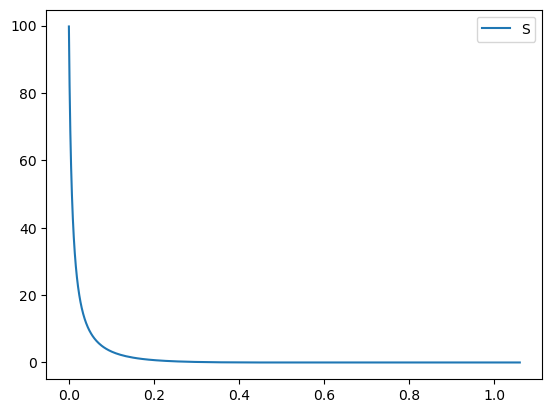

In [21]:
nodes_list = ['A','B','S','M','AB','BMS','ABS','AMS','ABMS','AM','AS']
#nodes_list = ['A','B','ABMS']
optim.plot_observable(0,nodes_list)


**After 750 optimization iterations**


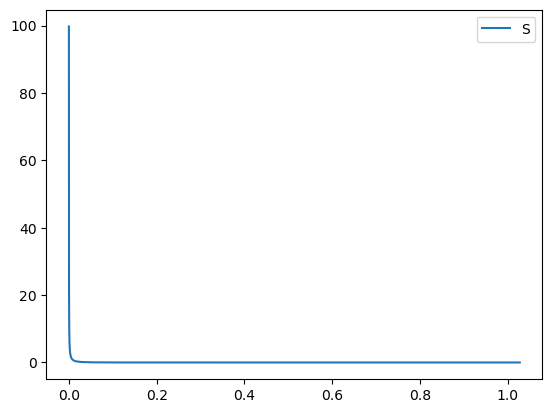

In [22]:
optim.plot_observable(-1,nodes_list)


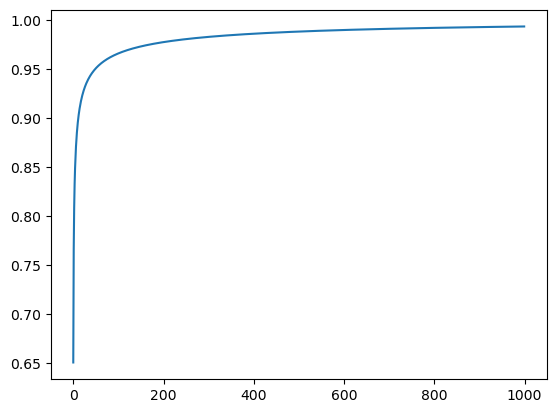

In [23]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

Using CPU
Start of simulation: memory Used:  24.7
SLow rates:  tensor([[1.1275e+02, 1.1284e+02, 1.1279e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1275e+02, 1.1275e+02, 1.1275e+02, 1.0000e-01, 1.0000e-01,
         1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01, 1.0000e-01, 1.1284e+02,
         1.1284e+02, 1.0000e-01, 1.1279e+02, 1.1279e+02, 1.1279e+02, 1.0000e-01,
         1.0000e-01, 1.1279e+02, 1.1279e+02, 1.0000e-01, 1.1279e+02, 1.0000e-01,
         1.1279e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.1286e+02, 1.1286e+02, 1.0000e-01, 1.1286e+02, 1.0000e-01, 1.1286e+02,
         1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.1279e+02, 1.1286e+02,
         1.1286e+02, 1.1286e+02, 1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02,
         1.1284e+02, 1.1279e+02, 1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01,
         1.1284e+02, 1.1279e+02, 1.0000e-01, 1.1279e+02, 1.1286e+02, 1.0000e-01,
         1.1286e+02, 1.1286e+02, 1.1286e+02, 1

No handles with labels found to put in legend.


Next time:  tensor(1020.0690, dtype=torch.float64, grad_fn=<AddBackward0>)
Using CPU
Start of simulation: memory Used:  24.7
SLow rates:  tensor([[1.1275e+02, 1.1284e+02, 1.1279e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1275e+02, 1.1275e+02, 1.1275e+02, 1.0000e-01, 1.0000e-01,
         1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01, 1.0000e-01, 1.1284e+02,
         1.1284e+02, 1.0000e-01, 1.1279e+02, 1.1279e+02, 1.1279e+02, 1.0000e-01,
         1.0000e-01, 1.1279e+02, 1.1279e+02, 1.0000e-01, 1.1279e+02, 1.0000e-01,
         1.1279e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.1286e+02, 1.1286e+02, 1.0000e-01, 1.1286e+02, 1.0000e-01, 1.1286e+02,
         1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.1279e+02, 1.1286e+02,
         1.1286e+02, 1.1286e+02, 1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02,
         1.1284e+02, 1.1279e+02, 1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01,
         1.1284e+02, 1.1279e+02, 1.0000e-01, 1.1279e

No handles with labels found to put in legend.


Next time:  tensor(1020.0690, dtype=torch.float64, grad_fn=<AddBackward0>)
Using CPU
Start of simulation: memory Used:  24.7
SLow rates:  tensor([[1.1275e+02, 1.1284e+02, 1.1279e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.1275e+02, 1.1275e+02, 1.1275e+02, 1.0000e-01, 1.0000e-01,
         1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01, 1.0000e-01, 1.1284e+02,
         1.1284e+02, 1.0000e-01, 1.1279e+02, 1.1279e+02, 1.1279e+02, 1.0000e-01,
         1.0000e-01, 1.1279e+02, 1.1279e+02, 1.0000e-01, 1.1279e+02, 1.0000e-01,
         1.1279e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.0000e-01, 1.0000e-01,
         1.1286e+02, 1.1286e+02, 1.0000e-01, 1.1286e+02, 1.0000e-01, 1.1286e+02,
         1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02, 1.1279e+02, 1.1286e+02,
         1.1286e+02, 1.1286e+02, 1.1284e+02, 1.1286e+02, 1.1286e+02, 1.1286e+02,
         1.1284e+02, 1.1279e+02, 1.1284e+02, 1.1284e+02, 1.1284e+02, 1.0000e-01,
         1.1284e+02, 1.1279e+02, 1.0000e-01, 1.1279e

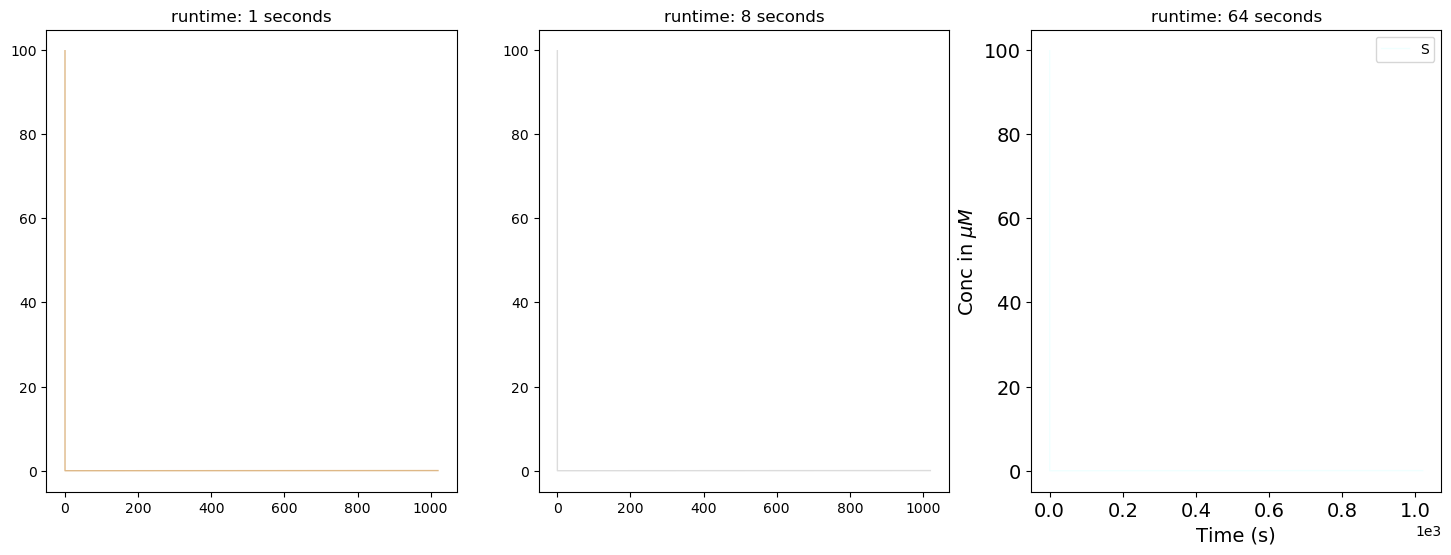

In [24]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i],)
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
plt.show()

In [25]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'PQ': 5, 'PR': 6, 'PS': 7, 'PT': 8, 'QR': 9, 'QS': 10, 'QT': 11, 'PQR': 12, 'PQS': 13, 'PQT': 14, 'RS': 15, 'RT': 16, 'PRS': 17, 'PRT': 18, 'QRS': 19, 'QRT': 20, 'PQRS': 21, 'PQRT': 22, 'ST': 23, 'PST': 24, 'QST': 25, 'PQST': 26, 'RST': 27, 'PRST': 28, 'QRST': 29, 'PQRST': 30}
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  P + Q  ->  PQ
Net flux:  tensor([0.], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([0.9912], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0, 'k_off': 0.002061153622438557, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
Reaction:  P + R  ->  PR
Net flux:  tensor([0.], dtype=torch.float64, grad_

{'k_on': 0.10000000000000002, 'k_off': 7.66764807372196e-48, 'lcf': 1, 'rxn_score': tensor([-120.], dtype=torch.float64), 'uid': 45}
Reaction:  PQRST  ->  PR + QST
Net flux:  tensor([-9.4530], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([0.0949], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 0.10000000000000002, 'k_off': 7.66764807372196e-48, 'lcf': 1, 'rxn_score': tensor([-120.], dtype=torch.float64), 'uid': 49}
Reaction:  PQRST  ->  PS + QRT
Net flux:  tensor([-9.4530], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.1000, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([0.0949], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 0.10000000000000002, 'k_off': 7.66764807372196e-48, 'lcf': 1, 'rxn_score': tensor([-120.], dtype=torch.float64), 'uid': 53}
Reaction:  PQRST  ->  PT + QRS
Net flux:  tensor([-9.4530], dtype=torch.f

In [26]:
for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
    print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

PQRST  :  tensor([-142.6336], dtype=torch.float64, grad_fn=<AddBackward0>)
QRST  :  tensor([8.9890], dtype=torch.float64, grad_fn=<AddBackward0>)
PRS  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PRT  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PST  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PQR  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PQS  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PQT  :  tensor([9.4696], dtype=torch.float64, grad_fn=<AddBackward0>)
PR  :  tensor([9.4777], dtype=torch.float64, grad_fn=<AddBackward0>)
PS  :  tensor([9.4777], dtype=torch.float64, grad_fn=<AddBackward0>)
PT  :  tensor([9.4777], dtype=torch.float64, grad_fn=<AddBackward0>)
PQ  :  tensor([9.4777], dtype=torch.float64, grad_fn=<AddBackward0>)
RST  :  tensor([9.5517], dtype=torch.float64, grad_fn=<AddBackward0>)
QRS  :  tensor([9.5517], dtype=torch.float64, grad_fn=<AddBackward0>)
QST  :  tensor([9.

In [27]:
# # print(solution)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
# #solution = poly_system.solve(verifyBool = False)
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 